# FOOOF 

## 0.Loading packages, defining paths

In [1]:
# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

import fooof
from fooof.plts.spectra import plot_spectrum

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
         

/Users/jenniferbehnke/anaconda3/envs/bssu/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# check some package versions for documentation and reproducability
print('Python sys', sys.version)
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('mne_bids', mne_bids.__version__)
print('mne', mne.__version__)
print('fooof', fooof.__version__)
print('matplotlib', matplotlib.__version__)
print('scipy', scipy.__version__)
#print('sklearn', sklearn.__version__)
print('seaborn', sns.__version__)
print('pingouin', pg.__version__)
print('statsmodels', statsmodels.__version__)

Python sys 3.11.3 (main, May 15 2023, 18:01:31) [Clang 14.0.6 ]
pandas 2.0.3
numpy 1.25.0
mne_bids 0.12
mne 1.4.2
fooof 1.0.0
matplotlib 3.7.1
scipy 1.10.1
seaborn 0.11.1
pingouin 0.5.3
statsmodels 0.14.0


In [10]:
# Import the utility to print out information for reporting
from fooof.utils.reports import methods_report_text

# Generate methods text, with methods information inserted
methods_report_text(fooof_obj)

NameError: name 'fooof_obj' is not defined

In [3]:
jennifer_user_path = os.getcwd()
while jennifer_user_path[-14:] != 'jenniferbehnke':
    jennifer_user_path = os.path.dirname(jennifer_user_path)

# directory to this Repository
project_path = os.path.join(jennifer_user_path, 'code', 'BetaSenSightLongterm', 'BetaSenSightLongterm')
sys.path.append(project_path)

os.chdir(project_path)

import src.bssu.utils.find_folders as find_folders
importlib.reload(find_folders)

# import PyPerceive

project_path = find_folders.chdir_repository("Py_Perceive")

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)

import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as PyPerceive_find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

# import meet

project_path = find_folders.chdir_repository("meet")

import meet as meet

# import all functions from BetaSenSightLongterm
project_path = find_folders.chdir_repository("BetaSenSightLongterm")

# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd
import src.bssu.tfr.time_frequency_beta_erd_fooof_fit as tfr_fooof
import src.bssu.tfr.fooof_fit as fooof_fit
import src.bssu.tfr.fooof_peak_analysis as fooof_peaks

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol
import src.bssu.monopolar.monoRef_weightPsdAverageByCoordinateDistance as MonoRefWeightedCoordinateDistance

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(tfr_fooof)
importlib.reload(fooof_fit)
importlib.reload(MonoRefWeightedCoordinateDistance)
importlib.reload(fooof_peaks)

<module 'src.bssu.tfr.fooof_peak_analysis' from '/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/tfr/fooof_peak_analysis.py'>

In [6]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

Load one Json file with fooof results: filename "fooof_model_sub{subject}.json"

In [13]:
fooof_result = loadResults.load_fooof_json(subject="017")
ses = fooof_result.loc[fooof_result.session == "fu3m"]



Write a group Dataframe, save as pickle

In [1]:
fooof_group_result_percept = fooof_fit.fooof_fit_percept(
    incl_sub=["017", "019", "021", "024", "025", 
     "028", "029", "030", "031", 
     "032", "033", "036", "040", 
     "041", "045", "047", "048", "049", 
     "050", "051", "052", "055", "056", "059", "060", 
     "061", "062", "063", "065", "066", "069", "075"],
     fooof_version="v2"
)

# excluded: sub-026, 038 ECG artefacts
# sub-050 

# duration: around 25 min!!!

In [17]:
loaded_fooof_result = loadResults.load_pickle_group_result(filename="fooof_group_data_percept", fooof_version="v2")
loaded_fooof_result.head()

subject_hemisphere session bipolar_channel fooof_error fooof_r_sq  \
0          017_Right    fu3m              03    0.066416    0.98557   
1          017_Right    fu3m              13    0.088264    0.96624   
2          017_Right    fu3m              02    0.093521   0.971951   
3          017_Right    fu3m              12     0.07857   0.972904   
4          017_Right    fu3m              01    0.071117   0.979469   

  fooof_exponent fooof_offset  \
0       1.688615     1.332174   
1       1.457102     1.030205   
2       1.685157     1.420904   
3       1.343522     0.757904   
4       1.587926     1.157176   

                                fooof_power_spectrum  \
0  [0.007670144166618265, 0.033514708387907266, 0...   
1  [0.008159401325433357, 0.006371132815819802, 0...   
2  [7.787615885490595e-09, 1.882592748359002e-08,...   
3  [0.0003292929325064975, 0.0003079804265473385,...   
4  [0.026061271554969956, 0.08068602726229468, 0....   

                   periodic_plus_aperiodic_power_log  \
0  [0.8243496615978271, 0.5308087518329498, 0.339...   
1  [0.5924797144173061, 0.3362677254222202, 0.154...   
2  [0.9136209444433648, 0.616879579348679, 0.4063...   
3  [0.35352735575065536, 0.11698373341367306, -0....   
4  [0.6815260502777304, 0.41328849284842595, 0.25...   

                                 fooof_periodic_flat fooof_number_peaks  \
0  [0.0004994452364636109, 0.004308872658784194, ...                  4   
1  [0.0009066008317322891, 0.0012775321965264185,...                  4   
2  [4.126366718272472e-10, 1.9754275973706163e-09...                  3   
3  [6.336815301153162e-05, 0.00010218209063693958...                  4   
4  [0.0023628423600669185, 0.013745121592054215, ...                  4   

  alpha_peak_CF_power_bandWidth low_beta_peak_CF_power_bandWidth  \
0               [nan, nan, nan]                  [nan, nan, nan]   
1               [nan, nan, nan]                  [nan, nan, nan]   
2               [nan, nan, nan]                  [nan, nan, nan]   
3               [nan, nan, nan]                  [nan, nan, nan]   
4               [nan, nan, nan]                  [nan, nan, nan]   

                   high_beta_peak_CF_power_bandWidth  \
0  [28.987529529805325, 0.5952799097462995, 7.519...   
1  [29.225692477683076, 0.921341939972744, 3.0000...   
2  [29.073003972692437, 0.9881124105011126, 8.238...   
3  [29.434381843942617, 1.099716476649855, 4.7140...   
4  [33.50000000000001, 0.3435956777814475, 3.0000...   

                        beta_peak_CF_power_bandWidth  \
0  [28.987529529805325, 0.5952799097462995, 7.519...   
1  [29.225692477683076, 0.921341939972744, 3.0000...   
2  [29.073003972692437, 0.9881124105011126, 8.238...   
3  [29.434381843942617, 1.099716476649855, 4.7140...   
4  [33.50000000000001, 0.3435956777814475, 3.0000...   

                       gamma_peak_CF_power_bandWidth  
0                                    [nan, nan, nan]  
1                                    [nan, nan, nan]  
2                                    [nan, nan, nan]  
3                                    [nan, nan, nan]  
4  [64.15854737736382, 0.19383025269962295, 10.73...

In [18]:
# load the pickle FOOOF group dataframe
# calculate beta average
# rank beta within a channel group

ranked_beta_fooof_group_percept = fooof_fit.highest_beta_channels_fooof_percept(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2"
)


highest_beta_channels_fooof_periodic_spectrum_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
beta_ranks_all_channels_fooof_periodic_spectrum_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
beta_all_channels_fooof_periodic_spectrum_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [21]:
ranked_beta_fooof_group_percept["beta_ranks_all_channels"].head()

index subject_hemisphere session bipolar_channel fooof_error fooof_r_sq  \
0      3          017_Right    fu3m              12     0.07857   0.972904   
1      4          017_Right    fu3m              01    0.071117   0.979469   
2      5          017_Right    fu3m              23    0.075302   0.975031   
0     12          017_Right    fu3m            1A2A    0.086413   0.969713   
1     13          017_Right    fu3m            1B2B    0.074097   0.965587   

  fooof_exponent fooof_offset  \
0       1.343522     0.757904   
1       1.587926     1.157176   
2       1.291468     0.634505   
0       1.477671     1.203942   
1       1.172131     0.590142   

                                fooof_power_spectrum  \
0  [0.0003292929325064975, 0.0003079804265473385,...   
1  [0.026061271554969956, 0.08068602726229468, 0....   
2  [3.658640057579987e-10, 8.781299465354664e-09,...   
0  [1.051259035644847e-05, 9.481947834899529e-06,...   
1  [0.008637711888216826, 0.008756106676760522, 0...   

                   periodic_plus_aperiodic_power_log  \
0  [0.35352735575065536, 0.11698373341367306, -0....   
1  [0.6815260502777304, 0.41328849284842595, 0.25...   
2  [0.245734554928568, 0.018318405600980886, -0.1...   
0  [0.7591189601622489, 0.4989144791743795, 0.314...   
1  [0.23946150065504818, 0.03441992658661193, -0....   

                                 fooof_periodic_flat fooof_number_peaks  \
0  [6.336815301153162e-05, 0.00010218209063693958...                  4   
1  [0.0023628423600669185, 0.013745121592054215, ...                  4   
2  [9.023382665364937e-11, 3.65615584904297e-09, ...                  3   
0  [7.950153065610182e-07, 1.3054734583268873e-06...                  3   
1  [0.0021667282131738646, 0.0035272631939431017,...                  4   

  alpha_peak_CF_power_bandWidth  \
0               [nan, nan, nan]   
1               [nan, nan, nan]   
2               [nan, nan, nan]   
0               [nan, nan, nan]   
1               [nan, nan, nan]   

                    low_beta_peak_CF_power_bandWidth  \
0                                    [nan, nan, nan]   
1                                    [nan, nan, nan]   
2  [13.602286187424639, 0.4902036465479644, 3.463...   
0                                    [nan, nan, nan]   
1  [17.35611052812301, 0.11398473485918781, 11.04...   

                   high_beta_peak_CF_power_bandWidth  \
0  [29.434381843942617, 1.099716476649855, 4.7140...   
1  [33.50000000000001, 0.3435956777814475, 3.0000...   
2  [30.219295967633865, 1.0778976339754025, 6.289...   
0  [30.823647947122193, 1.0136923859539588, 7.425...   
1  [31.417079229143116, 0.9693953335852258, 4.114...   

                        beta_peak_CF_power_bandWidth  \
0  [29.434381843942617, 1.099716476649855, 4.7140...   
1  [33.50000000000001, 0.3435956777814475, 3.0000...   
2  [30.219295967633865, 1.0778976339754025, 6.289...   
0  [30.823647947122193, 1.0136923859539588, 7.425...   
1  [31.417079229143116, 0.9693953335852258, 4.114...   

                       gamma_peak_CF_power_bandWidth  beta_average  beta_rank  
0                                    [nan, nan, nan]      0.204537        1.0  
1  [64.15854737736382, 0.19383025269962295, 10.73...      0.030401        3.0  
2                                    [nan, nan, nan]      0.193264        2.0  
0                                    [nan, nan, nan]      0.277904        1.0  
1                                    [nan, nan, nan]      0.158807        2.0

OLD VERSION

In [13]:
fooof_group_result = writeGroupDF.write_fooof_group_json(
    incl_sub=["017", "019", "021", "024", "025", "028", "029", "030", "031", "032", "033", "036", "040", 
              "041", "045", "047", "048", "049", "050", "052", "055", "059", "060", "061", "062", "063", "065", "066"],
              fooof_version="v2"
)

# excluded subjects (ECG artifacts): "026", "038", 
# exception because Perceive Error: sub030 fu18or24m -> run extra

In [15]:
fooof_group_result.head()

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
0          017_Right    fu3m              03     0.066416    0.985570   
1          017_Right    fu3m              13     0.088264    0.966240   
2          017_Right    fu3m              02     0.093521    0.971951   
3          017_Right    fu3m              12     0.078570    0.972904   
4          017_Right    fu3m              01     0.071117    0.979469   

   fooof_exponent  fooof_offset  \
0        1.688615      1.332174   
1        1.457102      1.030205   
2        1.685157      1.420904   
3        1.343522      0.757904   
4        1.587926      1.157176   

                                fooof_power_spectrum  \
0  [0.0076701442, 0.0335147084, 0.1166681733, 0.3...   
1  [0.0081594013, 0.0063711328, 0.0058483522, 0.0...   
2  [7.8e-09, 1.88e-08, 5.23e-08, 1.529e-07, 4.51e...   
3  [0.0003292929, 0.0003079804, 0.0003329258, 0.0...   
4  [0.0260612716, 0.0806860273, 0.2044965326, 0.3...   

                   periodic_plus_aperiodic_power_log  \
0  [0.8243496616, 0.5308087518, 0.3393626907, 0.2...   
1  [0.5924797144, 0.3362677254, 0.1547240298, 0.0...   
2  [0.9136209444, 0.6168795793, 0.406338236, 0.24...   
3  [0.3535273558, 0.1169837334, -0.0508137936, -0...   
4  [0.6815260503, 0.4132884928, 0.2537236147, 0.1...   

                                 fooof_periodic_flat  fooof_number_peaks  \
0  [0.0004994452, 0.0043088727, 0.0238362332, 0.0...                   4   
1  [0.0009066008, 0.0012775322, 0.0017823158, 0.0...                   4   
2  [4e-10, 2e-09, 8.9e-09, 3.79e-08, 1.522e-07, 5...                   3   
3  [6.33682e-05, 0.0001021821, 0.0001625649, 0.00...                   4   
4  [0.0023628424, 0.0137451216, 0.0525736748, 0.1...                   4   

  alpha_peak_CF_power_bandWidth low_beta_peak_CF_power_bandWidth  \
0            [None, None, None]               [None, None, None]   
1            [None, None, None]               [None, None, None]   
2            [None, None, None]               [None, None, None]   
3            [None, None, None]               [None, None, None]   
4            [None, None, None]               [None, None, None]   

             high_beta_peak_CF_power_bandWidth  \
0  [28.9875295298, 0.5952799097, 7.5195280936]   
1    [29.2256924777, 0.92134194, 3.0000004261]   
2  [29.0730039727, 0.9881124105, 8.2386913129]   
3  [29.4343818439, 1.0997164766, 4.7140623067]   
4                    [33.5, 0.3435956778, 3.0]   

                  beta_peak_CF_power_bandWidth  \
0  [28.9875295298, 0.5952799097, 7.5195280936]   
1    [29.2256924777, 0.92134194, 3.0000004261]   
2  [29.0730039727, 0.9881124105, 8.2386913129]   
3  [29.4343818439, 1.0997164766, 4.7140623067]   
4                    [33.5, 0.3435956778, 3.0]   

                  gamma_peak_CF_power_bandWidth  
0                            [None, None, None]  
1                            [None, None, None]  
2                            [None, None, None]  
3                            [None, None, None]  
4  [64.1585473774, 0.1938302527, 10.7308792364]

In [14]:
fooof_group_result.subject_hemisphere.unique()

array(['017_Right', '017_Left', '019_Right', '019_Left', '021_Right',
       '021_Left', '024_Right', '024_Left', '025_Right', '025_Left',
       '028_Right', '028_Left', '029_Right', '029_Left', '030_Right',
       '030_Left', '031_Right', '031_Left', '032_Right', '032_Left',
       '033_Right', '033_Left', '036_Right', '036_Left', '040_Right',
       '040_Left', '041_Right', '041_Left', '045_Right', '045_Left',
       '047_Right', '047_Left', '048_Right', '048_Left', '049_Right',
       '049_Left', '050_Right', '050_Left', '052_Right', '052_Left',
       '055_Right', '055_Left', '059_Right', '059_Left', '060_Right',
       '060_Left', '061_Right', '061_Left', '062_Right', '062_Left',
       '063_Right', '063_Left', '065_Right', '065_Left', '066_Right',
       '066_Left'], dtype=object)

GET BETA AVERAGE AND RANK BETA

From the existing "fooof_model_group_data.json" file written above, now rank 

In [24]:
ranked_beta = writeGroupDF.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2"
)

highest_beta_channels_fooof_periodic_spectrum_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
beta_ranks_all_channels_fooof_periodic_spectrum_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
beta_all_channels_fooof_periodic_spectrum_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [9]:
fooof_group_result = loadResults.load_fooof_beta_ranks(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2",
    all_or_one_chan="beta_ranks_all",
    all_or_one_longterm_ses="one_longterm_session"
)

In [11]:
fooof_group_result.loc[fooof_group_result.subject_hemisphere == "051"]

Empty DataFrame
Columns: [index, subject_hemisphere, session, bipolar_channel, fooof_error, fooof_r_sq, fooof_exponent, fooof_offset, fooof_power_spectrum, periodic_plus_aperiodic_power_log, fooof_periodic_flat, fooof_number_peaks, alpha_peak_CF_power_bandWidth, low_beta_peak_CF_power_bandWidth, high_beta_peak_CF_power_bandWidth, beta_peak_CF_power_bandWidth, gamma_peak_CF_power_bandWidth, beta_average, beta_rank]
Index: []

Get important mean values (total and for sub groups like different sessions, channel groups)
- fooof_error
- fooof_r_sq

In [8]:
# FOOOF version 2

mean_fooof_error = np.mean(fooof_group_result["fooof_error"])
std_fooof_error = np.std(fooof_group_result["fooof_error"])
sem_fooof_error = stats.sem(fooof_group_result["fooof_error"])

mean_fooof_r_sq = np.mean(fooof_group_result["fooof_r_sq"])
std_fooof_r_sq = np.std(fooof_group_result["fooof_r_sq"])
sem_fooof_r_sq = stats.sem(fooof_group_result["fooof_r_sq"])

print(f"FOOOF error mean: {mean_fooof_error},",
      f"\nFOOOF error standard deviation: {std_fooof_error},",
      f"\nFOOOF error sem: {sem_fooof_error},",
       
      f"\n\nFOOOF r squared mean: {mean_fooof_r_sq}",
      f"\nFOOOF r squared standard deviation: {std_fooof_r_sq},",
      f"\nFOOOF r squared sem: {sem_fooof_r_sq}")


FOOOF error mean: 0.07686347242738514, 
FOOOF error standard deviation: 0.01389553039407538, 
FOOOF error sem: 0.00034407106203252093, 

FOOOF r squared mean: 0.9688626562804441 
FOOOF r squared standard deviation: 0.020416854007599985, 
FOOOF r squared sem: 0.0005055473553390259


In [27]:
# FOOOF version 1

mean_fooof_error = np.mean(fooof_group_result["fooof_error"])
std_fooof_error = np.std(fooof_group_result["fooof_error"])
sem_fooof_error = stats.sem(fooof_group_result["fooof_error"])

mean_fooof_r_sq = np.mean(fooof_group_result["fooof_r_sq"])
std_fooof_r_sq = np.std(fooof_group_result["fooof_r_sq"])
sem_fooof_r_sq = stats.sem(fooof_group_result["fooof_r_sq"])

print(f"FOOOF error mean: {mean_fooof_error},",
      f"\nFOOOF error standard deviation: {std_fooof_error},",
      f"\nFOOOF error sem: {sem_fooof_error},",
       
      f"\n\nFOOOF r squared mean: {mean_fooof_r_sq}",
      f"\nFOOOF r squared standard deviation: {std_fooof_r_sq},",
      f"\nFOOOF r squared sem: {sem_fooof_r_sq}")


FOOOF error mean: 0.07410264418113996, 
FOOOF error standard deviation: 0.013789092922221332, 
FOOOF error sem: 0.00029690029266059097, 

FOOOF r squared mean: 0.9743255615309081 
FOOOF r squared standard deviation: 0.014526480388982852, 
FOOOF r squared sem: 0.0003127773743454157


Description of dataframe

In [10]:
# FOOOF version 2

print("Number of channels fitted: " + str(len(fooof_group_result.subject_hemisphere.values)))
print("List of STNs: " + str(list(fooof_group_result.subject_hemisphere.unique())))
print("Number of STNs: " + str(len(fooof_group_result.subject_hemisphere.unique())),
      "\nNumber of patients: " + (str(len(fooof_group_result.subject_hemisphere.unique())/2)))

Number of channels fitted: 1632
List of STNs: ['017_Right', '017_Left', '019_Right', '019_Left', '021_Right', '021_Left', '024_Right', '024_Left', '025_Right', '025_Left', '028_Right', '028_Left', '029_Right', '029_Left', '030_Right', '030_Left', '031_Right', '031_Left', '032_Right', '032_Left', '033_Right', '033_Left', '036_Right', '036_Left', '040_Right', '040_Left', '041_Right', '041_Left', '045_Right', '045_Left', '047_Right', '047_Left', '048_Right', '048_Left', '049_Right', '049_Left', '050_Right', '050_Left', '052_Right', '052_Left', '055_Right', '055_Left', '059_Right', '059_Left', '060_Right', '060_Left', '061_Right', '061_Left', '062_Right', '062_Left', '063_Right', '063_Left', '065_Right', '065_Left', '066_Right', '066_Left']
Number of STNs: 56 
Number of patients: 28.0


In [28]:
# FOOOF version 1

print("Number of channels fitted: " + str(len(fooof_group_result.subject_hemisphere.values)))
print("List of STNs: " + str(list(fooof_group_result.subject_hemisphere.unique())))
print("Number of STNs: " + str(len(fooof_group_result.subject_hemisphere.unique())),
      "\nNumber of patients: " + (str(len(fooof_group_result.subject_hemisphere.unique())/2)))


Number of channels fitted: 2158
List of STNs: ['017_Right', '017_Left', '019_Right', '019_Left', '021_Right', '021_Left', '024_Right', '024_Left', '025_Right', '025_Left', '028_Right', '028_Left', '029_Right', '029_Left', '030_Right', '030_Left', '031_Right', '031_Left', '032_Right', '032_Left', '033_Right', '033_Left', '036_Right', '036_Left', '040_Right', '040_Left', '041_Right', '041_Left', '045_Right', '045_Left', '047_Right', '047_Left', '048_Right', '048_Left', '049_Right', '049_Left', '050_Right', '050_Left', '052_Right', '052_Left', '055_Right', '055_Left', '059_Right', '059_Left', '060_Right', '060_Left', '061_Right', '061_Left', '062_Right', '062_Left', '063_Right', '063_Left', '065_Right', '065_Left', '066_Right', '066_Left']
Number of STNs: 56 
Number of patients: 28.0


## 1. fit a FOOOF model to find the highest Peak in freq bands: alpha, low beta, high beta, gamma

Description of fooof fitted power spectra (periodic_spectrum)
- frequencies: 1-95 Hz
- frequency resolution: 1 Hz
- formula for power spectra: 10**(fm._peak_fit + fm._ap_fit) - (10**fm._ap_fit)

Use automatized code to fit FOOOF model on each channel of all patients

In [10]:
fooof_model = fooof_fit.fooof_fit_power_spectra(
    ["017", "019", "021", "024", "025", 
     "026", "028", "029", "030", "031", 
     "032", "033", "036", "038", "040", 
     "041", "045", "047", "048", "049", 
     "050", "052", "055", "059", "060", 
     "061", "062", "063", "065", "066"],
     fooof_version="v2"
)


In [10]:
fooof_model = fooof_fit.fooof_fit_power_spectra(
    ["047", ]
)

# already fooofed power spectra: "019", "021", "024", "028", "033", "065"
# 2nd round: "036", "040", "048", "049", "052", "055", "066"
# 3rd round: "047", 

Load single power_spectra

In [8]:
# Import required code for visualizing example models
from fooof import FOOOF
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model

# Import Bands object, to manage frequency band definitions
from fooof.bands import Bands

# Import utility functions that manage & manipulate FOOOF objects
from fooof.objs.utils import average_fg, combine_fooofs, compare_info

In [16]:
data_power_spectrum = mainAnalysis_class.MainClass(
        sub="041",
        hemisphere="Right",
        filter="unfiltered",
        result="PowerSpectrum",
        incl_session=["postop", "fu3m", "fu12m", "fu18m"],
        pickChannels=['03', '13', '02', '12', '01', '23', 
                        '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                        '1A2A', '1B2B', '1C2C'],
        normalization=["rawPsd"],
        feature=["frequency", "time_sectors", "rawPsd", "SEM_rawPsd"]
    )

subject_figures_path = find_folders.get_local_path(folder="figures", sub="030")

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 95 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.8455, 1.3863                                          
                                                                                                  
                                       6 peaks were found:                                        
          

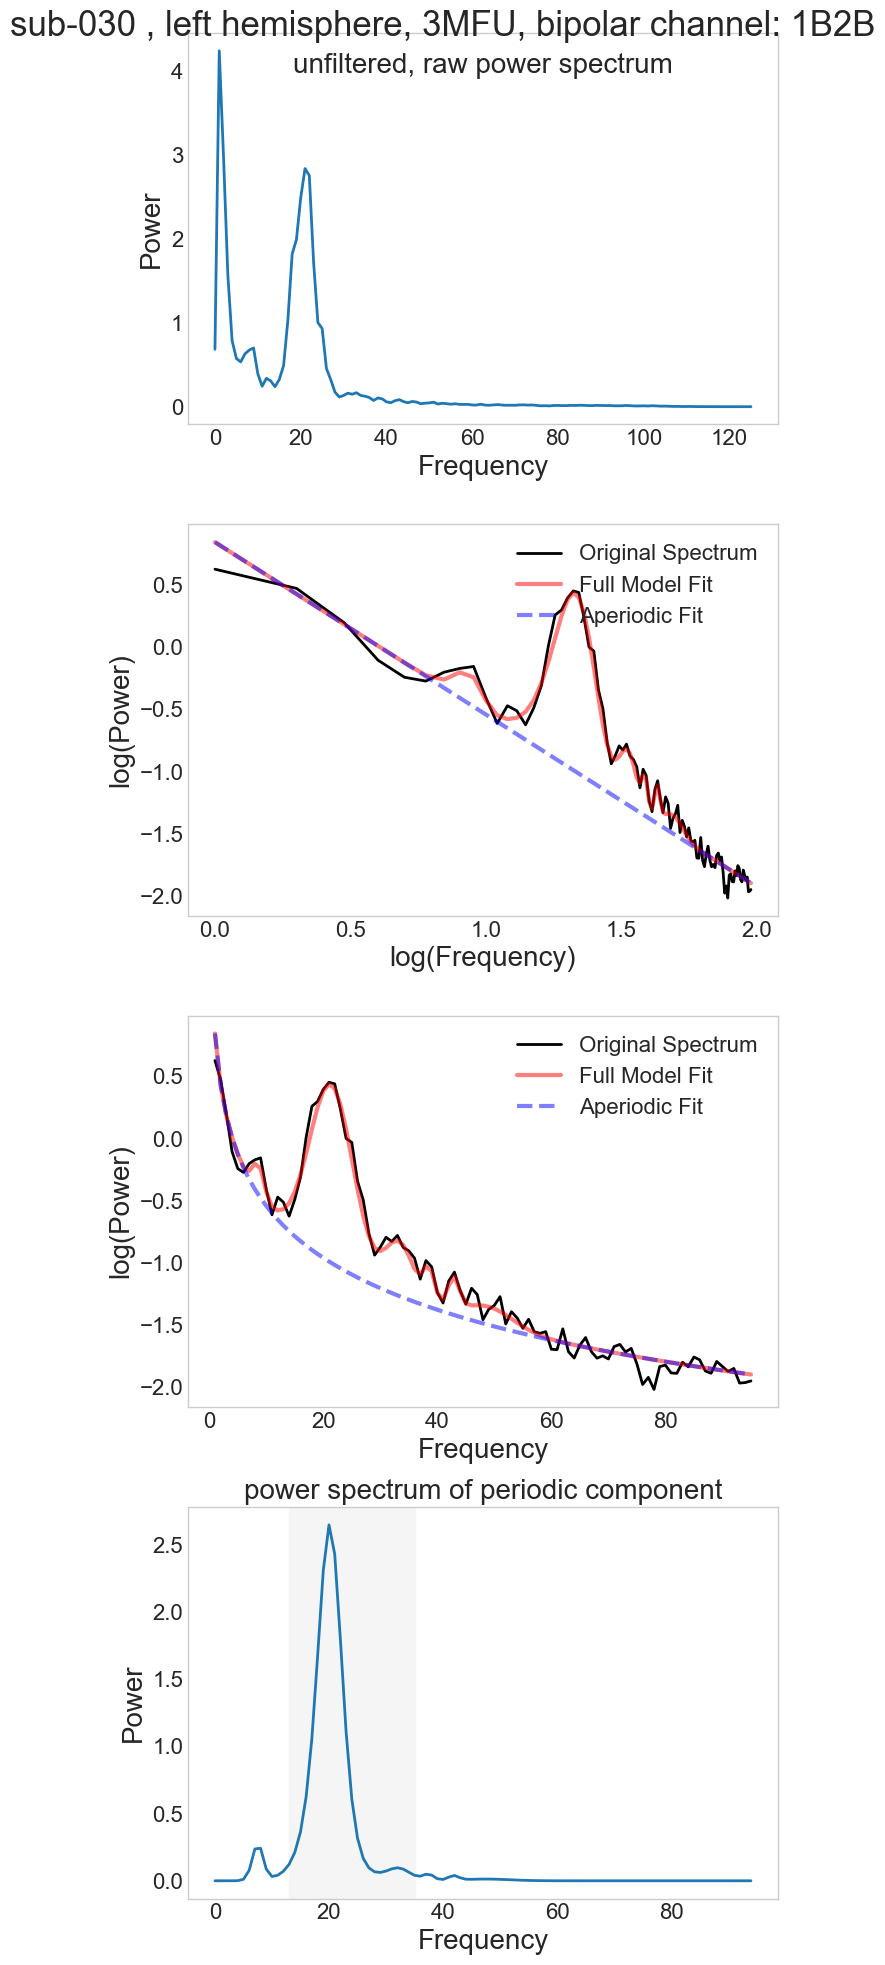

In [18]:
# save power spectrum and frequencies as arrays

power_spectrum = np.array(data_power_spectrum.fu3m.BIP_1B2B.rawPsd.data)
freqs = np.array(data_power_spectrum.fu3m.BIP_1B2B.frequency.data)
freq_range = [1, 95] # better fit broad frequency band


############ SET PLOT LAYOUT ############
fig, ax = plt.subplots(4,1, figsize=(7,20))

# Plot the unfiltered Power spectrum in first ax
plot_spectrum(freqs, power_spectrum, log_freqs=False, log_powers=False,
                  ax=ax[0])
# ax[0].plot(freqs, power_spectrum)
ax[0].grid(False)


############ SET FOOOF MODEL ############
model = fooof.FOOOF(
        peak_width_limits=[2, 15.0], # must be a list, low limit should be more than twice as frequency resolution, usually not more than 15Hz bw
        max_n_peaks=6, # 4 sometimes misses important peaks, 5 better even though there might be more false positives in high frequencies
        min_peak_height=0.2, # 0.2 detects false positives in gamma but better than 0.35 missing relevant peaks in low frequencies
        peak_threshold=2.0, # default 2.0, lower if necessary to detect peaks more sensitively
        aperiodic_mode="fixed", # fitting without knee component, because there are no knees found so far in the STN
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# Plot an example power spectrum, with a model fit in second ax
# model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'}, ax=ax[1])
model.plot(ax=ax[1], plt_log=True) # Moritz wanted log True for plotting
model.plot(ax=ax[2], plt_log=False) # To see the periodic component better log False
ax[1].grid(False)
ax[2].grid(False)

# plot the fooof power spectrum of the periodic component
fooof_power_spectrum = 10**(model._peak_fit + model._ap_fit) - (10**model._ap_fit)
# fooof_power_spectrum = model.power_spectrum

#ax[3].plot(fooof_power_spectrum)
plot_spectrum(np.arange(len(fooof_power_spectrum)), fooof_power_spectrum, log_freqs=False, log_powers=False,
                  ax=ax[3])

#fig.suptitle(f"sub-030 , left hemisphere, 3MFU, bipolar channel: 1B2B",
#                                       fontsize=25)

ax[0].set_title("unfiltered, raw power spectrum", fontsize=20, y=0.97, pad=-20)
ax[3].set_title("power spectrum of periodic component", fontsize=20)

# mark beta band
x1 = 13
x2 = 35
ax[3].axvspan(x1, x2, color="whitesmoke")
ax[3].grid(False)


fig.tight_layout()

# fig.savefig(subject_figures_path + f"\\fooof_model_sub030_Left_fu3m_1B2B.svg", 
#                     bbox_inches = "tight", format="svg")

# print the result in third ax
model.print_results()

############ SAVE APERIODIC PARAMETERS ############
# goodness of fit
err = model.get_params('error')
r_sq = model.r_squared_

# aperiodic components
exp = model.get_params('aperiodic_params', 'exponent')
offset = model.get_params('aperiodic_params', 'offset')


############ SAVE ALL PEAKS IN ALPHA; HIGH AND LOW BETA ############

number_peaks = model.n_peaks_

# select the highest Peak within alpha, low beta, high beta and gamma band
alpha_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(8.0, 12.0),
                    select_highest=True,
                    attribute="peak_params",
                )

low_beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 20.0),
                    select_highest=True,
                    attribute="peak_params",
                )

high_beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(21.0, 35.0),
                    select_highest=True,
                    attribute="peak_params",
                )

beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 35.0),
                    select_highest=True,
                    attribute="peak_params",
                )

gamma_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(60.0, 90.0),
                    select_highest=True,
                    attribute="peak_params",
                )


# output beta_peaks: beta_peaks[0] = first Peak in beta range
# beta_peaks[0] = CF center frequency of first Peak
# beta_peaks[1] = Power of first Peak
# beta_peaks[2] = BandWidth of first Peak

cfs = model.get_params('peak_params', 'CF')

# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")

# print(template.format(error=err, exponent=exp,
#                         cfs=' & '.join(map(str, [round(cf, 2) for cf in cfs]))))

# Aperiodic parameters
print('Aperiodic parameters (offset, exponent): \n', model.aperiodic_params_, '\n')

# Peak parameters
print('Peak parameters: \n', model.peak_params_, '\n')

# Goodness of fit measures
print('Goodness of fit:')
print(' Error - ', model.error_)
print(' R^2   - ', model.r_squared_, '\n')

# Check how many peaks were fit
print('Number of fit peaks: \n', model.n_peaks_)


In [16]:
model.freq_res

1.0

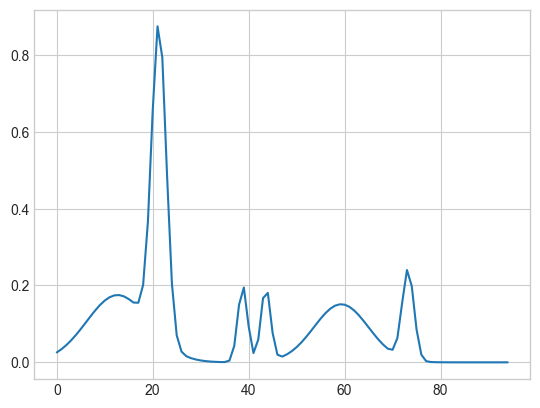

In [23]:
fooof_spectrum =  model._peak_fit #+ model._ap_fit
# model._peak_fit
plt.plot(fooof_spectrum)

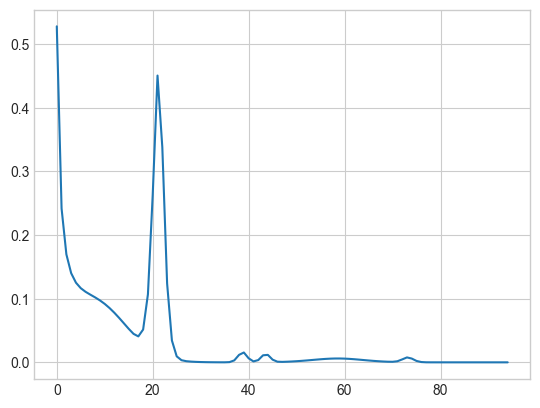

In [20]:
fooof_power_spectrum = 10**(model._peak_fit + model._ap_fit) - (10**model._ap_fit)

plt.plot(fooof_power_spectrum)

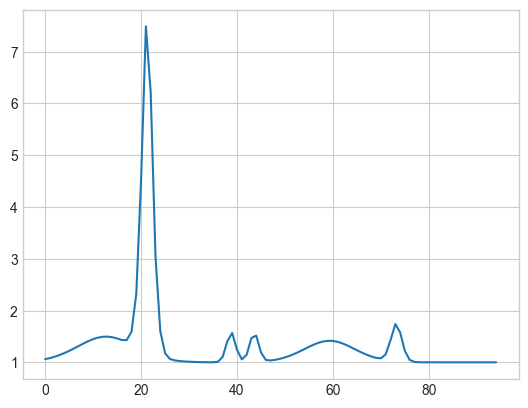

In [30]:
fooof_spectrum = 10**(model._peak_fit)

plt.plot(fooof_spectrum)

In [93]:
# Extract a model parameter with `get_params`
err = model.get_params('error')

# Extract parameters, indicating sub-selections of parameters
exp = model.get_params('aperiodic_params', 'exponent')
cfs = model.get_params('peak_params', 'CF')

# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")
print(template.format(error=err, exponent=exp,
                      cfs=' & '.join(map(str, [round(cf, 2) for cf in cfs]))))

With an error level of 0.07, FOOOF fit an exponent of 1.40 and peaks of 15.05 & 31.25 & 45.42 Hz.


In [40]:
# Richard's method
fit_model = tfr_fooof.fit_model(
    freqs=freqs,
    power_spectrum=power_spectrum,
    fit_knee=False, 
    ax=ax,
    )


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 125 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.9278, 2.4994                                          
                                                                                                  
                             

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 5 - 95 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.0961, 1.6207                                          
                                                                                                  
                                       4 peaks were found:                                        
          

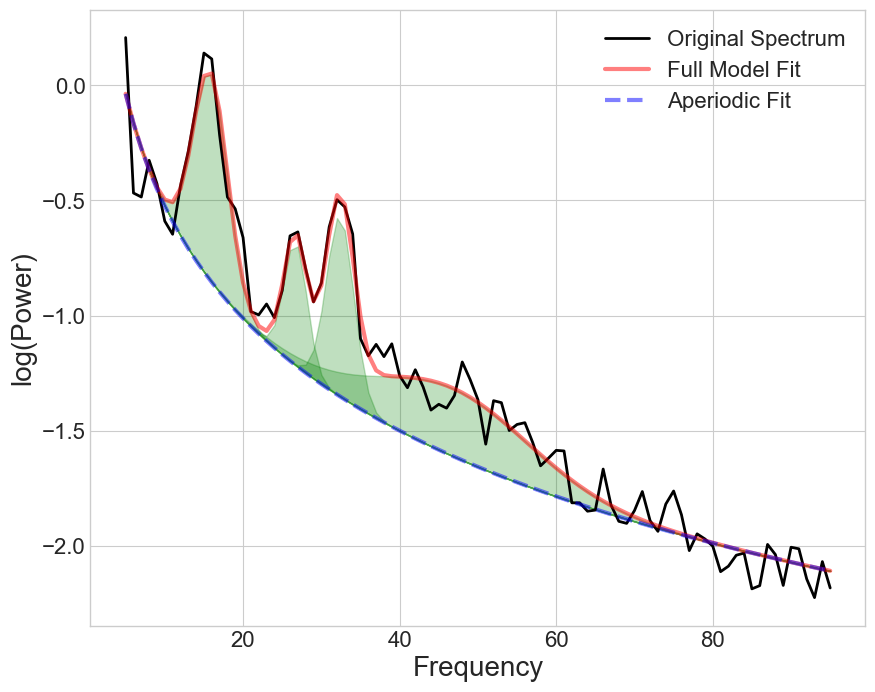

In [71]:
model = fooof.FOOOF(
        peak_width_limits=(2, 20.0),
        max_n_peaks=4,
        min_peak_height=0.0,
        peak_threshold=1.0,
        aperiodic_mode="fixed",
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
freq_range = [5, 95]
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# print the result
model.print_results()

# plot the Power Spectrum without shade
#model.report(freqs, power_spectrum, freq_range)

# Plot an example power spectrum, with a model fit
model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'})

In [72]:
beta_peaks = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 35.0),
                    select_highest=False,
                    attribute="peak_params",
                )

# output beta_peaks: beta_peaks[0] = first Peak in beta range
# beta_peaks[0][0] = CF center frequency of first Peak
# beta_peaks[0][1] = Power of first Peak
# beta_peaks[0][2] = BandWidth of first Peak

In [73]:
peak_1 = beta_peaks[0]
peak_1

array([15.80561099,  0.90660617,  4.40086413])

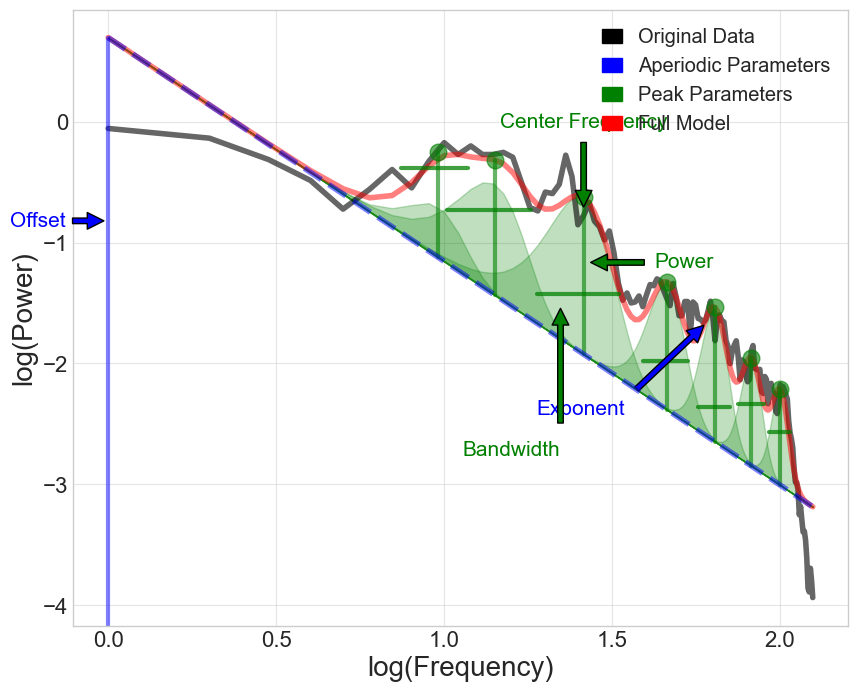

In [22]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1, plt_log=True)


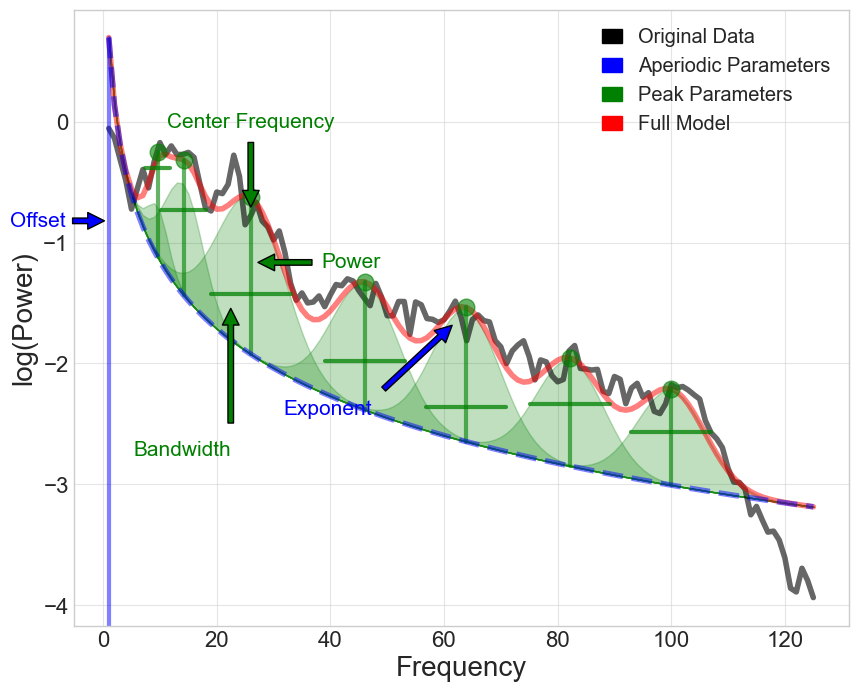

In [23]:
# plotted in log-log, here the aperiodic component is a straight line, hallmark of 1/f activity
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1)

## 2. Number of Peaks in frequency bands alpha, low beta, high beta, beta and gamma

In [17]:
fooof_group_result = loadResults.load_group_fooof_result()

In [56]:
fooof_group_result.head()

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
0          017_Right    fu3m              03     0.067918    0.984748   
1          017_Right    fu3m              13     0.065586    0.981937   
2          017_Right    fu3m              02     0.103924    0.967577   
3          017_Right    fu3m              12     0.075776    0.975321   
4          017_Right    fu3m              01     0.064701    0.983808   

   fooof_exponent  fooof_offset  \
0        1.604428      1.193436   
1        1.434853      0.962182   
2        1.543910      1.189600   
3        1.304337      0.703128   
4        1.540660      1.072680   

                                fooof_power_spectrum  \
0  [0.1656846121, 0.1649261572, 0.2233027721, 0.3...   
1  [0.00025127, 0.000170312, 0.0001713231, 0.0002...   
2  [0.109168079, 0.1121990258, 0.1548672324, 0.22...   
3  [0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...   
4  [8.3557e-06, 0.0002934974, 0.0064128567, 0.068...   

                   periodic_plus_aperiodic_power_log  \
0  [1.1980212709, 0.7241873517, 0.4627028941, 0.3...   
1  [0.9621936864, 0.5302699046, 0.2776223402, 0.0...   
2  [1.1926531892, 0.7339231906, 0.4760453097, 0.3...   
3  [0.7031279556, 0.3104833187, 0.08080093, -0.08...   
4  [1.0726801317, 0.6089264433, 0.3388765877, 0.1...   

                                 fooof_periodic_flat  fooof_number_peaks  \
0  [0.0045849614, 0.0137320197, 0.0347733225, 0.0...                   4   
1  [1.19052e-05, 2.18158e-05, 3.92643e-05, 6.9409...                   6   
2  [0.0030531805, 0.0090862654, 0.02307736, 0.050...                   2   
3  [0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...                   5   
4  [3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...                   6   

                alpha_peak_CF_power_bandWidth  \
0  [8.0361304032, 0.2920797265, 4.8819935856]   
1                          [None, None, None]   
2  [8.3809412329, 0.2263361313, 5.0237181784]   
3                          [None, None, None]   
4                          [None, None, None]   

              low_beta_peak_CF_power_bandWidth  \
0                           [None, None, None]   
1  [13.6525290401, 0.2751629141, 3.0043817259]   
2                           [None, None, None]   
3                           [None, None, None]   
4                           [None, None, None]   

             high_beta_peak_CF_power_bandWidth  \
0  [28.9598253493, 0.5980392495, 7.9884764248]   
1  [29.1048971253, 0.9469996841, 2.8278507671]   
2    [29.09726726, 0.9610582984, 9.2634518255]   
3  [29.4862292984, 1.0958098075, 5.0314063169]   
4           [33.2211166882, 0.4390133671, 2.0]   

                  beta_peak_CF_power_bandWidth  \
0  [28.9598253493, 0.5980392495, 7.9884764248]   
1  [29.1048971253, 0.9469996841, 2.8278507671]   
2    [29.09726726, 0.9610582984, 9.2634518255]   
3  [29.4862292984, 1.0958098075, 5.0314063169]   
4           [33.2211166882, 0.4390133671, 2.0]   

                 gamma_peak_CF_power_bandWidth  
0                           [None, None, None]  
1                           [None, None, None]  
2                           [None, None, None]  
3           [63.6509137528, 0.2746917897, 2.0]  
4  [63.7733341896, 0.1903054915, 10.556379168]

How many channels with Peaks are found per session?

In [18]:
peaks_per_session = fooof_fit.fooof_peaks_per_session()

file:  fooof_peaks_per_session.pickle 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [19]:
peaks_per_session.head()

subject_hemisphere session frequency_band  \
017_Right_fu3m_alpha              017_Right    fu3m          alpha   
017_Right_fu3m_low_beta           017_Right    fu3m       low_beta   
017_Right_fu3m_high_beta          017_Right    fu3m      high_beta   
017_Right_fu3m_beta               017_Right    fu3m           beta   
017_Right_fu3m_gamma              017_Right    fu3m          gamma   

                         total_chans_number number_chans_with_peaks  \
017_Right_fu3m_alpha                     15                       4   
017_Right_fu3m_low_beta                  15                       4   
017_Right_fu3m_high_beta                 15                      15   
017_Right_fu3m_beta                      15                      15   
017_Right_fu3m_gamma                     15                       7   

                         percentage_chans_with_peaks  
017_Right_fu3m_alpha                        0.266667  
017_Right_fu3m_low_beta                     0.266667  
017_Right_fu3m_high_beta                         1.0  
017_Right_fu3m_beta                              1.0  
017_Right_fu3m_gamma                        0.466667

In [20]:
session_df = peaks_per_session.loc[peaks_per_session.session=="postop"]
session_beta_df = session_df.loc[session_df.frequency_band=="beta"]
session_beta_df

subject_hemisphere session frequency_band  \
024_Right_postop_beta          024_Right  postop           beta   
024_Left_postop_beta            024_Left  postop           beta   
025_Right_postop_beta          025_Right  postop           beta   
025_Left_postop_beta            025_Left  postop           beta   
026_Right_postop_beta          026_Right  postop           beta   
026_Left_postop_beta            026_Left  postop           beta   
028_Right_postop_beta          028_Right  postop           beta   
028_Left_postop_beta            028_Left  postop           beta   
029_Right_postop_beta          029_Right  postop           beta   
029_Left_postop_beta            029_Left  postop           beta   
030_Right_postop_beta          030_Right  postop           beta   
030_Left_postop_beta            030_Left  postop           beta   
031_Right_postop_beta          031_Right  postop           beta   
031_Left_postop_beta            031_Left  postop           beta   
032_Right_postop_beta          032_Right  postop           beta   
032_Left_postop_beta            032_Left  postop           beta   
038_Right_postop_beta          038_Right  postop           beta   
038_Left_postop_beta            038_Left  postop           beta   
047_Right_postop_beta          047_Right  postop           beta   
047_Left_postop_beta            047_Left  postop           beta   
059_Right_postop_beta          059_Right  postop           beta   
059_Left_postop_beta            059_Left  postop           beta   
060_Right_postop_beta          060_Right  postop           beta   
060_Left_postop_beta            060_Left  postop           beta   
061_Right_postop_beta          061_Right  postop           beta   
061_Left_postop_beta            061_Left  postop           beta   
062_Right_postop_beta          062_Right  postop           beta   
062_Left_postop_beta            062_Left  postop           beta   
063_Right_postop_beta          063_Right  postop           beta   
063_Left_postop_beta            063_Left  postop           beta   

                      total_chans_number number_chans_with_peaks  \
024_Right_postop_beta                 15                      15   
024_Left_postop_beta                  15                      15   
025_Right_postop_beta                 15                      13   
025_Left_postop_beta                  15                      15   
026_Right_postop_beta                 15                      15   
026_Left_postop_beta                  15                      15   
028_Right_postop_beta                 15                      11   
028_Left_postop_beta                  15                      10   
029_Right_postop_beta                 15                      10   
029_Left_postop_beta                  15                      11   
030_Right_postop_beta                 15                      14   
030_Left_postop_beta                  15                      14   
031_Right_postop_beta                 15                      15   
031_Left_postop_beta                  15                      15   
032_Right_postop_beta                 15                       7   
032_Left_postop_beta                  15                      15   
038_Right_postop_beta                 15                      15   
038_Left_postop_beta                  15                      15   
047_Right_postop_beta                 15                      14   
047_Left_postop_beta                  15                      15   
059_Right_postop_beta                 15                      15   
059_Left_postop_beta                  15                      15   
060_Right_postop_beta                 15                      15   
060_Left_postop_beta                  15                      15   
061_Right_postop_beta                 15                       5   
061_Left_postop_beta                  15                      15   
062_Right_postop_beta                 15                      12   
062_Left_postop_beta                  15

In [34]:
freq_bands = ["alpha", "low_beta", "high_beta", "beta", "gamma"]
sessions = ["postop", "fu3m", "fu12m", "fu18m"]

fig = plt.figure()
font = {"size": 14}

perc_chans_with_peaks_data = {}

for ses in sessions:

    # get the dataframes for each session seperately
    fooof_session = peaks_per_session.loc[(peaks_per_session["session"]==ses)]

    for freq in freq_bands:

        # get dataframes for each frequency
        freq_session_df = fooof_session.loc[fooof_session.frequency_band==freq]

        mean_percentage_chans_with_peaks = np.mean(freq_session_df.percentage_chans_with_peaks.values)
        std_percentage_chans_with_peaks = np.std(freq_session_df.percentage_chans_with_peaks.values)

        perc_chans_with_peaks_data[f"{ses}_{freq}"] = [ses, freq, mean_percentage_chans_with_peaks, std_percentage_chans_with_peaks]


perc_chans_with_peaks_df = pd.DataFrame(perc_chans_with_peaks_data)
perc_chans_with_peaks_df.rename(index={
    0: "session",
    1: "frequency_band",
    2: "mean_percentage_chans_with_peaks",
    3: "std_percentage_chans_with_peaks",
}, inplace=True)
perc_chans_with_peaks_df = perc_chans_with_peaks_df.transpose()



<Figure size 640x480 with 0 Axes>

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:5.427e-01 U_stat=6.515e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:5.186e-01 U_stat=5.080e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:2.371e-01 U_stat=1.040e+02
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=4.200e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:6.209e-02 U_stat=1.230e+02
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:1.582e-01 U_stat=1.045e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.565e-02 U_stat=3.970e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.781e-01 U_stat=6

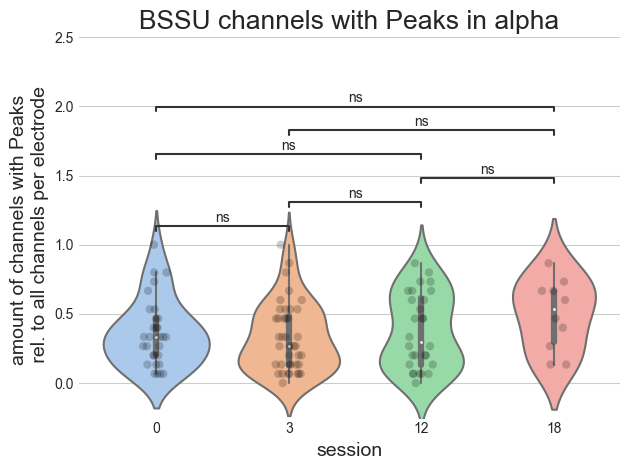

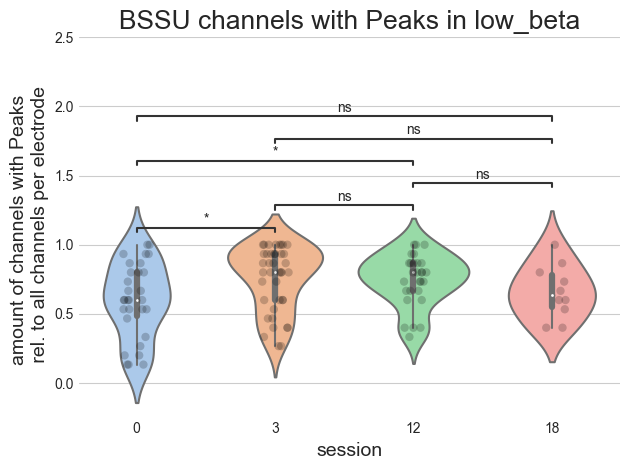

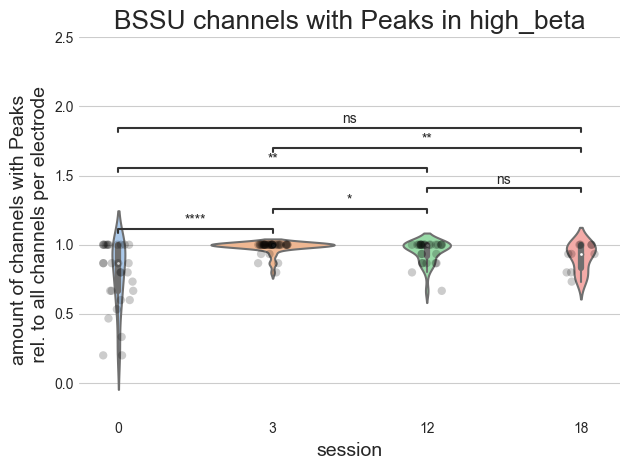

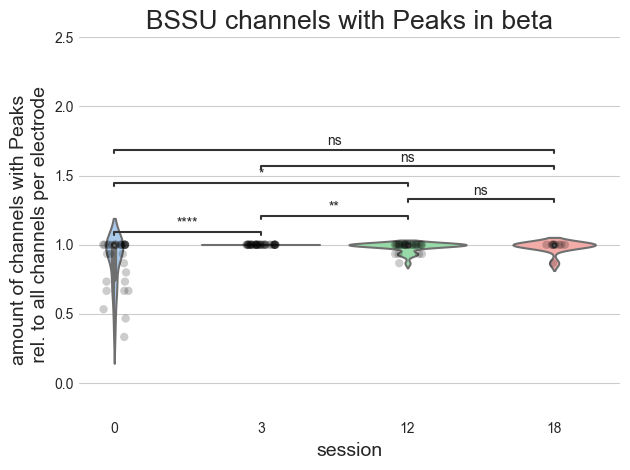

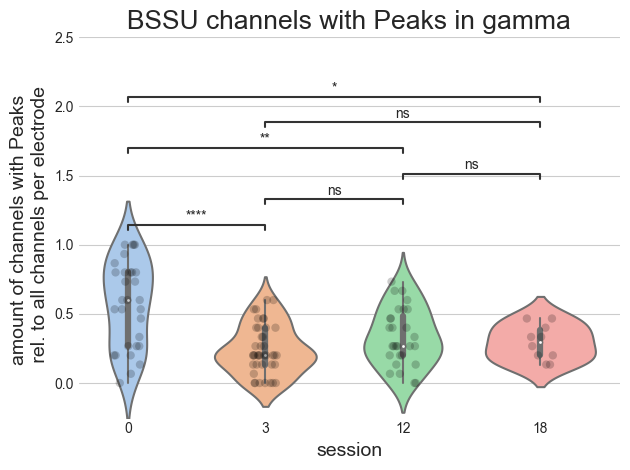

In [29]:
fooof_peaks = fooof_fit.fooof_peaks_in_freq_band_stats()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.691e-01 U_stat=2.510e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.030e-01 U_stat=2.745e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:1.211e-01 U_stat=6.550e+01
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:1.201e-01 U_stat=2.320e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:3.435e-01 U_stat=9.500e+01
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:9.034e-01 U_stat=8.700e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:9.085e-01 U_stat=2.110e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.776e-01 U_stat=2

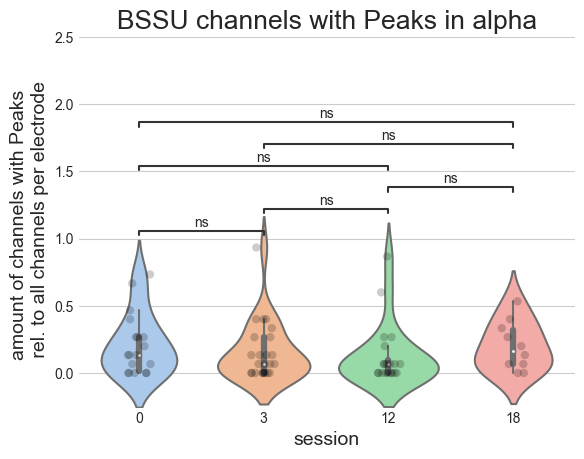

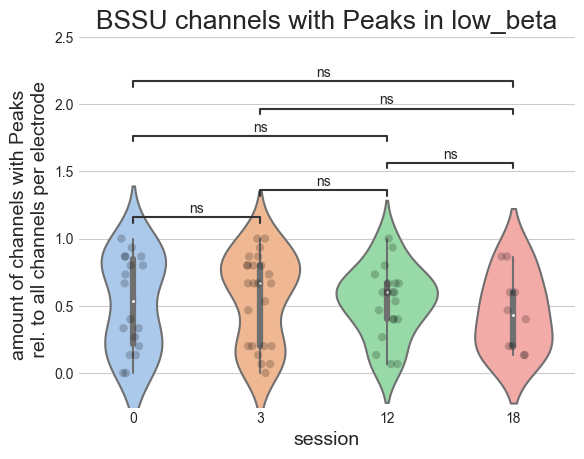

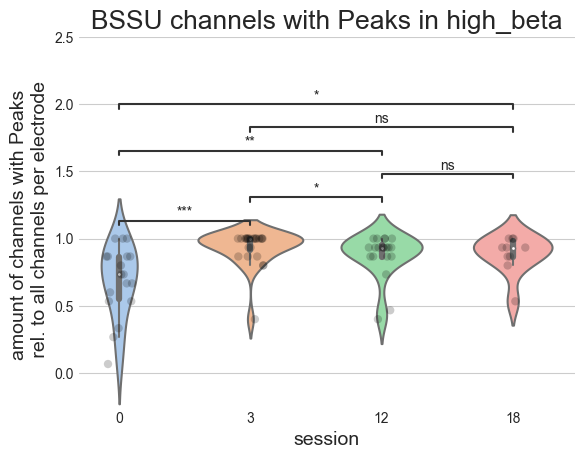

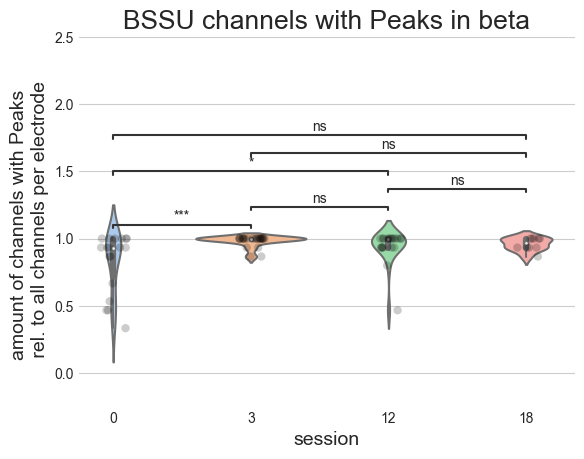

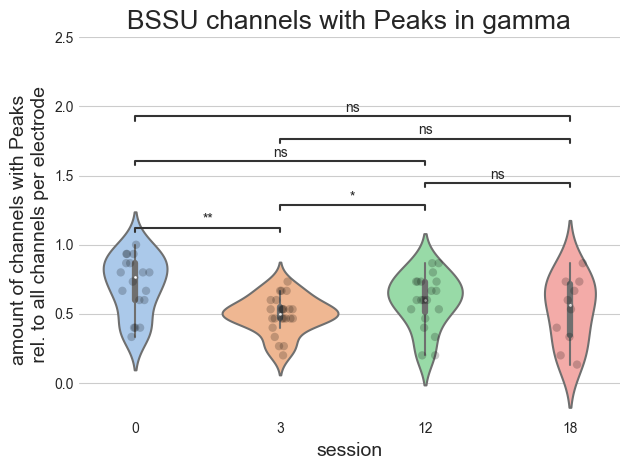

In [82]:
# plot line plot 
# cycler_colors = cycler("color", ["turquoise", "sandybrown", "plum", "cornflowerblue"])
# plt.rc('axes', prop_cycle=cycler_colors)


font = {"size": 14}

for f, freq in enumerate(freq_bands):

    freq_df = peaks_per_session.loc[peaks_per_session.frequency_band == freq]

    # replace session names by integers
    freq_df = freq_df.replace(to_replace="postop", value=0)
    freq_df = freq_df.replace(to_replace="fu3m", value=3)
    freq_df = freq_df.replace(to_replace="fu12m", value=12)
    freq_df = freq_df.replace(to_replace="fu18m", value=18)
   
    if freq=="alpha":
        color="sandybrown"
    
    elif freq=="beta":
        color="darkcyan"
    
    elif freq=="low_beta":
        color="turquoise"

    elif freq=="high_beta":
        color="cornflowerblue"
    
    elif freq=="gamma":
        color="plum"

    fig=plt.figure()
    ax=fig.add_subplot()

    sns.violinplot(data=freq_df, x="session", y="percentage_chans_with_peaks", palette="pastel", inner="box", ax=ax)

    sns.stripplot(
        data=freq_df,
        x="session",
        y="percentage_chans_with_peaks",
        ax=ax,
        size=6,
        color="black",
        alpha=0.2, # Transparency of dots
    )

    sns.despine(left=True, bottom=True) # get rid of figure frame


    # statistical test: doesn't work if groups have different sample size
    num_sessions = [0, 3, 12, 18]
    pairs = list(combinations(num_sessions, 2))

    annotator = Annotator(ax, pairs, data=freq_df, x='session', y='percentage_chans_with_peaks')
    annotator.configure(test='Mann-Whitney', text_format='star') # or ANOVA first to check if there is any difference between all groups
    annotator.apply_and_annotate()

    plt.title(f"BSSU channels with Peaks in {freq}", fontdict={"size": 19})
    plt.ylabel(f"amount of channels with Peaks \n rel. to all channels per electrode", fontdict=font)
    plt.ylim(-0.25, 2.5)
    plt.xlabel("session", fontdict=font)



# for ax in axes:
#     ax.set_ylim(-0.3, 1.3)

# axes[0].set_title("Amount of recordings with Peaks", fontdict={"size": 19})
# legend= axes[0].legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
# legend.get_frame().set_alpha(None)
# legend.get_frame().set_facecolor("white")

# axes[2].set_ylabel("recordings with peak in frequency band \nrelative to all recordings", fontdict=font)
# axes[4].set_xlabel("session", fontdict=font)


fig.tight_layout()


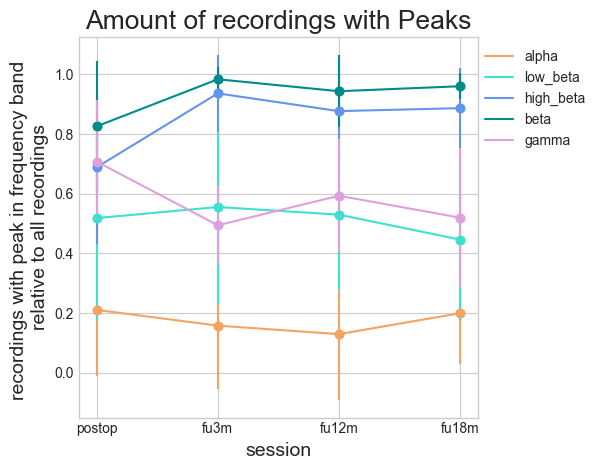

In [50]:
# plot line plot 
# cycler_colors = cycler("color", ["turquoise", "sandybrown", "plum", "cornflowerblue"])
# plt.rc('axes', prop_cycle=cycler_colors)

fig = plt.figure()

font = {"size": 14}

for freq in freq_bands:

    freq_df = perc_chans_with_peaks_df.loc[perc_chans_with_peaks_df.frequency_band == freq]
    #df_copy = freq_df.copy()

    # new column with mean-std and mean+std
    # df_copy["mean-std"] = df_copy.mean_percentage_chans_with_peaks.values - df_copy.std_percentage_chans_with_peaks.values
    # df_copy["mean+std"] = df_copy.mean_percentage_chans_with_peaks.values + df_copy.std_percentage_chans_with_peaks.values

    if freq=="alpha":
        color="sandybrown"
    
    elif freq=="beta":
        color="darkcyan"
    
    elif freq=="low_beta":
        color="turquoise"

    elif freq=="high_beta":
        color="cornflowerblue"
    
    elif freq=="gamma":
        color="plum"

    plt.plot(freq_df.session, freq_df.mean_percentage_chans_with_peaks, label=freq, color=color)
    # plt.fill_between(df_copy.session, 
    #                  df_copy["mean-std"],
    #                  df_copy["mean+std"],
    #                  color="gainsboro", alpha=0.5)
    
    plt.scatter(freq_df.session, freq_df.mean_percentage_chans_with_peaks, color=color)
    plt.errorbar(freq_df.session, freq_df.mean_percentage_chans_with_peaks, yerr=freq_df.std_percentage_chans_with_peaks, fmt="o", color=color)



plt.title("Amount of recordings with Peaks", fontdict={"size": 19})

plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
plt.xlabel("session", fontdict=font)
plt.ylabel("recordings with peak in frequency band \nrelative to all recordings", fontdict=font)
plt.tight_layout()


Plot the amount of Peaks in each frequency band per session

figure:  fooof_peaks_per_session.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures


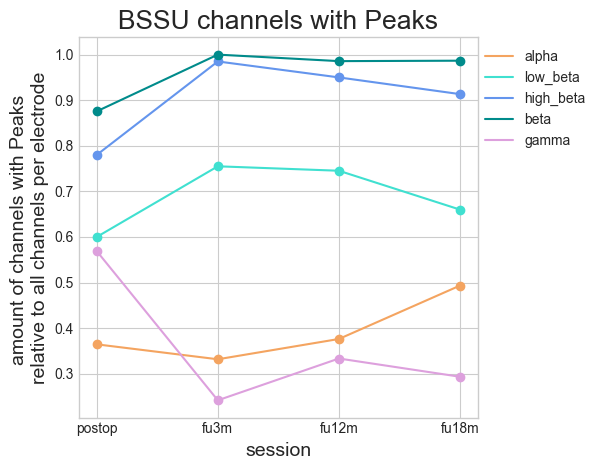

In [30]:
plot_peaks_per_session = fooof_fit.fooof_plot_peaks_per_session()

In [23]:
plot_peaks_per_session

session frequency_band mean_percentage_chans_with_peaks  \
postop_alpha      postop          alpha                         0.364444   
postop_low_beta   postop       low_beta                              0.6   
postop_high_beta  postop      high_beta                             0.78   
postop_beta       postop           beta                         0.875556   
postop_gamma      postop          gamma                         0.568889   
fu3m_alpha          fu3m          alpha                         0.331667   
fu3m_low_beta       fu3m       low_beta                            0.755   
fu3m_high_beta      fu3m      high_beta                            0.985   
fu3m_beta           fu3m           beta                              1.0   
fu3m_gamma          fu3m          gamma                         0.241667   
fu12m_alpha        fu12m          alpha                          0.37619   
fu12m_low_beta     fu12m       low_beta                         0.745238   
fu12m_high_beta    fu12m      high_beta                             0.95   
fu12m_beta         fu12m           beta                         0.985714   
fu12m_gamma        fu12m          gamma                         0.333333   
fu18m_alpha        fu18m          alpha                         0.493333   
fu18m_low_beta     fu18m       low_beta                             0.66   
fu18m_high_beta    fu18m      high_beta                         0.913333   
fu18m_beta         fu18m           beta                         0.986667   
fu18m_gamma        fu18m          gamma                         0.293333   

                 std_percentage_chans_with_peaks sample_size  
postop_alpha                            0.239588          30  
postop_low_beta                         0.266667          30  
postop_high_beta                        0.238607          30  
postop_beta                             0.185179          30  
postop_gamma                             0.30586          30  
fu3m_alpha                               0.24335          40  
fu3m_low_beta                            0.22968          40  
fu3m_high_beta                          0.043429          40  
fu3m_beta                                    0.0          40  
fu3m_gamma                              0.174284          40  
fu12m_alpha                             0.265003          28  
fu12m_low_beta                          0.183488          28  
fu12m_high_beta                         0.080917          28  
fu12m_beta                              0.032646          28  
fu12m_gamma                             0.202367          28  
fu18m_alpha                             0.242579          10  
fu18m_low_beta                          0.184872          10  
fu18m_high_beta                         0.094516          10  
fu18m_beta                                  0.04          10  
fu18m_gamma                                 0.12          10

In [31]:
peaks_per_session = loadResults.load_fooof_peaks_per_session()

## 3. Calculate the ratio of low beta and high beta Peaks as highest Peak in beta band 

First calculate the ratio of total low beta vs high beta Peaks (independent of which Peak is higher)

figure:  fooof_low_vs_high_beta_peaks_per_session.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures


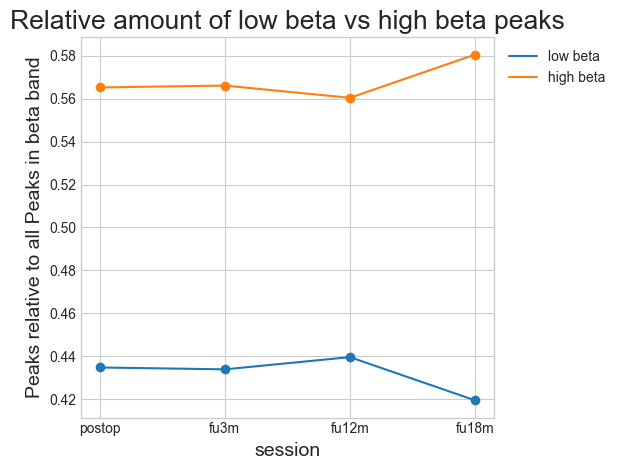

In [31]:
peaks_per_session = fooof_fit.fooof_low_vs_high_beta_ratio()

In [85]:
peaks_per_session

session beta_peaks low_beta_peaks high_beta_peaks relative_low_beta  \
postop  postop        433            193             240          0.445727   
fu3m      fu3m        725            310             415          0.427586   
fu12m    fu12m        558            246             312           0.44086   
fu18m    fu18m        236             99             137          0.419492   

       relative_high_beta  
postop           0.554273  
fu3m             0.572414  
fu12m             0.55914  
fu18m            0.580508

In [81]:
peaks_per_session = loadResults.load_fooof_peaks_per_session()

In [82]:
peaks_per_session.head()

subject_hemisphere session frequency_band  \
017_Right_fu3m_alpha              017_Right    fu3m          alpha   
017_Right_fu3m_low_beta           017_Right    fu3m       low_beta   
017_Right_fu3m_high_beta          017_Right    fu3m      high_beta   
017_Right_fu3m_beta               017_Right    fu3m           beta   
017_Right_fu3m_gamma              017_Right    fu3m          gamma   

                         total_chans_number number_chans_with_peaks  \
017_Right_fu3m_alpha                     15                       4   
017_Right_fu3m_low_beta                  15                       4   
017_Right_fu3m_high_beta                 15                      15   
017_Right_fu3m_beta                      15                      15   
017_Right_fu3m_gamma                     15                       7   

                         percentage_chans_with_peaks  
017_Right_fu3m_alpha                        0.266667  
017_Right_fu3m_low_beta                     0.266667  
017_Right_fu3m_high_beta                         1.0  
017_Right_fu3m_beta                              1.0  
017_Right_fu3m_gamma                        0.466667

In [68]:
session_df = peaks_per_session.loc[peaks_per_session.session=="postop"]
session_df.head()

subject_hemisphere session frequency_band  \
024_Right_postop_alpha              024_Right  postop          alpha   
024_Right_postop_low_beta           024_Right  postop       low_beta   
024_Right_postop_high_beta          024_Right  postop      high_beta   
024_Right_postop_beta               024_Right  postop           beta   
024_Right_postop_gamma              024_Right  postop          gamma   

                           total_chans_number number_chans_with_peaks  \
024_Right_postop_alpha                     15                      12   
024_Right_postop_low_beta                  15                       9   
024_Right_postop_high_beta                 15                      15   
024_Right_postop_beta                      15                      15   
024_Right_postop_gamma                     15                       9   

                           percentage_chans_with_peaks  
024_Right_postop_alpha                             0.8  
024_Right_postop_low_beta                          0.6  
024_Right_postop_high_beta                         1.0  
024_Right_postop_beta                              1.0  
024_Right_postop_gamma                             0.6

In [78]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]

rel_low_vs_high_beta = {}

for ses in sessions:

    session_df = peaks_per_session.loc[peaks_per_session.session==ses]

    # beta_peaks = session_df.loc[session_df.frequency_band=="beta"]
    # beta_peaks = beta_peaks.number_chans_with_peaks.values
    # beta_peaks = beta_peaks[0]

    low_beta_peaks = session_df.loc[session_df.frequency_band=="low_beta"]
    low_beta_peaks = np.sum(low_beta_peaks.number_chans_with_peaks.values)

    high_beta_peaks = session_df.loc[session_df.frequency_band=="high_beta"]
    high_beta_peaks = np.sum(high_beta_peaks.number_chans_with_peaks.values)

    beta_peaks = low_beta_peaks + high_beta_peaks

    relative_low_beta = low_beta_peaks / beta_peaks
    relative_high_beta = high_beta_peaks / beta_peaks

    rel_low_vs_high_beta[f"{ses}"] = [ses, beta_peaks, low_beta_peaks, high_beta_peaks, relative_low_beta, relative_high_beta]


# save the results in a dataframe
session_low_vs_high_peak_df = pd.DataFrame(rel_low_vs_high_beta)
session_low_vs_high_peak_df.rename(index={
    0: "session",
    1: "beta_peaks",
    2: "low_beta_peaks",
    3: "high_beta_peaks",
    4: "relative_low_beta",
    5: "relative_high_beta"
}, inplace=True)
session_low_vs_high_peak_df = session_low_vs_high_peak_df.transpose()



In [79]:
session_low_vs_high_peak_df

session beta_peaks low_beta_peaks high_beta_peaks relative_low_beta  \
postop  postop        433            193             240          0.445727   
fu3m      fu3m        725            310             415          0.427586   
fu12m    fu12m        558            246             312           0.44086   
fu18m    fu18m        236             99             137          0.419492   

       relative_high_beta  
postop           0.554273  
fu3m             0.572414  
fu12m             0.55914  
fu18m            0.580508

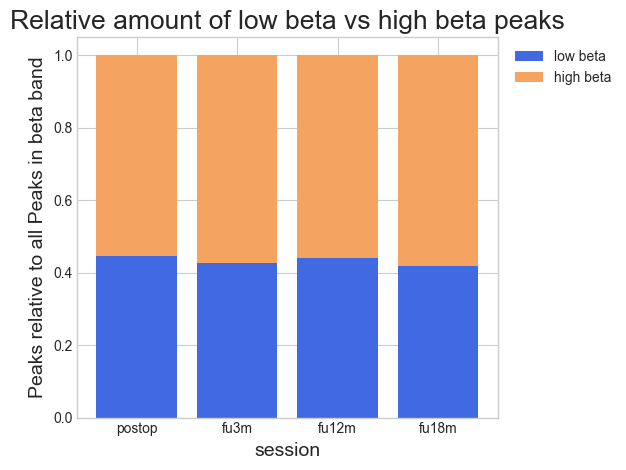

In [80]:
fig = plt.figure()

font = {"size": 14}

plt.bar(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_low_beta, label="low beta", color="royalblue")
plt.bar(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_high_beta, label="high beta", bottom=session_low_vs_high_peak_df.relative_low_beta, color="sandybrown")

# plt.plt(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_low_beta, label="low beta")
# plt.plt(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_high_beta, label="high beta")

# plt.scatter(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_low_beta,)
# plt.scatter(session_low_vs_high_peak_df.session, session_low_vs_high_peak_df.relative_high_beta)

plt.title("Relative amount of low beta vs high beta peaks", fontdict={"size": 19})

plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
plt.xlabel("session", fontdict=font)
plt.ylabel("Peaks relative to all Peaks in beta band", fontdict=font)
fig.tight_layout()

## 4. Center Frequency of highest Peak in beta band (13-35 Hz)

TODO: only choose highest beta channel in baseline postop

/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/tfr/fooof_fit.py:1111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_to_plot["session"] = parameters_to_plot["session"].astype(int)
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/tfr/fooof_fit.py:1112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_to_plot[parameter] = parameters_to_plot[parameter].astype(float)
/Users/j

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.785e-01 U_stat=5.440e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:1.360e-01 U_stat=3.720e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:7.480e-01 U_stat=1.110e+02
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:5.294e-01 U_stat=2.570e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:1.296e-01 U_stat=1.370e+02
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:4.164e-01 U_stat=9.800e+01
figure:  fooof_highest_beta_peak_center_frequency_highest_fu3m_ring.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: 

/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/tfr/fooof_fit.py:1111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_to_plot["session"] = parameters_to_plot["session"].astype(int)
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/tfr/fooof_fit.py:1112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_to_plot[parameter] = parameters_to_plot[parameter].astype(float)


0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:4.384e-01 U_stat=9.900e+01
figure:  fooof_highest_beta_peak_center_frequency_highest_fu3m_segm_intra.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures
file:  fooof_center_frequency_session_description_highest_beta_peak_highest_fu3m.pickle 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


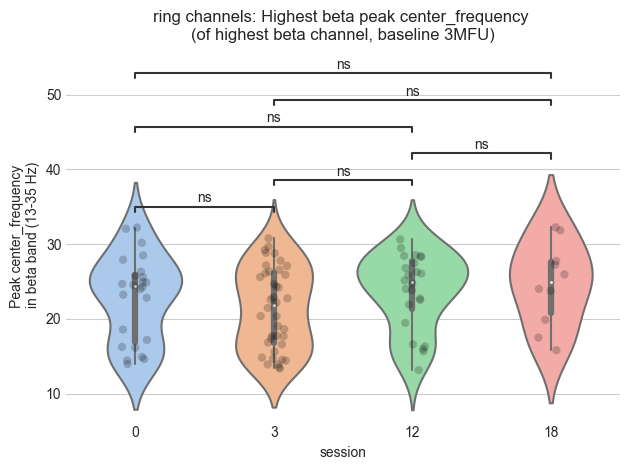

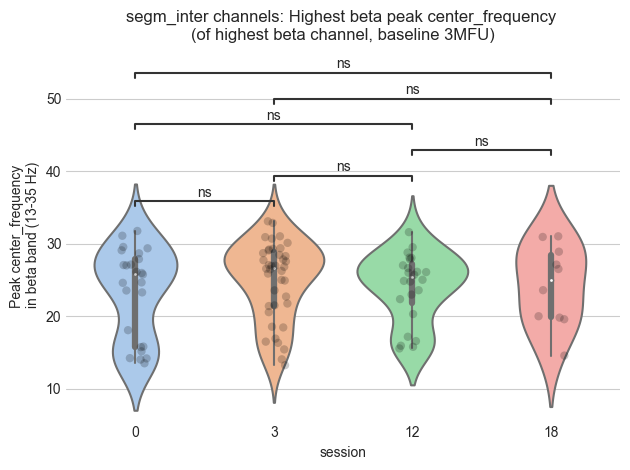

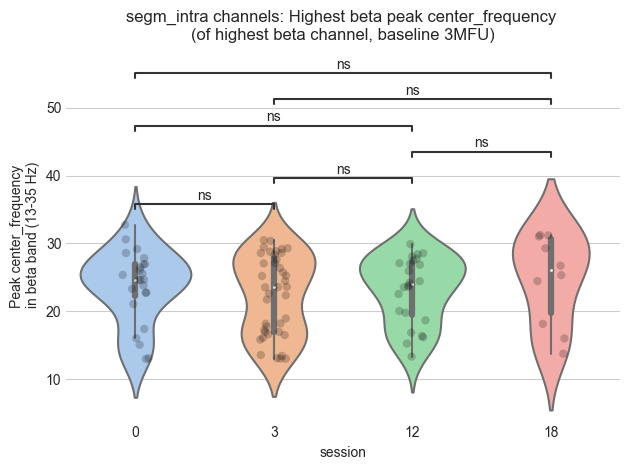

In [32]:
center_freq_beta = fooof_fit.fooof_highest_beta_peak_analysis(highest_beta_session="highest_fu3m",
                                                              cf_or_power="center_frequency")

In [87]:
center_freq_beta["description_results"]

number_observations                     min_and_max  \
0.0_months_postop                  270    (13.0090415686, 33.41145762)   
3.0_months_postop                  420  (13.0653434847, 34.5490897102)   
12.0_months_postop                 325  (13.0720495525, 34.6774799402)   
18.0_months_postop                 148  (13.2967825604, 34.5528467452)   

                         mean   variance  skewness  kurtosis  
0.0_months_postop   21.476836  31.298506 -0.026981 -1.360453  
3.0_months_postop   23.590089  29.144374 -0.242321 -1.162387  
12.0_months_postop  22.977031  27.480816 -0.060735 -0.976551  
18.0_months_postop  24.432617  29.617164 -0.330326 -0.854177

In [27]:
fooof_result = loadResults.load_group_fooof_result()
fooof_result.head()

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
0          017_Right    fu3m              03     0.062071    0.984228   
1          017_Right    fu3m              13     0.086020    0.961885   
2          017_Right    fu3m              02     0.082106    0.972390   
3          017_Right    fu3m              12     0.094479    0.949418   
4          017_Right    fu3m              01     0.067213    0.976017   

   fooof_exponent  fooof_offset    fooof_knee  fooof_number_peaks  \
0        1.789802      1.510125       wo_knee                   4   
1        1.494661      1.099469       wo_knee                   4   
2        1.754591      1.557219       wo_knee                   4   
3        3.197360      4.266728  69876.354037                   3   
4        1.573552      1.132607       wo_knee                   4   

  alpha_peak_CF_power_bandWidth low_beta_peak_CF_power_bandWidth  \
0            [None, None, None]               [None, None, None]   
1            [None, None, None]               [None, None, None]   
2            [None, None, None]               [None, None, None]   
3            [None, None, None]               [None, None, None]   
4            [None, None, None]               [None, None, None]   

             high_beta_peak_CF_power_bandWidth  \
0  [29.1230769409, 0.5757473113, 6.9654712301]   
1  [29.2192804454, 0.9026002023, 2.9996984052]   
2    [29.52639043, 1.0032092798, 6.4720784861]   
3  [29.0569975142, 0.7209673255, 4.0650624862]   
4  [30.8852999093, 0.3194295567, 8.4306160856]   

                  beta_peak_CF_power_bandWidth  \
0  [29.1230769409, 0.5757473113, 6.9654712301]   
1  [29.2192804454, 0.9026002023, 2.9996984052]   
2    [29.52639043, 1.0032092798, 6.4720784861]   
3  [29.0569975142, 0.7209673255, 4.0650624862]   
4  [30.8852999093, 0.3194295567, 8.4306160856]   

                 gamma_peak_CF_power_bandWidth  
0                           [None, None, None]  
1                           [None, None, None]  
2                           [None, None, None]  
3  [82.7458266127, 0.3105218111, 4.4872275805]  
4  [64.6314589389, 0.1981129703, 9.4143048634]

In [28]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]
beta_peak_parameters = {}

for ses in sessions:

    if ses == "postop":
        numeric_session = 0
    
    elif ses == "fu3m":
        numeric_session = 3
    
    elif ses == "fu12m":
        numeric_session = 12
    
    elif ses == "fu18m":
        numeric_session = 18

    session_df = fooof_result.loc[fooof_result.session==ses]
    beta_peaks_wo_None = []

    # only get the rows with Peaks (drop all rows with None)
    for item in session_df.beta_peak_CF_power_bandWidth.values:
    
        if None not in item:
            beta_peaks_wo_None.append(item)

    beta_peak_ses_df = session_df.loc[session_df["beta_peak_CF_power_bandWidth"].isin(beta_peaks_wo_None)]

    # get only the center frequency from the column beta_peak_CF_power_bandWidth
    for i, item in enumerate(beta_peak_ses_df.beta_peak_CF_power_bandWidth.values):
        # item is a list of center frequency, power, band width of highest Peak in beta band

        beta_cf = item[0]
        beta_power = item[1]
        beta_band_width = item[2]

        beta_peak_parameters[f"{ses}_{i}"] = [numeric_session, beta_cf, beta_power, beta_band_width]


# save the results in a dataframe
beta_peak_parameters_df = pd.DataFrame(beta_peak_parameters)
beta_peak_parameters_df.rename(index={
    0: "session",
    1: "beta_cf",
    2: "beta_power",
    3: "beta_band_width",
}, inplace=True)
beta_peak_parameters_df = beta_peak_parameters_df.transpose()


In [29]:
# only get the rows with Peaks (drop all rows with None)
beta_peaks_wo_None=[]
for item in fooof_result.beta_peak_CF_power_bandWidth.values:

    if None not in item:
        beta_peaks_wo_None.append(item)

beta_peak_wo_none_df = fooof_result.loc[fooof_result["beta_peak_CF_power_bandWidth"].isin(beta_peaks_wo_None)]

In [30]:
beta_peak_wo_none_df.head()

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
0          017_Right    fu3m              03     0.062071    0.984228   
1          017_Right    fu3m              13     0.086020    0.961885   
2          017_Right    fu3m              02     0.082106    0.972390   
3          017_Right    fu3m              12     0.094479    0.949418   
4          017_Right    fu3m              01     0.067213    0.976017   

   fooof_exponent  fooof_offset    fooof_knee  fooof_number_peaks  \
0        1.789802      1.510125       wo_knee                   4   
1        1.494661      1.099469       wo_knee                   4   
2        1.754591      1.557219       wo_knee                   4   
3        3.197360      4.266728  69876.354037                   3   
4        1.573552      1.132607       wo_knee                   4   

  alpha_peak_CF_power_bandWidth low_beta_peak_CF_power_bandWidth  \
0            [None, None, None]               [None, None, None]   
1            [None, None, None]               [None, None, None]   
2            [None, None, None]               [None, None, None]   
3            [None, None, None]               [None, None, None]   
4            [None, None, None]               [None, None, None]   

             high_beta_peak_CF_power_bandWidth  \
0  [29.1230769409, 0.5757473113, 6.9654712301]   
1  [29.2192804454, 0.9026002023, 2.9996984052]   
2    [29.52639043, 1.0032092798, 6.4720784861]   
3  [29.0569975142, 0.7209673255, 4.0650624862]   
4  [30.8852999093, 0.3194295567, 8.4306160856]   

                  beta_peak_CF_power_bandWidth  \
0  [29.1230769409, 0.5757473113, 6.9654712301]   
1  [29.2192804454, 0.9026002023, 2.9996984052]   
2    [29.52639043, 1.0032092798, 6.4720784861]   
3  [29.0569975142, 0.7209673255, 4.0650624862]   
4  [30.8852999093, 0.3194295567, 8.4306160856]   

                 gamma_peak_CF_power_bandWidth  
0                           [None, None, None]  
1                           [None, None, None]  
2                           [None, None, None]  
3  [82.7458266127, 0.3105218111, 4.4872275805]  
4  [64.6314589389, 0.1981129703, 9.4143048634]

In [90]:
# merge dataframe with all columns + columns from beta_peak_parameters_df


In [116]:
beta_peak_parameters_df.head()

session    beta_cf  beta_power  beta_band_width
postop_0      0.0  15.439420    0.480978         2.265218
postop_1      0.0  14.284981    0.642110         3.707680
postop_2      0.0  22.669247    0.141364        12.190925
postop_3      0.0  23.033545    0.546670         8.080994
postop_4      0.0  17.387427    0.261385         2.263232

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 3.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.363e-13 U_stat=2.540e+04
3.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.243e-02 U_stat=5.398e+04
12.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.395e-02 U_stat=1.805e+04
0.0 vs. 12.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.366e-08 U_stat=2.228e+04
3.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.112e-01 U_stat=2.453e+04
0.0 vs. 18.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.029e-09 U_stat=1.025e+04


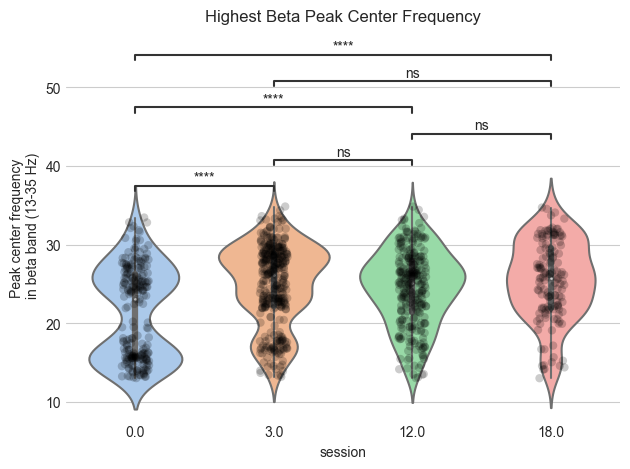

In [36]:
fig=plt.figure()
ax = fig.add_subplot()

sns.violinplot(data=beta_peak_parameters_df, x="session", y="beta_cf", palette="pastel", inner="box", ax=ax)

# statistical test: doesn't work if groups have different sample size
num_sessions = [0.0, 3.0, 12.0, 18.0]
pairs = list(combinations(num_sessions, 2))

annotator = Annotator(ax, pairs, data=beta_peak_parameters_df, x='session', y="beta_cf")
annotator.configure(test='Mann-Whitney', text_format='star') # or t-test_ind ??
annotator.apply_and_annotate()

sns.stripplot(
    data=beta_peak_parameters_df,
    x="session",
    y="beta_cf",
    ax=ax,
    size=6,
    color="black",
    alpha=0.2, # Transparency of dots
)

sns.despine(left=True, bottom=True) # get rid of figure frame

plt.title("Highest Beta Peak Center Frequency")
plt.ylabel("Peak center frequency \nin beta band (13-35 Hz)")
plt.xlabel("session")

fig.tight_layout()



In [133]:
# describe each group
num_sessions = [0.0, 3.0, 12.0, 18.0]
group_description = {}

for ses in num_sessions:

    group = beta_peak_parameters_df.loc[beta_peak_parameters_df.session==ses]
    group = np.array(group.beta_cf.values)

    description = scipy.stats.describe(group)

    group_description[f"{ses}_months_postop"] = description


description_results = pd.DataFrame(group_description)
description_results.rename(index={0: "number_observations", 1: "min_and_max", 2: "mean", 3: "variance", 4: "skewness", 5: "kurtosis"}, inplace=True)
description_results = description_results.transpose()

In [134]:
description_results

number_observations                     min_and_max  \
0.0_months_postop                  223  (13.0182812573, 33.4421995766)   
3.0_months_postop                  354  (13.1798526772, 34.8422643731)   
12.0_months_postop                 283  (13.0159880365, 34.8330854639)   
18.0_months_postop                 144           (13.0, 34.7135510742)   

                         mean   variance  skewness  kurtosis  
0.0_months_postop   21.402832  33.696318  0.082395  -1.43541  
3.0_months_postop   24.909206  25.981049 -0.527289 -0.679124  
12.0_months_postop  24.443643  22.880766 -0.330202 -0.504257  
18.0_months_postop  25.412741  25.477248 -0.416246 -0.392307

## 4. Center frequency of highest peak in beta; only in beta rank 1 channels from postop or per session

/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/tfr/fooof_fit.py:1111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_to_plot["session"] = parameters_to_plot["session"].astype(int)
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/tfr/fooof_fit.py:1112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_to_plot[parameter] = parameters_to_plot[parameter].astype(float)
/Users/j

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.277e-05 U_stat=1.800e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:2.999e-02 U_stat=6.370e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:2.338e-01 U_stat=8.800e+01
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:7.790e-02 U_stat=2.020e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:8.557e-01 U_stat=2.080e+02
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:1.639e-02 U_stat=5.600e+01
figure:  fooof_highest_beta_peak_power_highest_fu3m_ring.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-

/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/tfr/fooof_fit.py:1111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_to_plot["session"] = parameters_to_plot["session"].astype(int)
/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/tfr/fooof_fit.py:1112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_to_plot[parameter] = parameters_to_plot[parameter].astype(float)


figure:  fooof_highest_beta_peak_power_highest_fu3m_segm_intra.png 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures
file:  fooof_power_session_description_highest_beta_peak_highest_fu3m.pickle 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


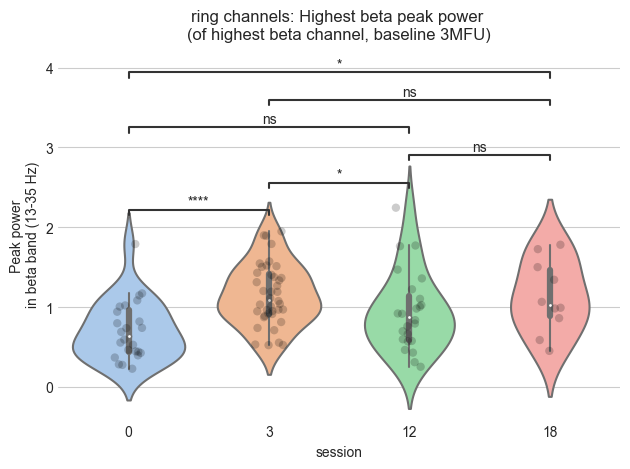

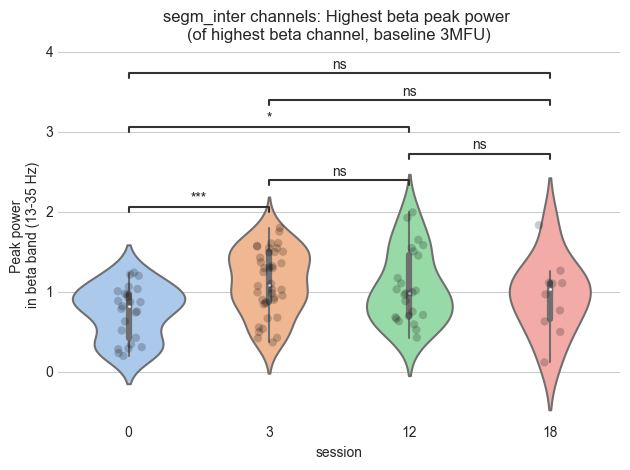

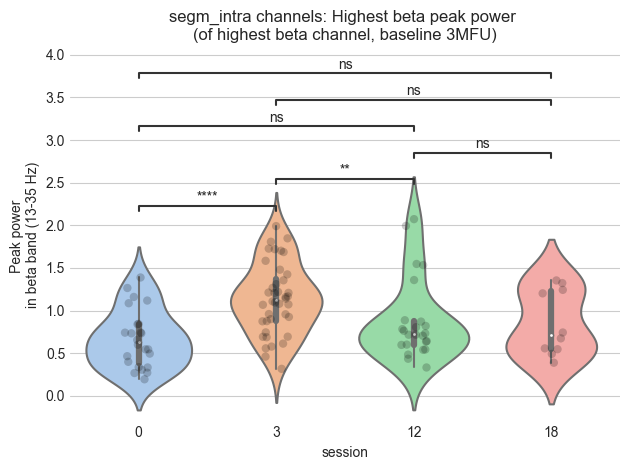

In [34]:
highest_beta_peak_cf = fooof_fit.fooof_highest_beta_peak_analysis(
    highest_beta_session="highest_fu3m",
    cf_or_power = "power"
)

In [9]:
highest_beta_peak_cf["description_results"]

number_observations  \
ring_0.0_months_postop                         55   
ring_3.0_months_postop                         84   
ring_12.0_months_postop                        64   
ring_18.0_months_postop                        30   
segm_inter_0.0_months_postop                   53   
segm_inter_3.0_months_postop                   84   
segm_inter_12.0_months_postop                  66   
segm_inter_18.0_months_postop                  30   
segm_intra_0.0_months_postop                  104   
segm_intra_3.0_months_postop                  168   
segm_intra_12.0_months_postop                 130   
segm_intra_18.0_months_postop                  58   

                                                  min_and_max       mean  \
ring_0.0_months_postop         (13.4245851469, 31.0630557212)  21.596235   
ring_3.0_months_postop          (13.8891013493, 33.520389333)  22.804518   
ring_12.0_months_postop        (13.1012389915, 32.0818878488)  22.572405   
ring_18.0_months_postop        (14.3628761744, 32.2596806925)  24.515084   
segm_inter_0.0_months_postop   (13.0393681742, 31.7754178983)  20.562119   
segm_inter_3.0_months_postop   (14.0542362957, 33.6745978912)  24.732585   
segm_inter_12.0_months_postop  (13.2854438887, 34.6774799402)  22.981486   
segm_inter_18.0_months_postop  (14.2929891979, 31.6695464954)  24.809742   
segm_intra_0.0_months_postop     (13.0090415686, 33.41145762)  21.864685   
segm_intra_3.0_months_postop   (13.5980312848, 34.5490897102)  23.374824   
segm_intra_12.0_months_postop  (13.0720495525, 34.5859296532)  23.014104   
segm_intra_18.0_months_postop  (13.2967825604, 34.0754205556)  23.975318   

                                variance  skewness  kurtosis  
ring_0.0_months_postop         26.213893 -0.163211 -1.345675  
ring_3.0_months_postop         25.411134 -0.010466 -0.937458  
ring_12.0_months_postop        26.965538  -0.02005 -1.252484  
ring_18.0_months_postop        23.920303 -0.337015 -0.493438  
segm_inter_0.0_months_postop   35.414841  0.134319  -1.56671  
segm_inter_3.0_months_postop   30.854125 -0.433041 -1.135494  
segm_inter_12.0_months_postop  29.263635 -0.045712 -0.981356  
segm_inter_18.0_months_postop  32.916103 -0.514816 -0.968431  
segm_intra_0.0_months_postop    33.35235  -0.06837 -1.215243  
segm_intra_3.0_months_postop   30.338946 -0.221444 -1.260297  
segm_intra_12.0_months_postop  27.556183 -0.027538 -0.808308  
segm_intra_18.0_months_postop  34.284531 -0.222061 -1.082524

In [19]:
highest_beta_peak_cf["beta_peak_parameters_df"].head()

session    beta_cf  beta_power  beta_band_width
postop_0      0.0  23.247233    0.941201        14.895322
postop_1      0.0  24.589540    0.406245         7.411685
postop_2      0.0  25.584188    0.809415         3.442456
postop_3      0.0  16.265086    0.738941         2.446646
postop_4      0.0  15.742801    0.967992         2.945254

In [35]:
highest_beta_df = fooof_fit.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_fu3m"
)

## 5. Linear mixed effects model: beta power area under the curve of peak center frequency +- 3 Hz from highest beta peak at 3MFU (+- 3 Hz)
- calculate Power area under the curve +-3 Hz range

In [21]:
highest_beta_channels = fooof_peaks.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2",
    highest_beta_session="highest_fu3m"
)

# don´t forget that when you choose "highest_fu3m" -> only subjects are included who actually have a 3MFU recording!!!!!

In [35]:
rings = highest_beta_channels["ring"]
segm_intra = highest_beta_channels["segm_intra"]
segm_inter = highest_beta_channels["segm_inter"]

rings.head()

subject_hemisphere  session bipolar_channel  fooof_error  fooof_r_sq  \
2          017_Right        3              23     0.065806    0.981375   
2          017_Right       12              23     0.066275    0.988890   
2           017_Left        3              23     0.062341    0.985369   
2           017_Left       12              23     0.072735    0.971411   
1          019_Right        3              01     0.118571    0.964737   

   fooof_exponent  fooof_offset  \
2        1.270456      0.586390   
2        1.666388      1.386621   
2        1.450099      0.776517   
2        1.456667      0.832386   
1        1.375863      0.771881   

                                fooof_power_spectrum  \
2  [0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...   
2  [3.07823e-05, 4.01951e-05, 7.86632e-05, 0.0001...   
2  [0.0005356426, 0.0005132144, 0.0007092214, 0.0...   
2  [0.0031519931, 0.0021156252, 0.0021012276, 0.0...   
1  [0.092379458, 0.0548795876, 0.0476712607, 0.04...   

                   periodic_plus_aperiodic_power_log  \
2  [0.5863896016, 0.2039441538, -0.0197720838, -0...   
2  [1.3866220256, 0.8849910955, 0.5915612774, 0.3...   
2  [0.7765555712, 0.3400951925, 0.0848969384, -0....   
2  [0.8325876487, 0.3942568159, 0.138044336, -0.0...   
1  [0.7786128006, 0.3680403549, 0.1310160553, -0....   

                                 fooof_periodic_flat  ...  group  \
2  [0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...  ...      1   
2  [5.489e-07, 2.2749e-06, 8.7498e-06, 3.1231e-05...  ...      1   
2  [3.89156e-05, 0.0001018683, 0.0002533937, 0.00...  ...      0   
2  [0.000201318, 0.0003708102, 0.000664577, 0.001...  ...      0   
1  [0.0067314449, 0.0103350377, 0.0155881895, 0.0...  ...      3   

  beta_center_frequency beta_peak_power beta_band_width  \
2             30.781507        1.075683        5.057215   
2             28.543743        0.919721        5.377719   
2             20.360215        0.553457        8.854238   
2             23.837787        0.251540       12.094807   
1             25.616961        1.503141       15.000000   

   low_beta_center_frequency  low_beta_peak_power  low_beta_band_width  \
2                  13.548237             0.502387             3.520474   
2                  13.764355             0.765146             3.141337   
2                        NaN                  NaN                  NaN   
2                  17.037329             0.199431             2.000000   
1                        NaN                  NaN                  NaN   

   high_beta_center_frequency  high_beta_peak_power  high_beta_band_width  
2                   30.781507              1.075683              5.057215  
2                   28.543743              0.919721              5.377719  
2                   30.504247              0.536031              6.347709  
2                   23.837787              0.251540             12.094807  
1                   25.616961              1.503141             15.000000  

[5 rows x 26 columns]

In [23]:
highest_beta = fooof_peaks.calculate_auc_beta_power(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_fu3m",
    around_cf="around_cf_at_fixed_session"
)


The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of sess

In [26]:
data = highest_beta["ring"]
data_spec = data.loc[data.subject_hemisphere == "030_Right"]
data_spec

subject_hemisphere  session bipolar_channel  fooof_error  fooof_r_sq  \
0          030_Right        0              12     0.063135    0.975204   
0          030_Right        3              12     0.070077    0.984705   
0          030_Right       12              12     0.066372    0.983659   
0          030_Right       24              12     0.065079    0.974770   

   fooof_exponent  fooof_offset  \
0        1.224752      0.186378   
0        1.211814      0.431295   
0        1.463041      0.767261   
0        1.204528      0.190478   

                                fooof_power_spectrum  \
0  [0.0004952536, 0.0011730185, 0.0031814173, 0.0...   
0  [0.02594443, 0.0351101592, 0.0590175969, 0.101...   
0  [2.656e-07, 4.4448e-06, 7.02207e-05, 0.0008023...   
0  [0.0071679168, 0.0143989488, 0.0321473017, 0.0...   

                   periodic_plus_aperiodic_power_log  \
0  [0.1865176749, -0.1815349698, -0.3945367761, -...   
0  [0.4354489075, 0.079392561, -0.1123514759, -0....   
0  [0.7672613706, 0.3268430603, 0.0692394371, -0....   
0  [0.1924813465, -0.1629242784, -0.3516613166, -...   

                                 fooof_periodic_flat  ...  \
0  [0.0001400117, 0.000774482, 0.0034408125, 0.01...  ...   
0  [0.0041538884, 0.0128900208, 0.0345359046, 0.0...  ...   
0  [1.97e-08, 9.095e-07, 2.6003e-05, 0.0004523517...  ...   
0  [0.0020030744, 0.0091966484, 0.0325665444, 0.0...  ...   

   low_beta_band_width high_beta_center_frequency high_beta_peak_power  \
0             2.929359                  24.931109             0.526783   
0             5.068002                  22.606029             1.402903   
0             4.661631                  22.546965             0.596136   
0             4.232757                  22.840435             0.742119   

  high_beta_band_width  round_beta_cf  beta_power_auc  round_low_beta_cf  \
0             8.521549             23        0.377382               16.0   
0             3.695271             23        4.412663               16.0   
0             4.963400             23        0.685870               16.0   
0             4.798595             23        0.596359               16.0   

   low_beta_power_auc  round_high_beta_cf  high_beta_power_auc  
0            0.344720                23.0             0.377382  
0            2.305737                23.0             4.412663  
0            0.623975                23.0             0.685870  
0            0.199348                23.0             0.596359  

[4 rows x 32 columns]

The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to cal

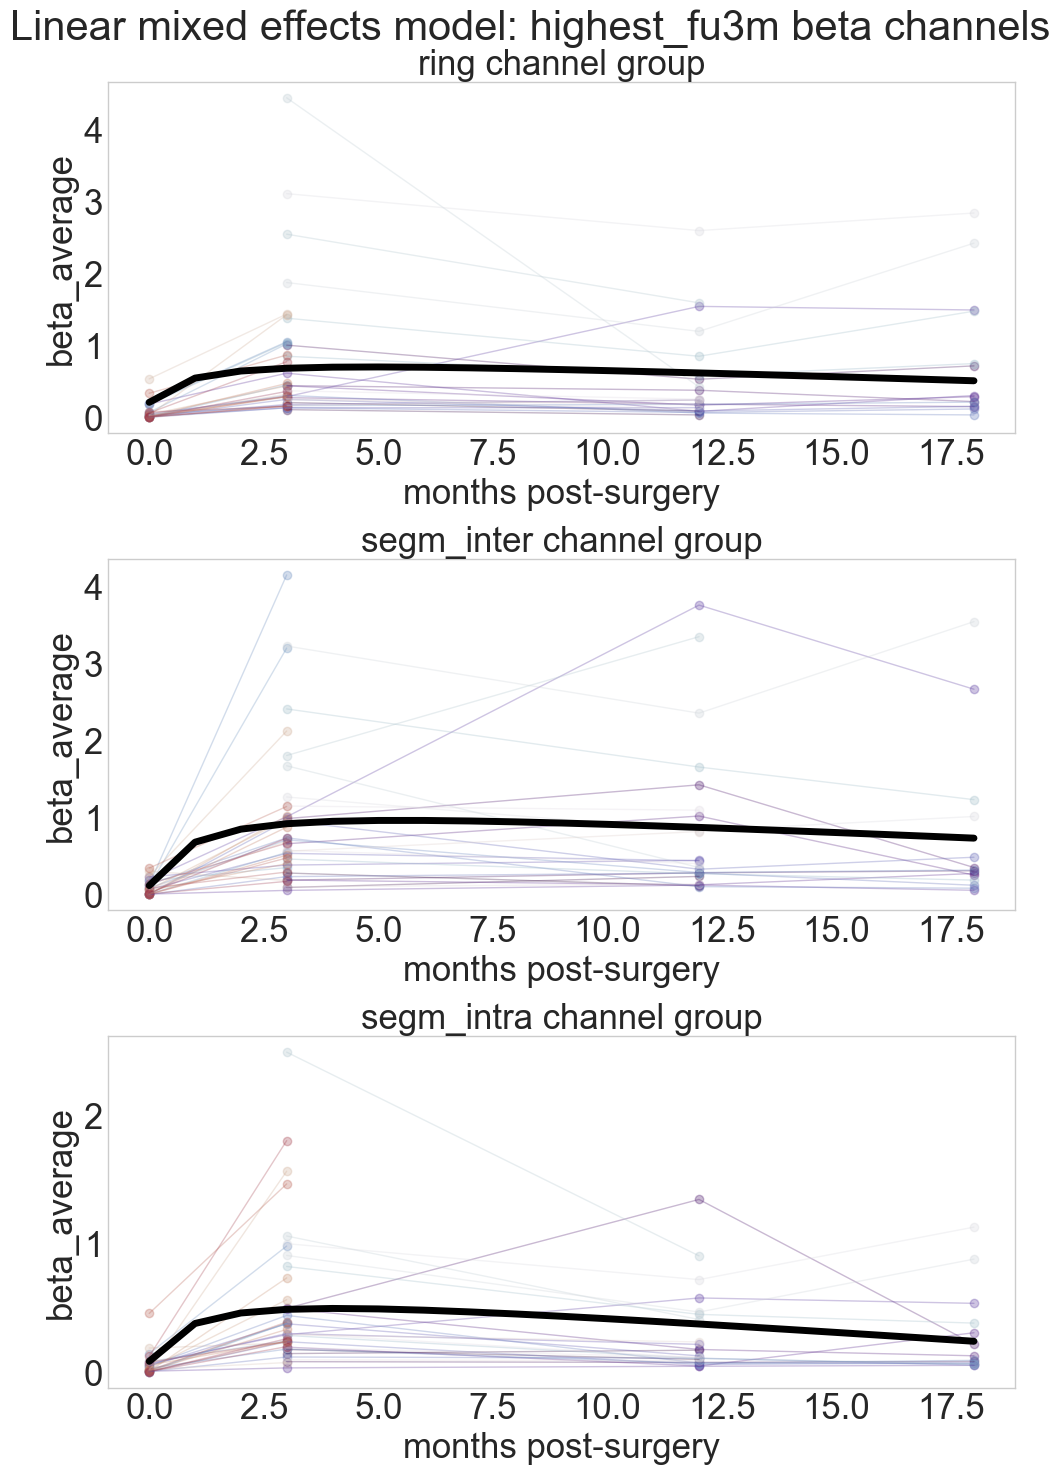

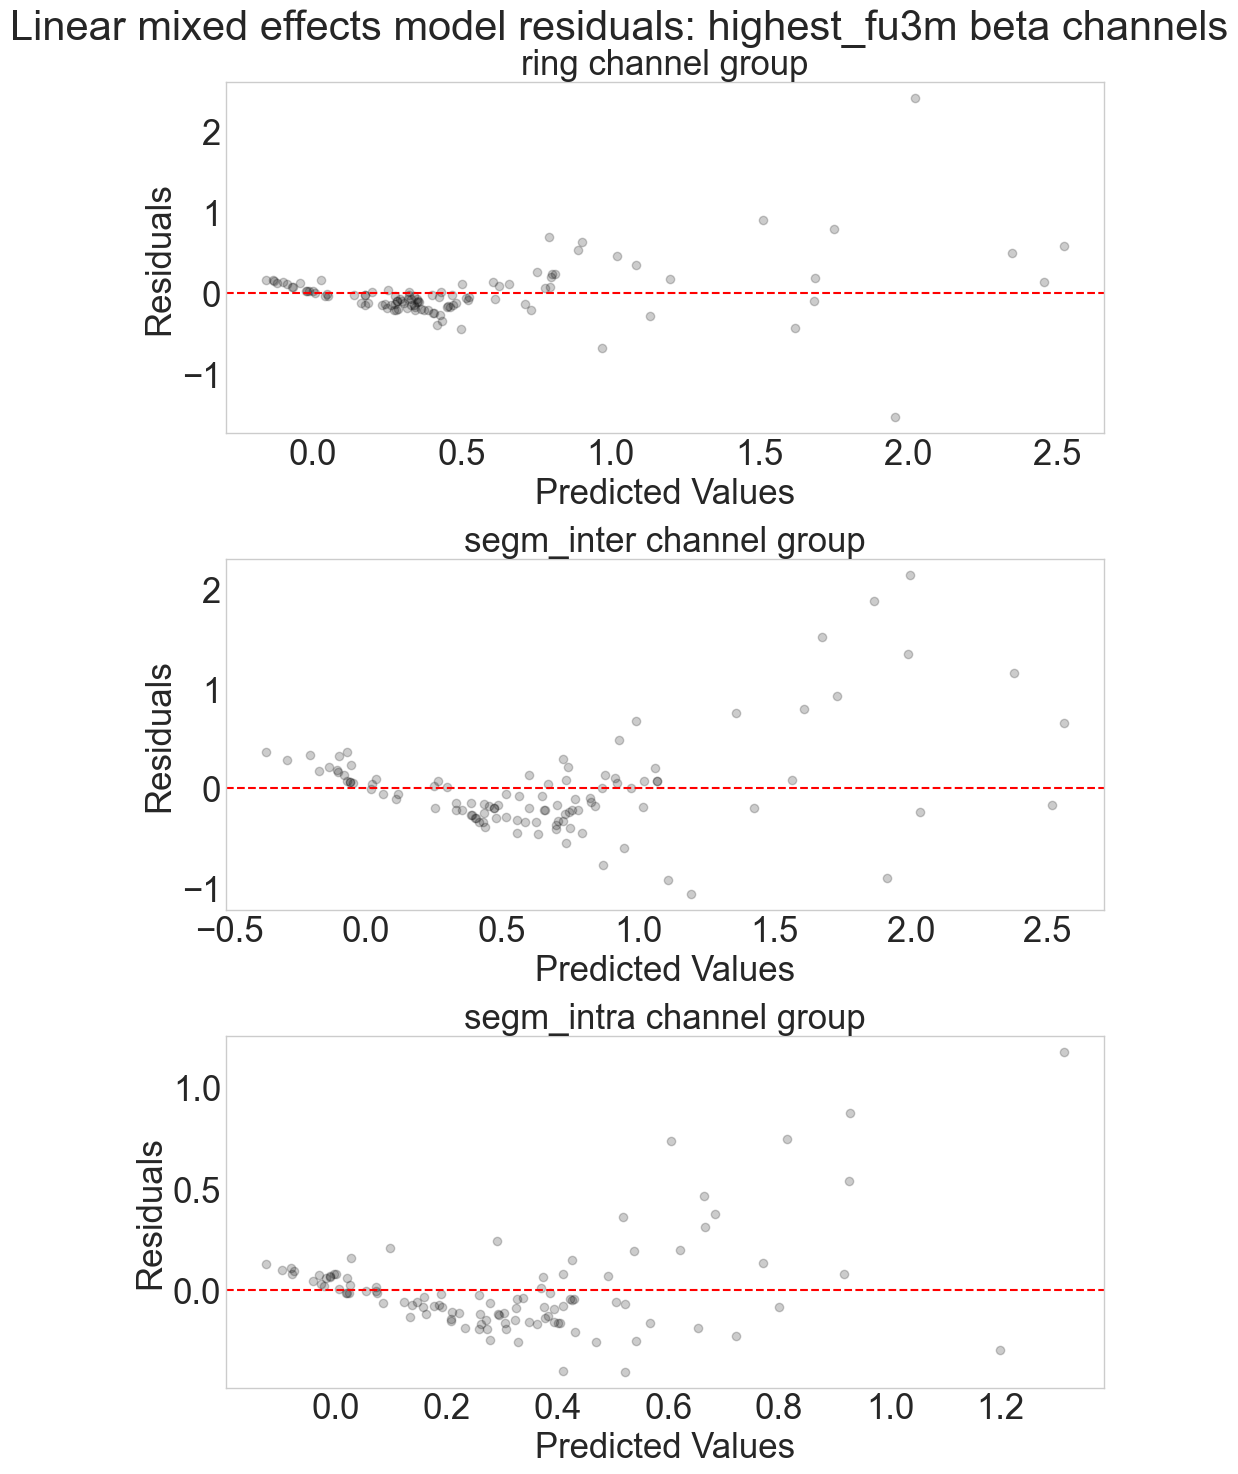

In [62]:
mixedlm_highest_beta_channels = fooof_peaks.fooof_mixedlm_highest_beta_channels(
    fooof_spectrum="periodic_spectrum",
    fooof_version = "v2",
    highest_beta_session="highest_fu3m",
    data_to_fit="beta_average",
    around_cf="around_cf_at_fixed_session",
    incl_sessions=[0,3,12,18],
    shape_of_model="asymptotic"
)


# options for data_to_fit:  "beta_average", "beta_peak_power", "beta_center_frequency", "beta_power_auc", 
#                           "low_beta_center_frequency", "low_beta_power_auc", "high_beta_center_frequency", "high_beta_power_auc"
                               

In [63]:
mixedlm_highest_beta_channels["sample_size_df"]

channel_group session count
ring_0mfu                 ring       0    26
ring_3mfu                 ring       3    42
ring_12mfu                ring      12    24
ring_18mfu                ring      18    14
segm_inter_0mfu     segm_inter       0    26
segm_inter_3mfu     segm_inter       3    42
segm_inter_12mfu    segm_inter      12    24
segm_inter_18mfu    segm_inter      18    14
segm_intra_0mfu     segm_intra       0    26
segm_intra_3mfu     segm_intra       3    42
segm_intra_12mfu    segm_intra      12    24
segm_intra_18mfu    segm_intra      18    14

In [64]:
mixedlm_highest_beta_channels["model_output"]["segm_inter"].summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:             MixedLM  Dependent Variable:  beta_average
No. Observations:  106      Method:              REML        
No. Groups:        42       Scale:               0.3435      
Min. group size:   2        Log-Likelihood:      -123.7712   
Max. group size:   4        Converged:           Yes         
Mean group size:   2.5                                       
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.115    0.152  0.751 0.452 -0.184  0.413
session            -0.028    0.014 -1.981 0.048 -0.055 -0.000
session_asymptotic  1.181    0.233  5.068 0.000  0.724  1.638
Group Var           0.343    0.228                           
=============================================================

"""

In [65]:
mixedlm_highest_beta_channels["model_output"]["segm_intra"].summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:             MixedLM  Dependent Variable:  beta_average
No. Observations:  106      Method:              REML        
No. Groups:        42       Scale:               0.0799      
Min. group size:   2        Log-Likelihood:      -47.9236    
Max. group size:   4        Converged:           Yes         
Mean group size:   2.5                                       
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.080    0.073  1.093 0.274 -0.063  0.222
session            -0.025    0.007 -3.744 0.000 -0.038 -0.012
session_asymptotic  0.640    0.112  5.697 0.000  0.420  0.860
Group Var           0.076    0.114                           
=============================================================

"""

In [66]:
mixedlm_highest_beta_channels["model_output"]["ring"].summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:             MixedLM  Dependent Variable:  beta_average
No. Observations:  106      Method:              REML        
No. Groups:        42       Scale:               0.2048      
Min. group size:   2        Log-Likelihood:      -103.8059   
Max. group size:   4        Converged:           Yes         
Mean group size:   2.5                                       
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.207    0.130  1.596 0.110 -0.047  0.461
session            -0.021    0.011 -1.946 0.052 -0.043  0.000
session_asymptotic  0.715    0.181  3.949 0.000  0.360  1.070
Group Var           0.316    0.251                           
=============================================================

"""

The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to cal

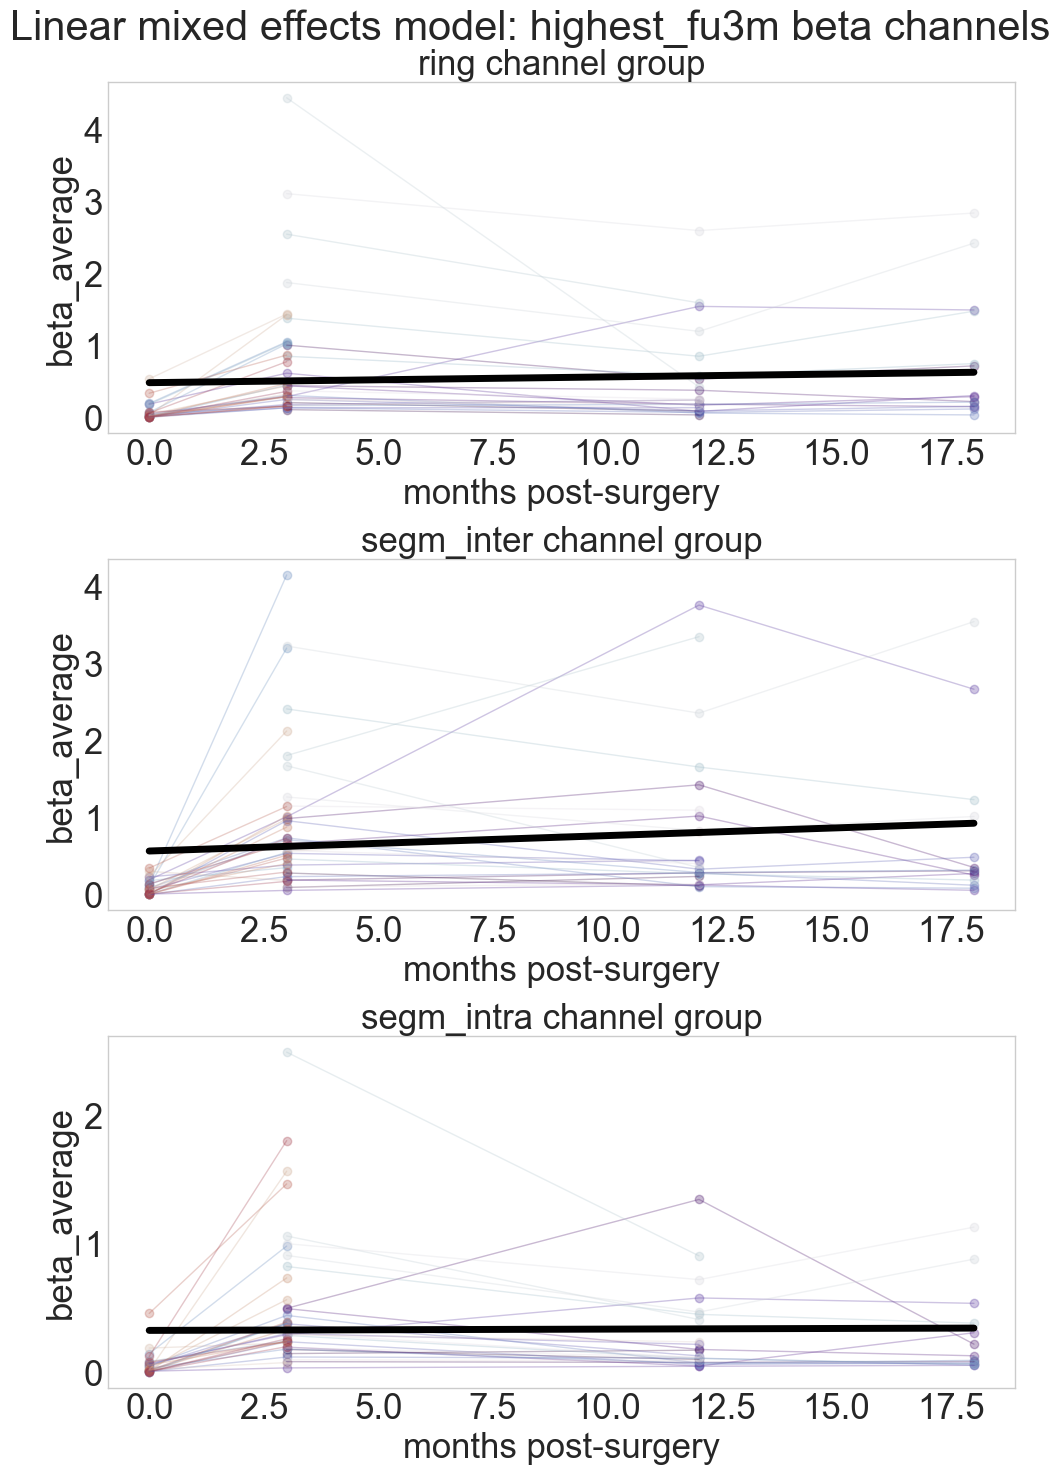

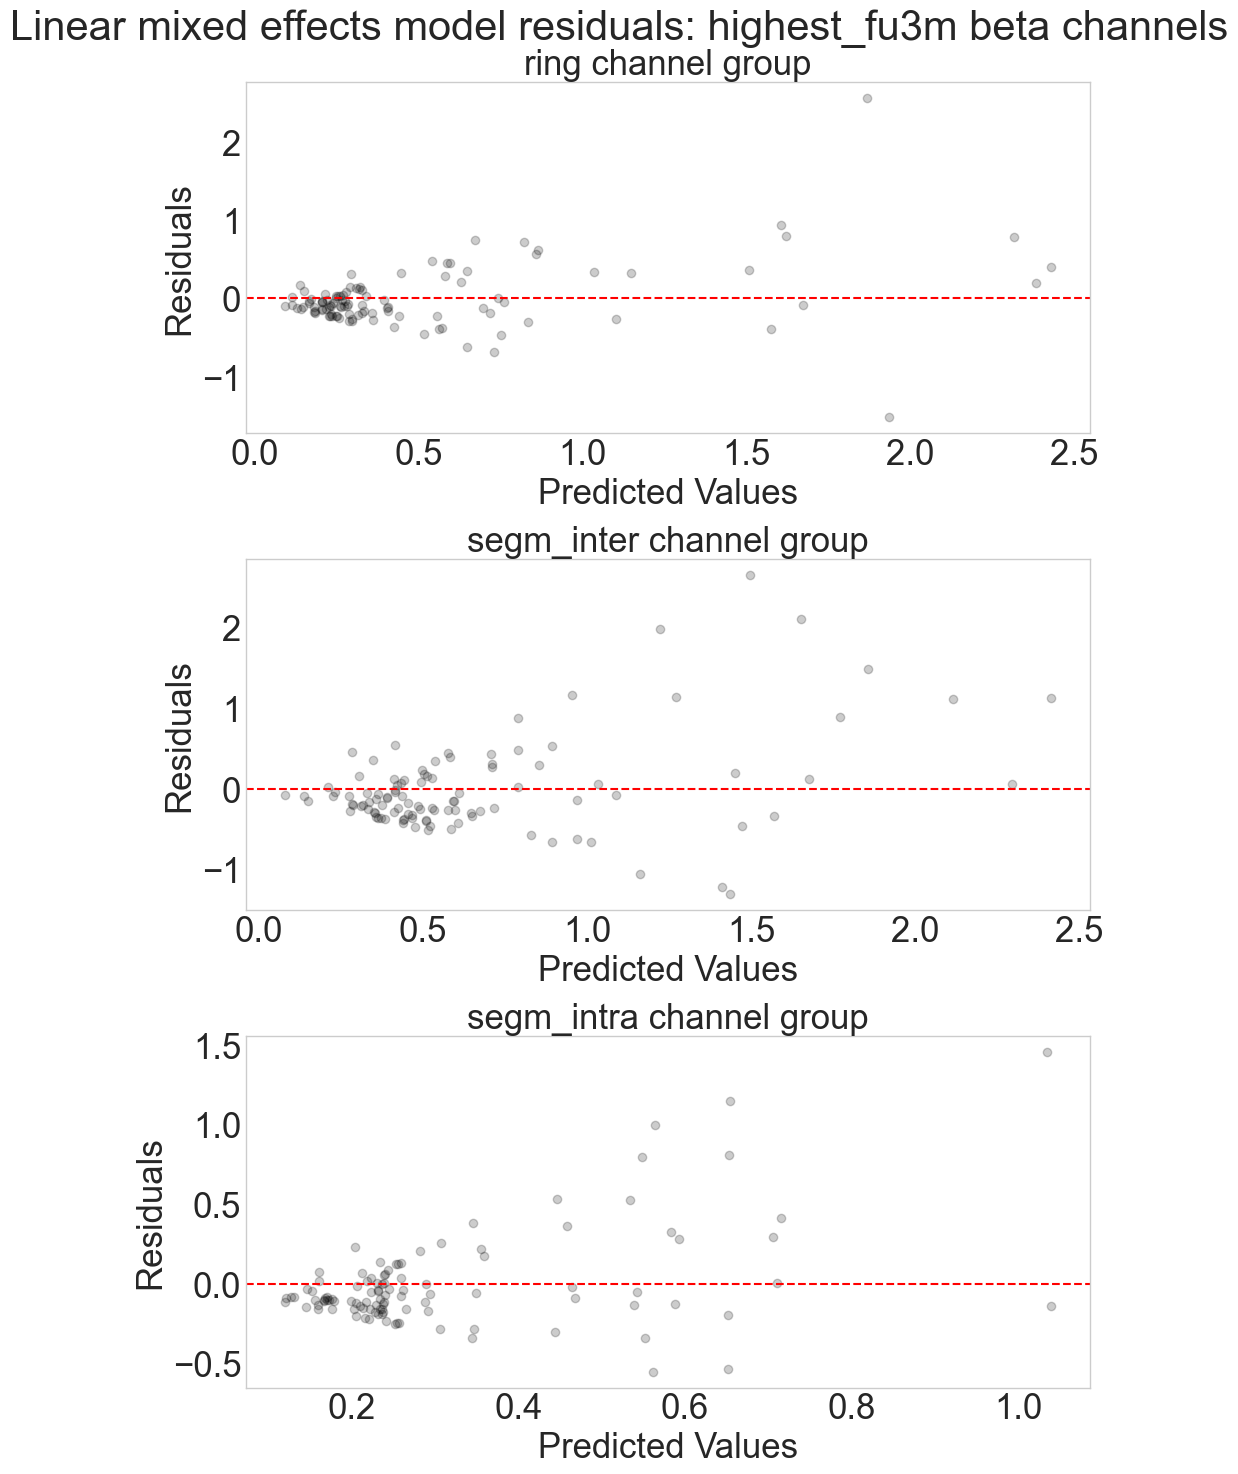

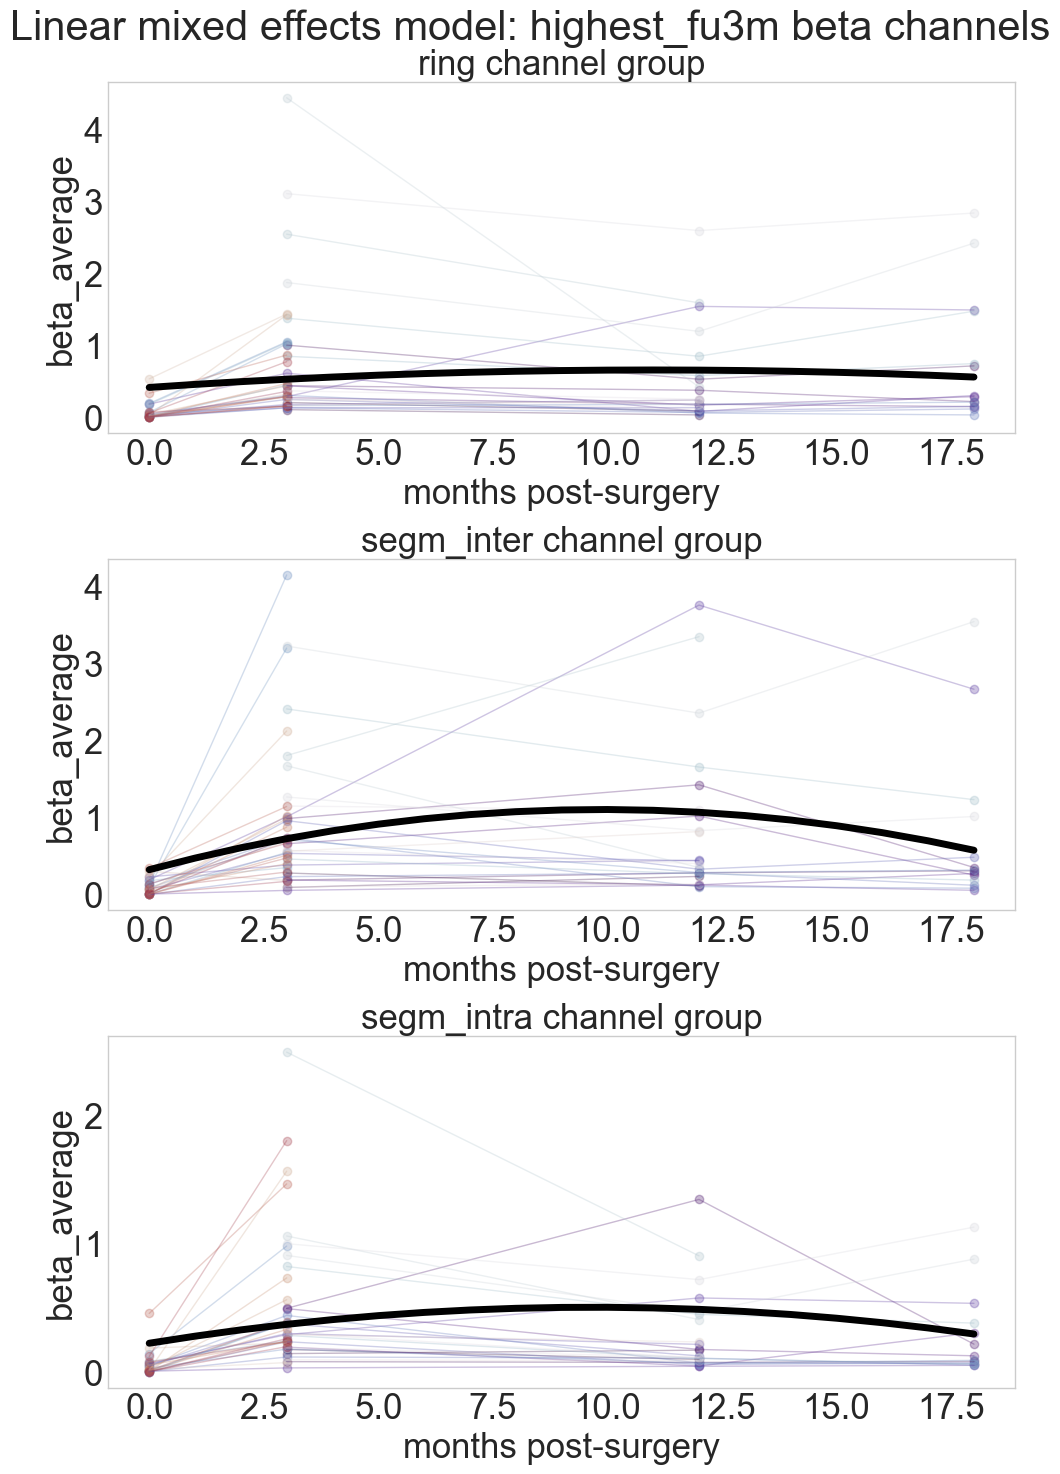

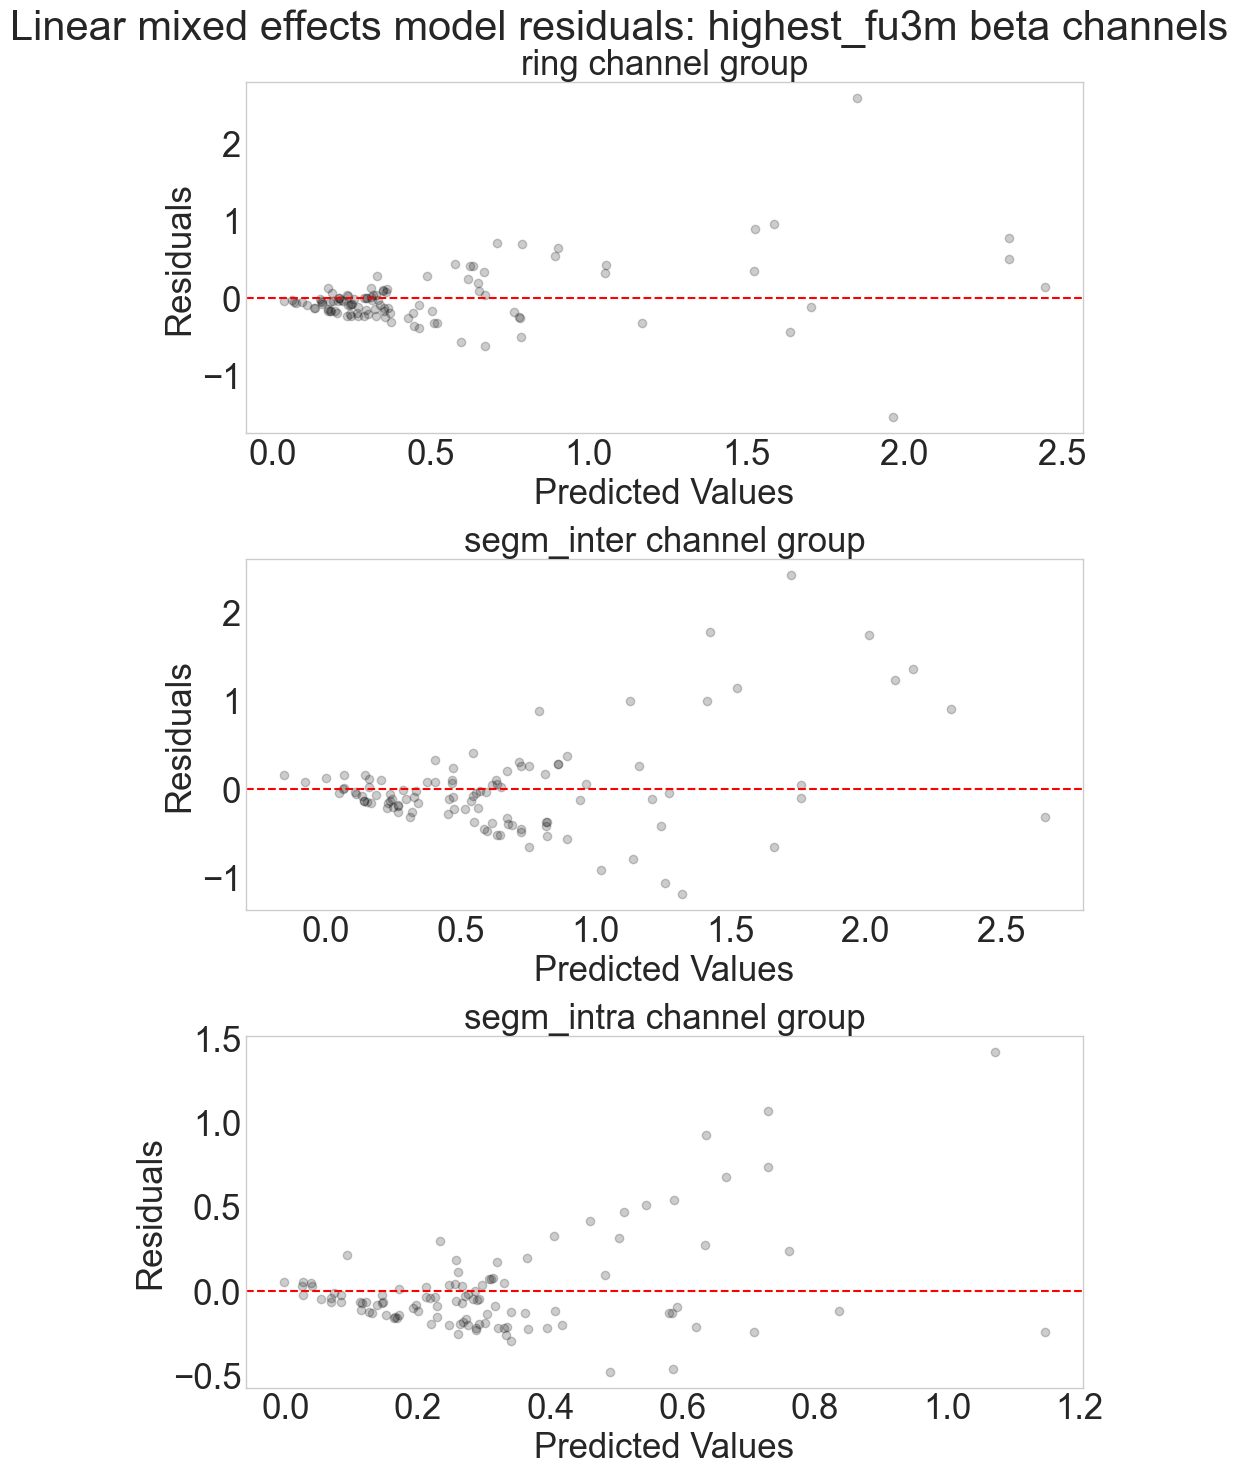

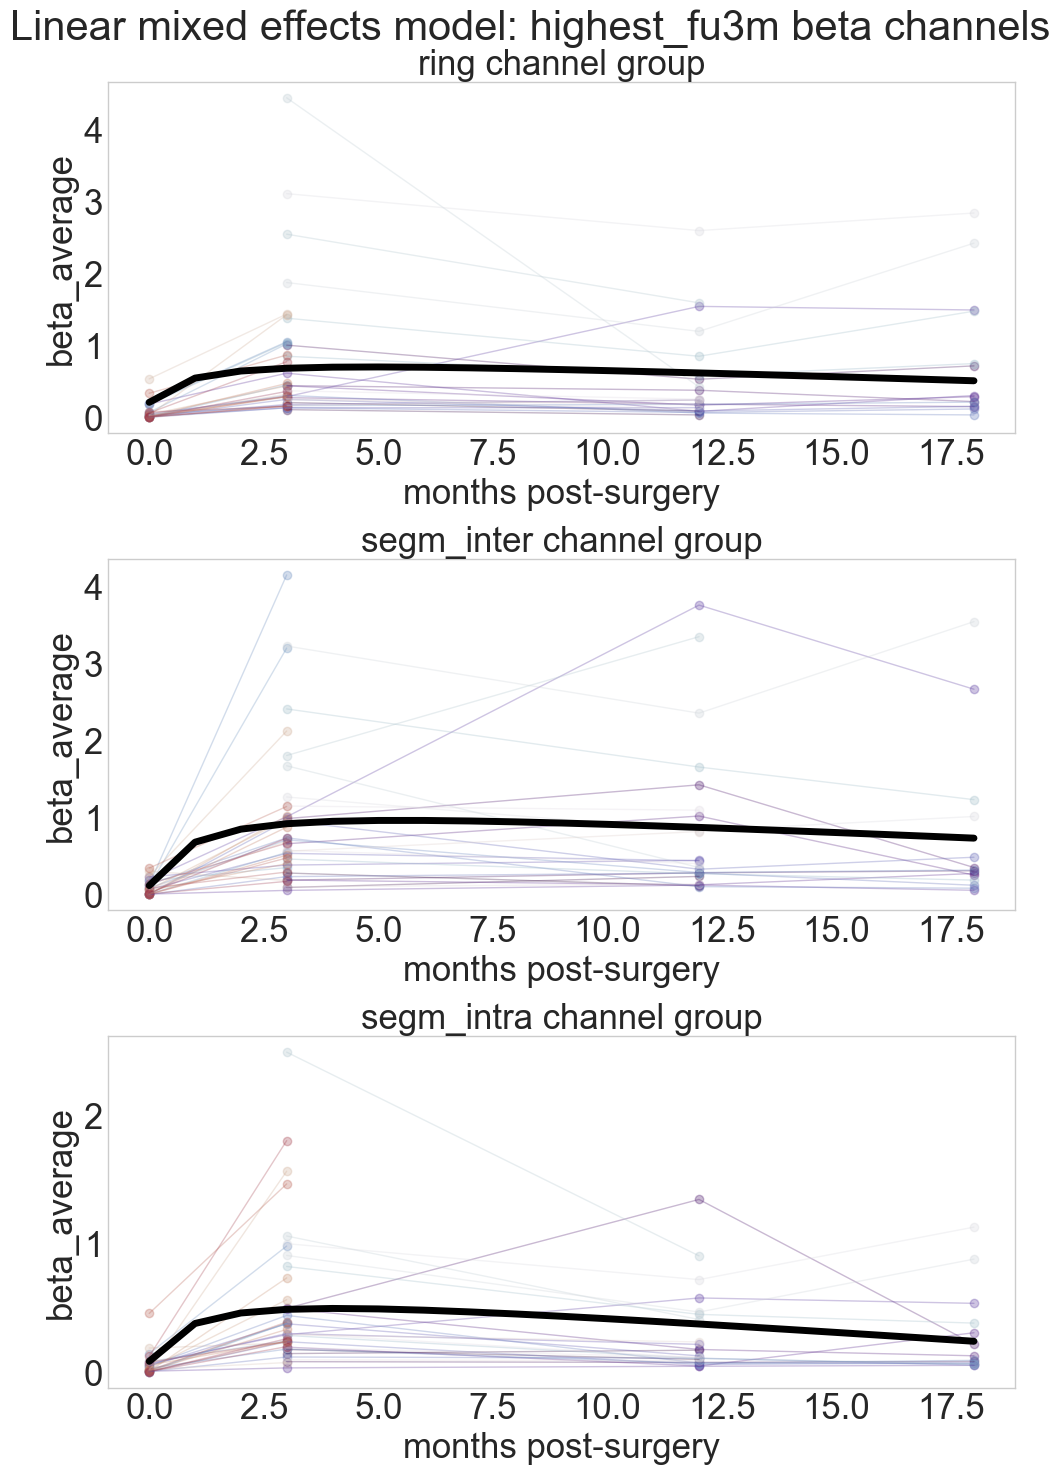

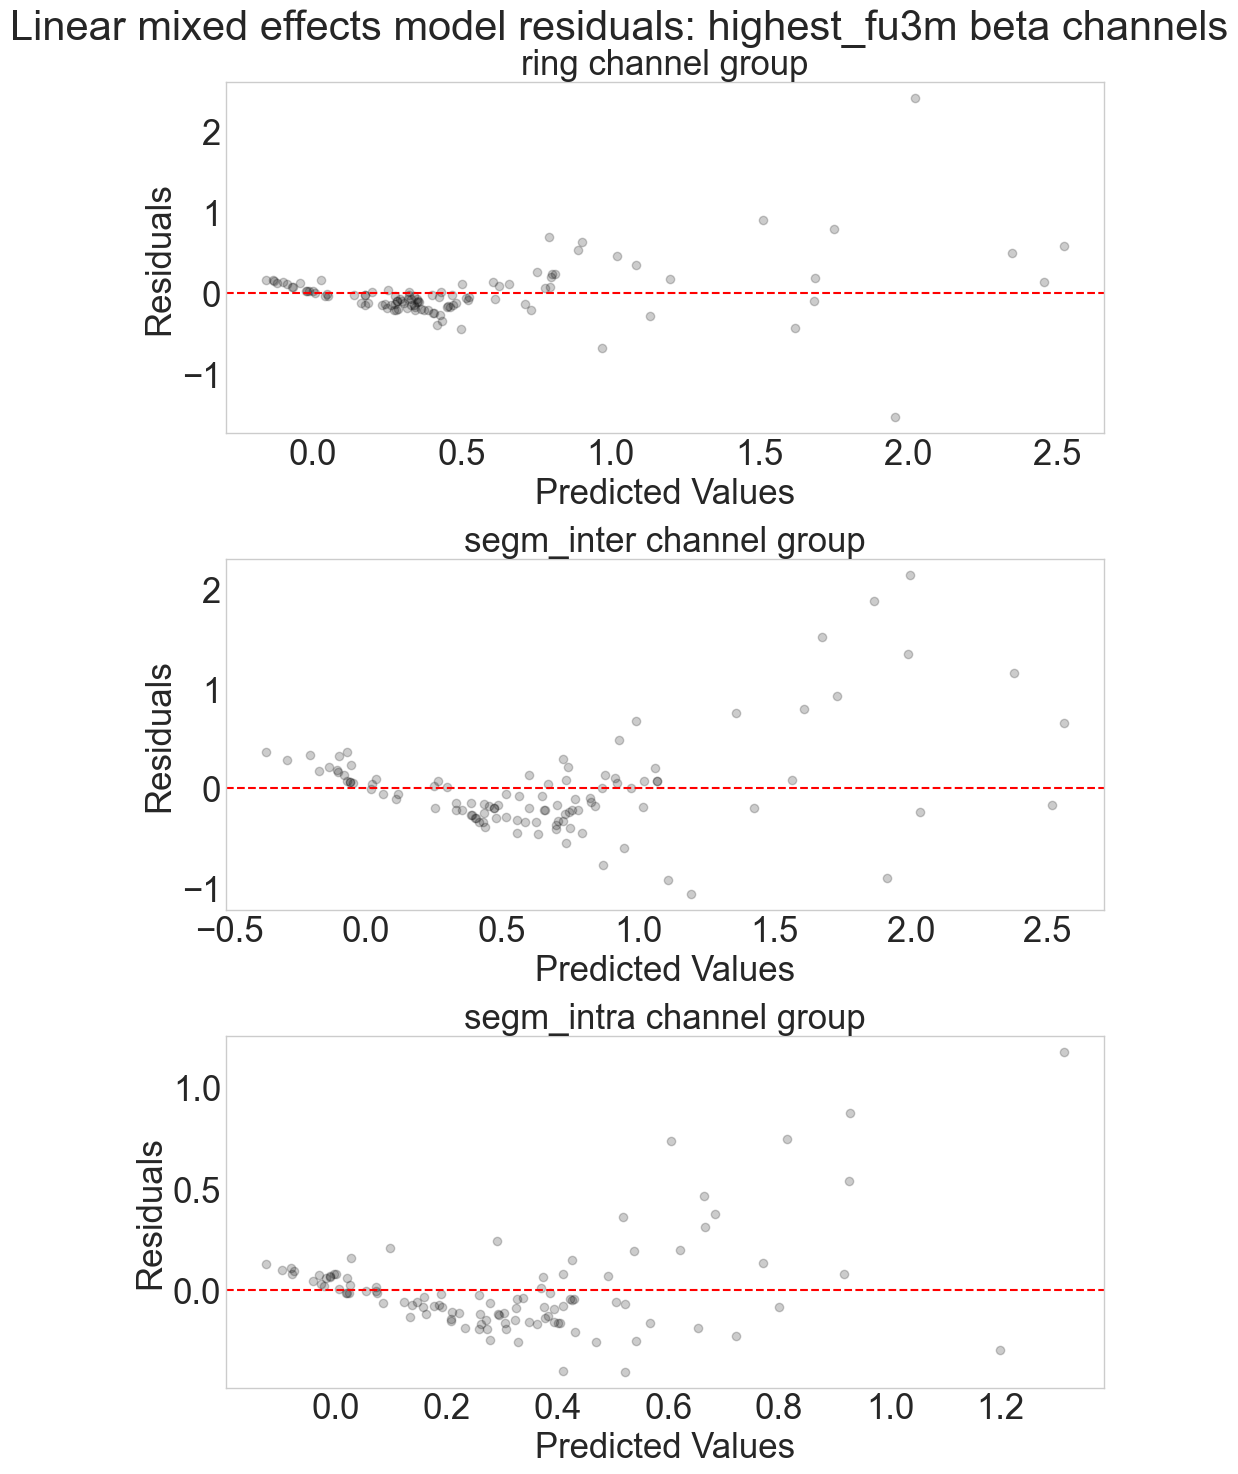

In [60]:
mean_square_error = fooof_peaks.calculate_mean_squared_error(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2",
    highest_beta_session="highest_fu3m",
    data_to_fit="beta_average",
    around_cf="around_cf_at_fixed_session",
)

In [61]:
mean_square_error

model mean_squared_error
straight      straight           0.203086
curved          curved            0.17918
asymptotic  asymptotic           0.144576

In [39]:
dataframe_highest_fu3m = fooof_peaks.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_fu3m"
)

In [40]:
data = dataframe_highest_fu3m["ring"]
data.head()

subject_hemisphere  session bipolar_channel  fooof_error  fooof_r_sq  \
2          017_Right        3              23     0.065806    0.981375   
2          017_Right       12              23     0.066275    0.988890   
2           017_Left        3              23     0.062341    0.985369   
2           017_Left       12              23     0.072735    0.971411   
1          019_Right        3              01     0.118571    0.964737   

   fooof_exponent  fooof_offset  \
2        1.270456      0.586390   
2        1.666388      1.386621   
2        1.450099      0.776517   
2        1.456667      0.832386   
1        1.375863      0.771881   

                                fooof_power_spectrum  \
2  [0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...   
2  [3.07823e-05, 4.01951e-05, 7.86632e-05, 0.0001...   
2  [0.0005356426, 0.0005132144, 0.0007092214, 0.0...   
2  [0.0031519931, 0.0021156252, 0.0021012276, 0.0...   
1  [0.092379458, 0.0548795876, 0.0476712607, 0.04...   

                   periodic_plus_aperiodic_power_log  \
2  [0.5863896016, 0.2039441538, -0.0197720838, -0...   
2  [1.3866220256, 0.8849910955, 0.5915612774, 0.3...   
2  [0.7765555712, 0.3400951925, 0.0848969384, -0....   
2  [0.8325876487, 0.3942568159, 0.138044336, -0.0...   
1  [0.7786128006, 0.3680403549, 0.1310160553, -0....   

                                 fooof_periodic_flat  fooof_number_peaks  \
2  [0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...                   6   
2  [5.489e-07, 2.2749e-06, 8.7498e-06, 3.1231e-05...                   3   
2  [3.89156e-05, 0.0001018683, 0.0002533937, 0.00...                   3   
2  [0.000201318, 0.0003708102, 0.000664577, 0.001...                   5   
1  [0.0067314449, 0.0103350377, 0.0155881895, 0.0...                   2   

              low_beta_peak_CF_power_bandWidth  \
2   [13.548237489, 0.5023866959, 3.5204739565]   
2  [13.7643553255, 0.7651455081, 3.1413367681]   
2                           [None, None, None]   
2           [17.0373287048, 0.1994311471, 2.0]   
1                           [None, None, None]   

              high_beta_peak_CF_power_bandWidth  \
2   [30.7815072507, 1.0756834085, 5.0572149919]   
2   [28.5437425508, 0.9197207901, 5.3777186767]   
2   [30.5042472102, 0.5360314375, 6.3477090961]   
2  [23.8377871274, 0.2515400053, 12.0948067592]   
1           [25.6169613822, 1.5031406057, 15.0]   

                   beta_peak_CF_power_bandWidth  beta_average  beta_rank  \
2   [30.7815072507, 1.0756834085, 5.0572149919]      0.203085        1.0   
2   [28.5437425508, 0.9197207901, 5.3777186767]      0.590499        1.0   
2   [20.3602153227, 0.5534572555, 8.8542380278]      0.110187        1.0   
2  [23.8377871274, 0.2515400053, 12.0948067592]      0.034828        3.0   
1           [25.6169613822, 1.5031406057, 15.0]      1.083783        1.0   

   group  beta_center_frequency  beta_peak_power  beta_band_width  
2      1              30.781507         1.075683         5.057215  
2      1              28.543743         0.919721         5.377719  
2      0              20.360215         0.553457         8.854238  
2      0              23.837787         0.251540        12.094807  
1      3              25.616961         1.503141        15.000000

- for each stn: select the beta center frequency at 3MFU


In [52]:
stn_data = data.loc[data.subject_hemisphere == "019_Right"]
fu3m_data = stn_data.loc[stn_data.session == 3] 

fu3m_cf = round(fu3m_data.beta_center_frequency.values[0])
fu3m_cf

26

In [53]:
f_range = np.arange(fu3m_cf-3, fu3m_cf+4, 1)
f_range

array([23, 24, 25, 26, 27, 28, 29])

## 5. Linear mixed effects model beta average, beta power and beta center frequency of highest peak in beta band 


               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: beta_center_frequency
No. Observations: 98      Method:             REML                 
No. Groups:       40      Scale:              20.7403              
Min. group size:  1       Log-Likelihood:     -299.1268            
Max. group size:  4       Converged:          Yes                  
Mean group size:  2.5                                              
--------------------------------------------------------------------
                     Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept            23.128     1.077  21.481  0.000  21.018  25.238
session               0.238     0.117   2.037  0.042   0.009   0.466
session_asymptotic   -2.997     1.866  -1.606  0.108  -6.654   0.661
Group Var             8.293     1.078                               

               Mixed Linear Model Regression Results
Mo

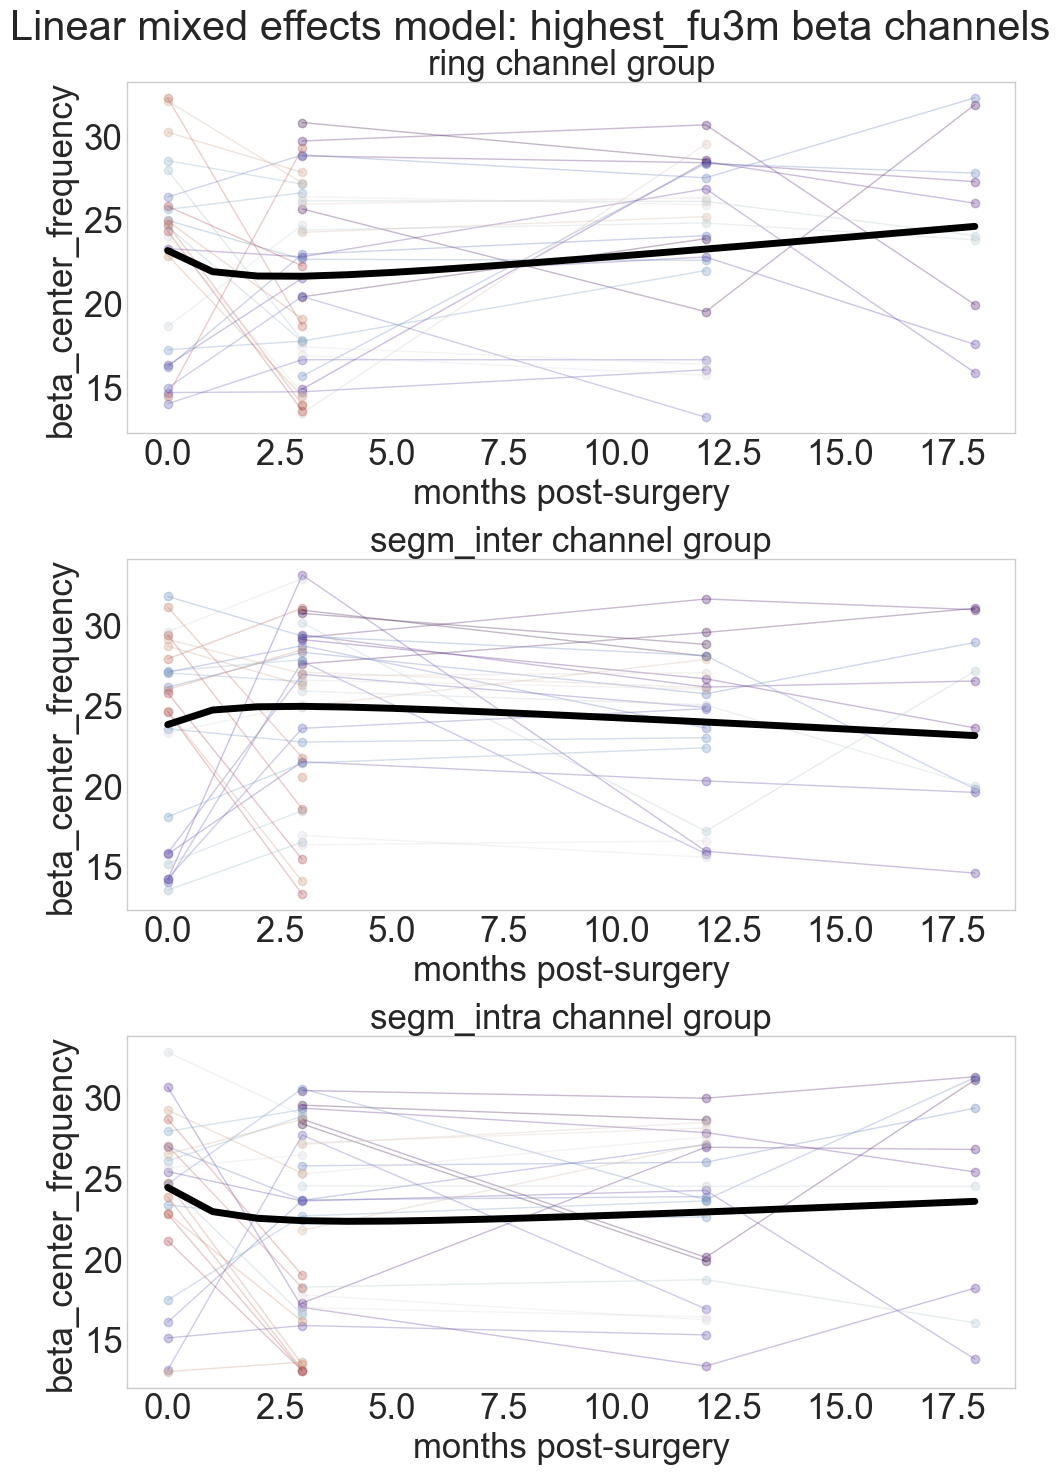

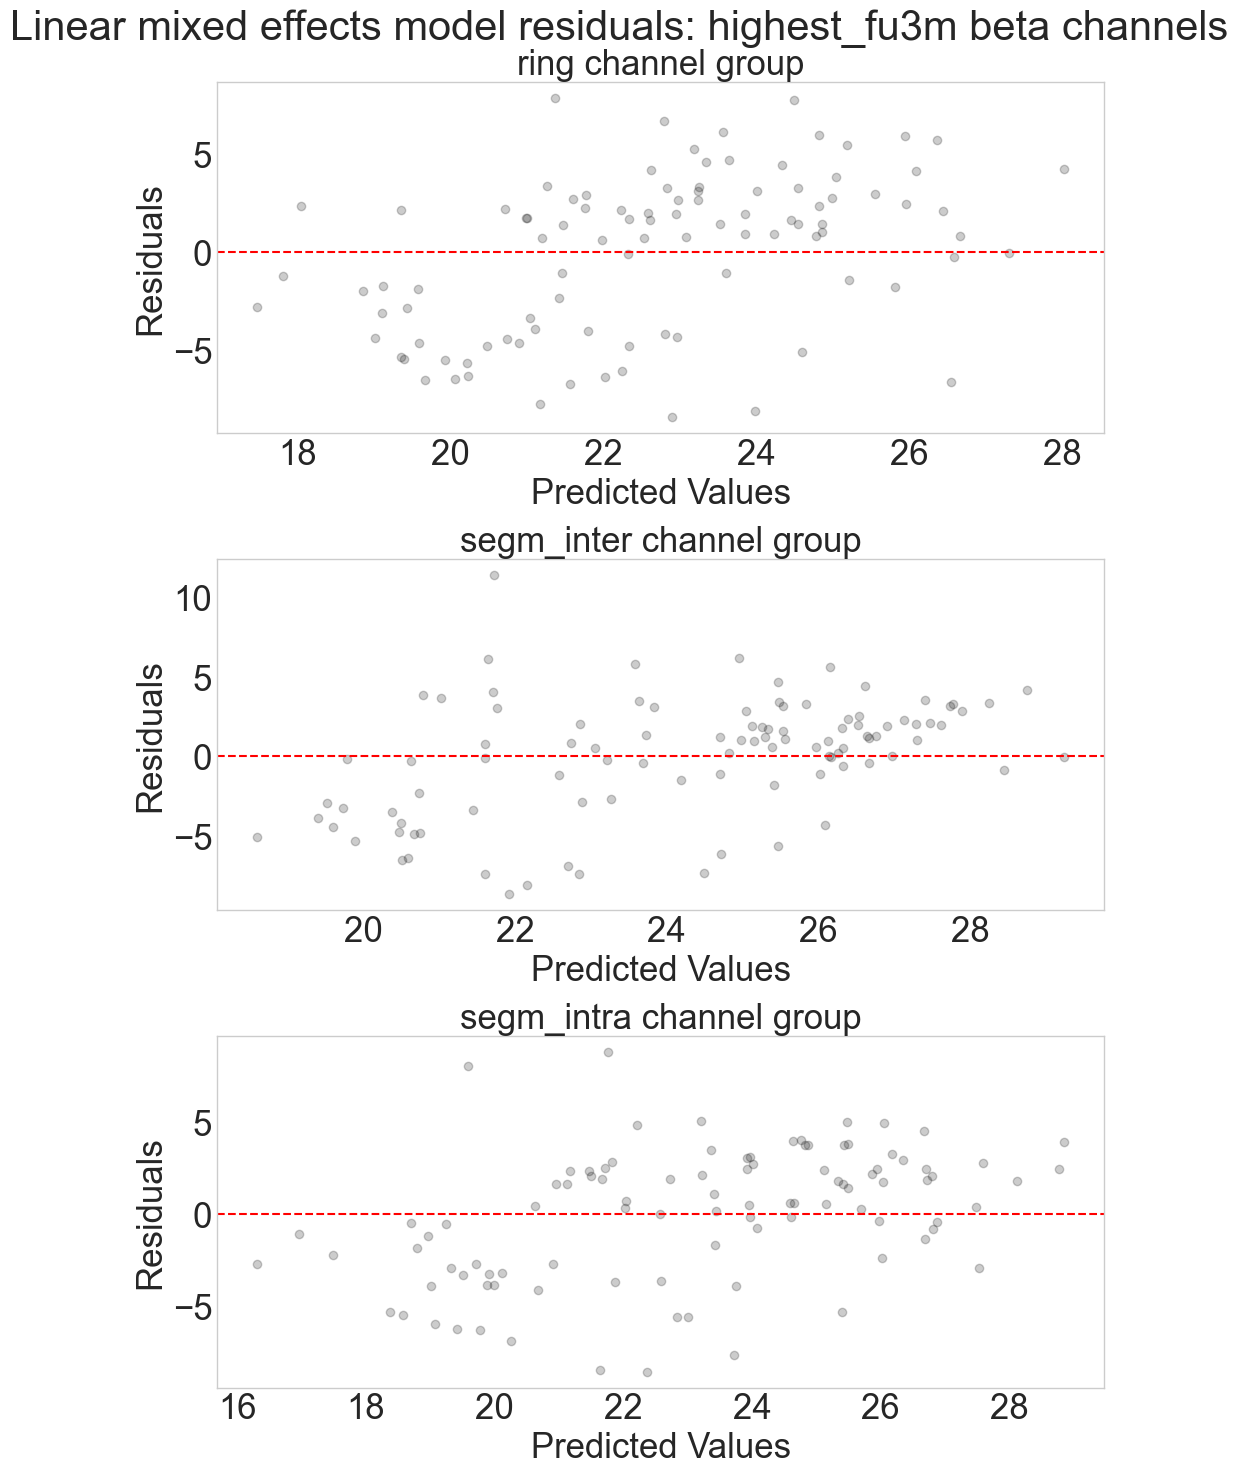

In [7]:
lme_highest_beta_channels = fooof_peaks.fooof_mixedlm_highest_beta_channels(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_fu3m",
    data_to_fit="beta_center_frequency",
    incl_sessions=[0,3,12,18],
    shape_of_model="asymptotic"
)

In [14]:
data = lme_highest_beta_channels["group_dict"]["ring"]
data.head()

subject_hemisphere  session bipolar_channel  fooof_error  fooof_r_sq  \
2          017_Right        3              23     0.065806    0.981375   
2          017_Right       12              23     0.066275    0.988890   
2           017_Left        3              23     0.062341    0.985369   
2           017_Left       12              23     0.072735    0.971411   
1          019_Right        3              01     0.118571    0.964737   

   fooof_exponent  fooof_offset  \
2        1.270456      0.586390   
2        1.666388      1.386621   
2        1.450099      0.776517   
2        1.456667      0.832386   
1        1.375863      0.771881   

                                fooof_power_spectrum  \
2  [0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...   
2  [3.07823e-05, 4.01951e-05, 7.86631e-05, 0.0001...   
2  [0.0005356426, 0.0005132144, 0.0007092213, 0.0...   
2  [0.0031519929, 0.0021156251, 0.0021012275, 0.0...   
1  [0.0923794569, 0.054879587, 0.0476712602, 0.04...   

                   periodic_plus_aperiodic_power_log  \
2  [0.5863896015, 0.2039441538, -0.0197720839, -0...   
2  [1.3866220259, 0.8849910957, 0.5915612775, 0.3...   
2  [0.7765555729, 0.3400951939, 0.0848969397, -0....   
2  [0.8325876477, 0.394256815, 0.1380443353, -0.0...   
1  [0.7786127993, 0.3680403538, 0.1310160544, -0....   

                                 fooof_periodic_flat  ...  \
2  [0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...  ...   
2  [5.489e-07, 2.2749e-06, 8.7498e-06, 3.12309e-0...  ...   
2  [3.89156e-05, 0.0001018683, 0.0002533937, 0.00...  ...   
2  [0.000201318, 0.0003708101, 0.000664577, 0.001...  ...   
1  [0.0067314448, 0.0103350377, 0.0155881893, 0.0...  ...   

             low_beta_peak_CF_power_bandWidth  \
2  [13.5482374907, 0.502386695, 3.5204739647]   
2  [13.7643553382, 0.765145508, 3.1413368111]   
2                          [None, None, None]   
2          [17.0373285162, 0.1994311476, 2.0]   
1                          [None, None, None]   

             high_beta_peak_CF_power_bandWidth  \
2   [30.781507243, 1.0756834082, 5.0572150049]   
2  [28.5437425103, 0.9197207902, 5.3777187276]   
2  [30.5042472052, 0.5360314355, 6.3477090908]   
2  [23.8377871295, 0.251540007, 12.0948067095]   
1          [25.6169614017, 1.5031406049, 15.0]   

                  beta_peak_CF_power_bandWidth beta_average  beta_rank  group  \
2   [30.781507243, 1.0756834082, 5.0572150049]     0.203085        1.0      1   
2  [28.5437425103, 0.9197207902, 5.3777187276]     0.590499        1.0      1   
2  [20.3602153291, 0.5534572531, 8.8542380202]     0.110187        1.0      0   
2  [23.8377871295, 0.251540007, 12.0948067095]     0.034828        3.0      0   
1          [25.6169614017, 1.5031406049, 15.0]     1.083783        1.0      3   

   beta_center_frequency  beta_peak_power  beta_band_width  predictions  
2              30.781507         1.075683         5.057215     0.447183  
2              28.543743         0.919721         5.377719     0.391259  
2              20.360215         0.553457         8.854238     0.145709  
2              23.837787         0.251540        12.094807     0.089785  
1              25.616961         1.503141        15.000000     0.818636  

[5 rows x 21 columns]

In [18]:
result = lme_highest_beta_channels["sample_size_df"]
result

channel_group session count
ring_0mfu                 ring       0    24
ring_3mfu                 ring       3    40
ring_12mfu                ring      12    24
ring_18mfu                ring      18    10
segm_inter_0mfu     segm_inter       0    25
segm_inter_3mfu     segm_inter       3    40
segm_inter_12mfu    segm_inter      12    24
segm_inter_18mfu    segm_inter      18    10
segm_intra_0mfu     segm_intra       0    24
segm_intra_3mfu     segm_intra       3    40
segm_intra_12mfu    segm_intra      12    24
segm_intra_18mfu    segm_intra      18    10

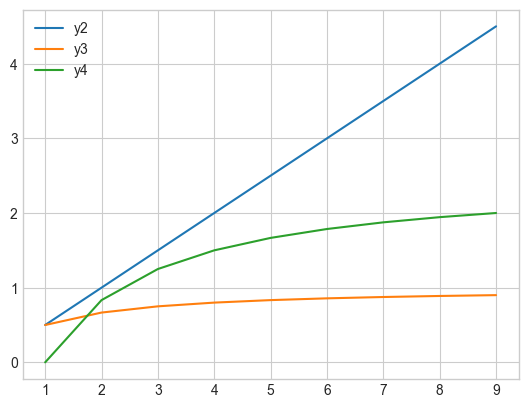

In [94]:
x = np.arange(1,10)
y1 = np.arange(1,10)

y2 = x*0.5 # slope
y3 = x/(1+x)
y4 = (x/(1+x)) * 5 - 2.5
y5 = np.log(1+x)/(1+np.log(1+x))

#plt.plot(x,y1)
plt.plot(x,y2,label="y2")
plt.plot(x,y3,label="y3")
plt.plot(x,y4,label="y4")

plt.legend()

Load the result

In [28]:
lme_result = loadResults.load_fooof_lme_model_result(
    highest_beta_session="highest_fu3m",
    data_to_fit="beta_center_frequency",
    incl_sessions=[0,3,12,18],
    shape_of_model="straight"
)

In [31]:
lme_result["segm_intra"].summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:            MixedLM Dependent Variable: beta_center_frequency
No. Observations: 94      Method:             REML                 
No. Groups:       38      Scale:              19.2201              
Min. group size:  1       Log-Likelihood:     -290.5792            
Max. group size:  4       Converged:          Yes                  
Mean group size:  2.5                                              
----------------------------------------------------------------------
             Coef.     Std.Err.      z       P>|z|    [0.025    0.975]
----------------------------------------------------------------------
Intercept    23.083       0.885    26.087    0.000    21.349    24.818
session      -0.026       0.087    -0.297    0.767    -0.196     0.144
Group Var    12.930       1.494                                       
===================================================================

"""

## 5. CHANGE of beta peak center frequency and power between sessions

In [94]:
auc_data = fooof_peaks.calculate_auc_beta_power(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2",
    highest_beta_session="highest_fu3m",
    around_cf = "around_cf_at_fixed_session"
)

data = auc_data["ring"]

The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of sess

In [96]:
data.head()

subject_hemisphere  session bipolar_channel  fooof_error  fooof_r_sq  \
2          017_Right        3              23     0.065806    0.981375   
2          017_Right       12              23     0.066275    0.988890   
2           017_Left        3              23     0.062341    0.985369   
2           017_Left       12              23     0.072735    0.971411   
1          019_Right        3              01     0.118571    0.964737   

   fooof_exponent  fooof_offset  \
2        1.270456      0.586390   
2        1.666388      1.386621   
2        1.450099      0.776517   
2        1.456667      0.832386   
1        1.375863      0.771881   

                                fooof_power_spectrum  \
2  [0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...   
2  [3.07823e-05, 4.01951e-05, 7.86632e-05, 0.0001...   
2  [0.0005356426, 0.0005132144, 0.0007092214, 0.0...   
2  [0.0031519931, 0.0021156252, 0.0021012276, 0.0...   
1  [0.092379458, 0.0548795876, 0.0476712607, 0.04...   

                   periodic_plus_aperiodic_power_log  \
2  [0.5863896016, 0.2039441538, -0.0197720838, -0...   
2  [1.3866220256, 0.8849910955, 0.5915612774, 0.3...   
2  [0.7765555712, 0.3400951925, 0.0848969384, -0....   
2  [0.8325876487, 0.3942568159, 0.138044336, -0.0...   
1  [0.7786128006, 0.3680403549, 0.1310160553, -0....   

                                 fooof_periodic_flat  ...  \
2  [0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...  ...   
2  [5.489e-07, 2.2749e-06, 8.7498e-06, 3.1231e-05...  ...   
2  [3.89156e-05, 0.0001018683, 0.0002533937, 0.00...  ...   
2  [0.000201318, 0.0003708102, 0.000664577, 0.001...  ...   
1  [0.0067314449, 0.0103350377, 0.0155881895, 0.0...  ...   

   low_beta_band_width high_beta_center_frequency high_beta_peak_power  \
2             3.520474                  30.781507             1.075683   
2             3.141337                  28.543743             0.919721   
2                  NaN                  30.504247             0.536031   
2             2.000000                  23.837787             0.251540   
1                  NaN                  25.616961             1.503141   

  high_beta_band_width  round_beta_cf  beta_power_auc  round_low_beta_cf  \
2             5.057215             31        2.009554               14.0   
2             5.377719             31        1.150962               14.0   
2             6.347709             20        1.031252                NaN   
2            12.094807             20        0.324668                NaN   
1            15.000000             26       10.795864                NaN   

   low_beta_power_auc  round_high_beta_cf  high_beta_power_auc  
2            1.012715                31.0             2.009554  
2            5.706790                31.0             1.150962  
2                 NaN                31.0             0.443662  
2                 NaN                31.0             0.075158  
1                 NaN                26.0            10.795864  

[5 rows x 32 columns]

The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
no low beta peak
no low beta peak
no low beta peak
no low beta peak
no low beta peak
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to calculate AUC
The center frequency of session 3 was taken for every session to cal

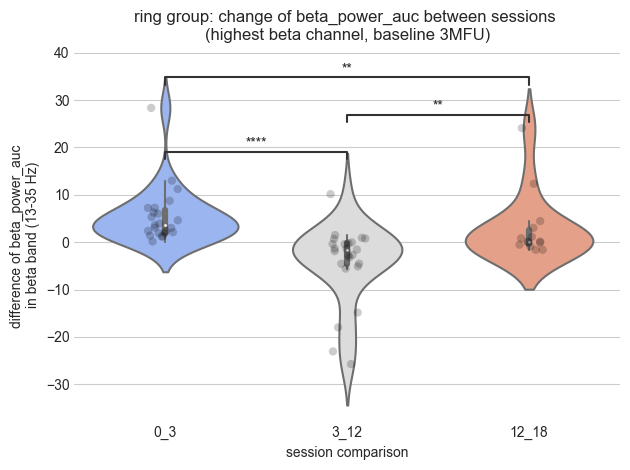

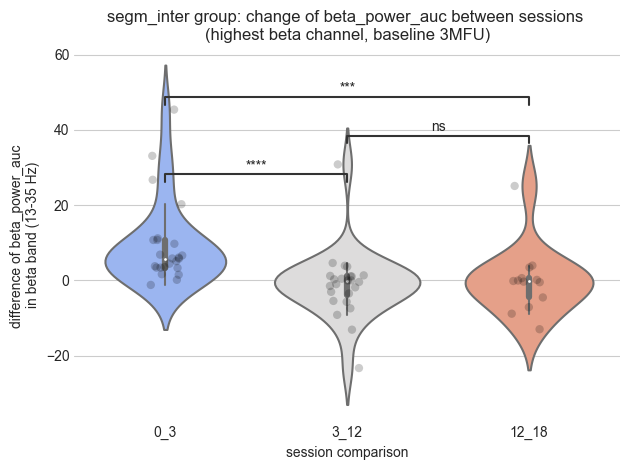

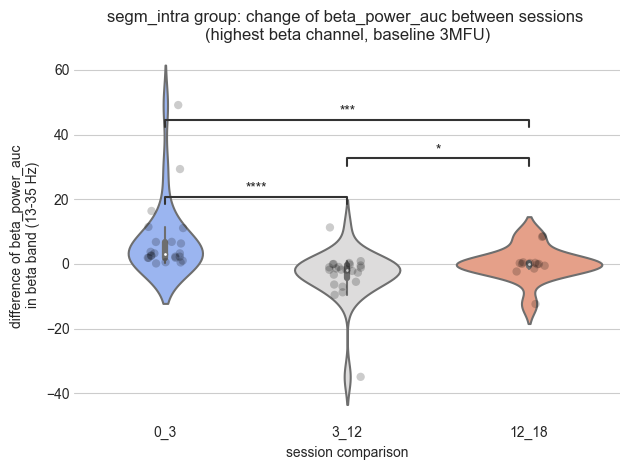

In [3]:
difference_data = fooof_peaks.change_beta_peak_power_or_cf_violinplot(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2",
    highest_beta_session="highest_fu3m",
    data_to_analyze="beta_power_auc",
    around_cf="around_cf_at_fixed_session",
    absolute_change="no",
    session_comparisons=["0_3", "3_12", "12_18"]
)


In [68]:
difference_data["description_results"]


number_observations  \
ring_1                        26   
ring_2                        24   
ring_3                        14   
segm_inter_1                  26   
segm_inter_2                  24   
segm_inter_3                  14   
segm_intra_1                  26   
segm_intra_2                  24   
segm_intra_3                  14   

                                               min_and_max      mean  \
ring_1         (-1.3950090443782603, -0.07586221173043478) -0.426471   
ring_2            (-1.2520015923652172, 4.010240219213044)  0.331483   
ring_3          (-1.2236085334130438, 0.15715495364347815) -0.189766   
segm_inter_1      (-4.014064022634782, 0.1182520265869565)  -0.79323   
segm_inter_2       (-2.744759103230434, 1.318650558026087)  0.000499   
segm_inter_3     (-1.1867512244869571, 1.0906508420217382)  0.139376   
segm_intra_1  (-1.6803237333652175, -0.025671744947826085) -0.414432   
segm_intra_2     (-0.8479215453173914, 1.5868650246347826)  0.175748   
segm_intra_3     (-0.4121298332913045, 1.1271548647956522)  0.018332   

              variance  skewness   kurtosis  standard_deviation  
ring_1        0.107796 -1.299478   1.085241            0.328322  
ring_2        0.771226  3.002826  11.470586            0.878195  
ring_3        0.123390 -2.029522   3.541659            0.351269  
segm_inter_1  0.836166 -2.362974   5.245916            0.914421  
segm_inter_2  0.637909 -1.782459   4.446584            0.798692  
segm_inter_3  0.335305 -0.199527   0.578204            0.579055  
segm_intra_1  0.181299 -1.862266   2.687606            0.425792  
segm_intra_2  0.168276  1.126036   5.289068            0.410215  
segm_intra_3  0.129549  2.027584   4.824428            0.359929

In [69]:
difference_data["statistics_dataframe"]

channel_group statistics_pair mann_whitney_u_stats     p_val
ring_(1, 2)                ring          (1, 2)                 25.0       0.0
ring_(1, 3)                ring          (1, 3)                 75.0  0.002528
ring_(2, 3)                ring          (2, 3)                293.0  0.000165
segm_inter_(1, 2)    segm_inter          (1, 2)                 83.0  0.000009
segm_inter_(1, 3)    segm_inter          (1, 3)                 38.0  0.000047
segm_inter_(2, 3)    segm_inter          (2, 3)                161.0  0.844063
segm_intra_(1, 2)    segm_intra          (1, 2)                 38.0       0.0
segm_intra_(1, 3)    segm_intra          (1, 3)                 54.0    0.0003
segm_intra_(2, 3)    segm_intra          (2, 3)                255.0  0.008855

## 4. Ordinary least squares Model for continuous predictor and non-linear relationship, NOT MIXED LM

                            OLS Regression Results                            
Dep. Variable:        beta_peak_power   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.772
Date:                Sat, 24 Jun 2023   Prob (F-statistic):              0.176
Time:                        11:32:47   Log-Likelihood:                -58.340
No. Observations:                  98   AIC:                             122.7
Df Residuals:                      95   BIC:                             130.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8716      0.079     11.100      0.0

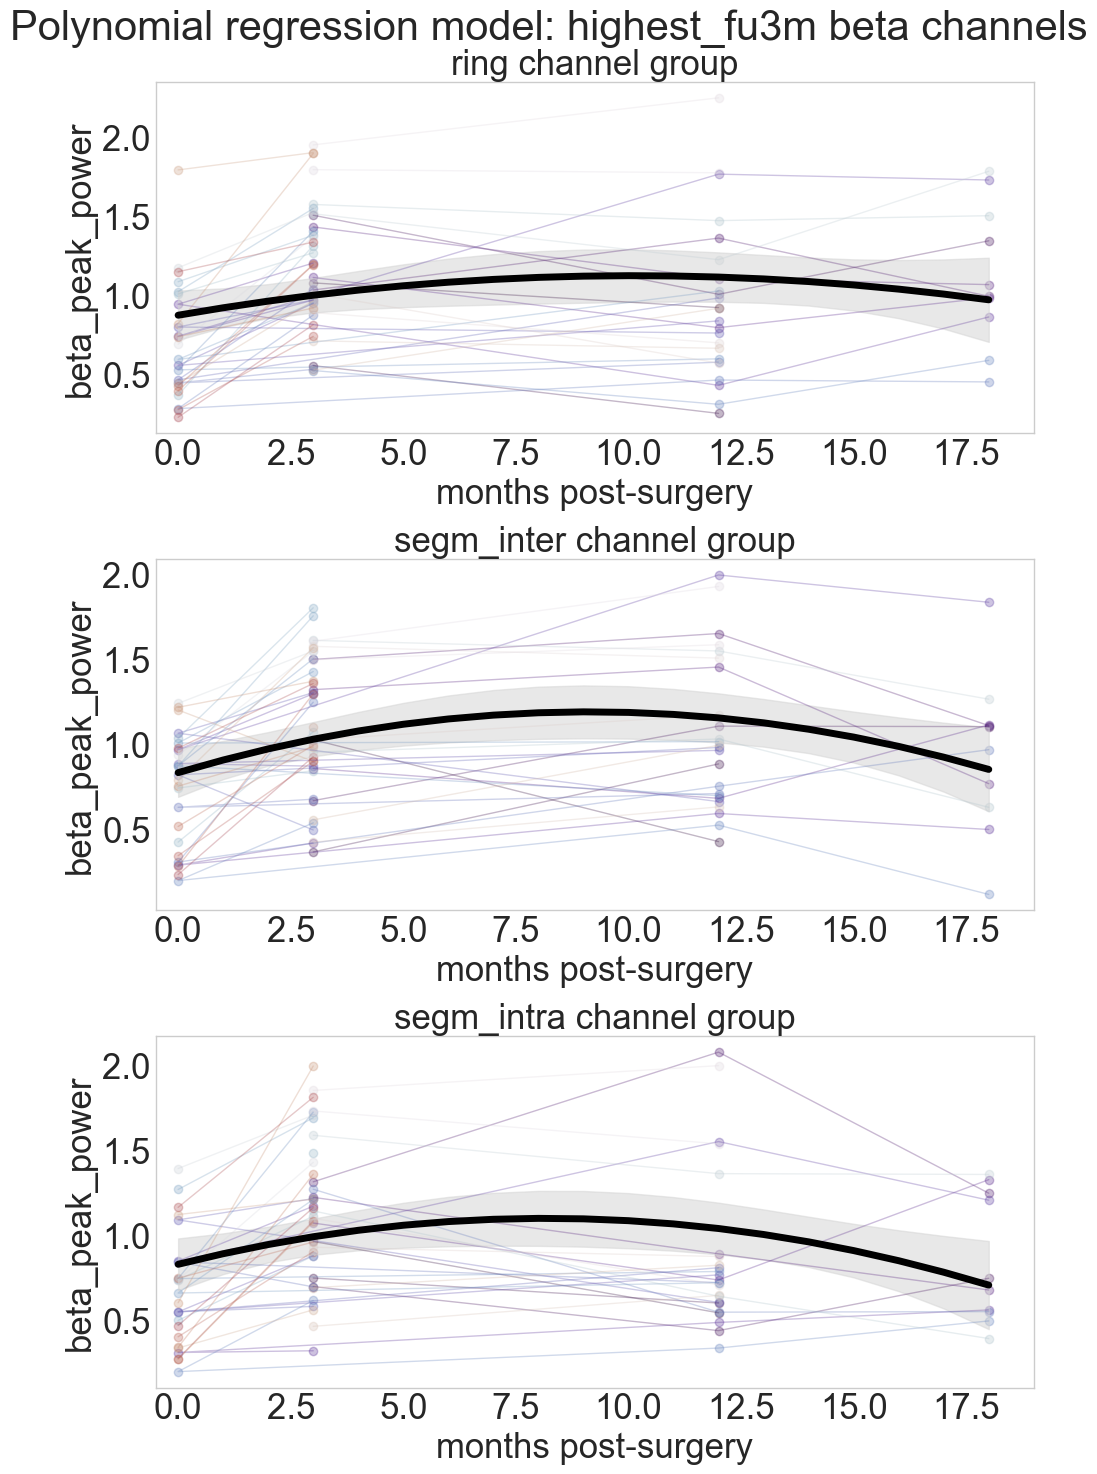

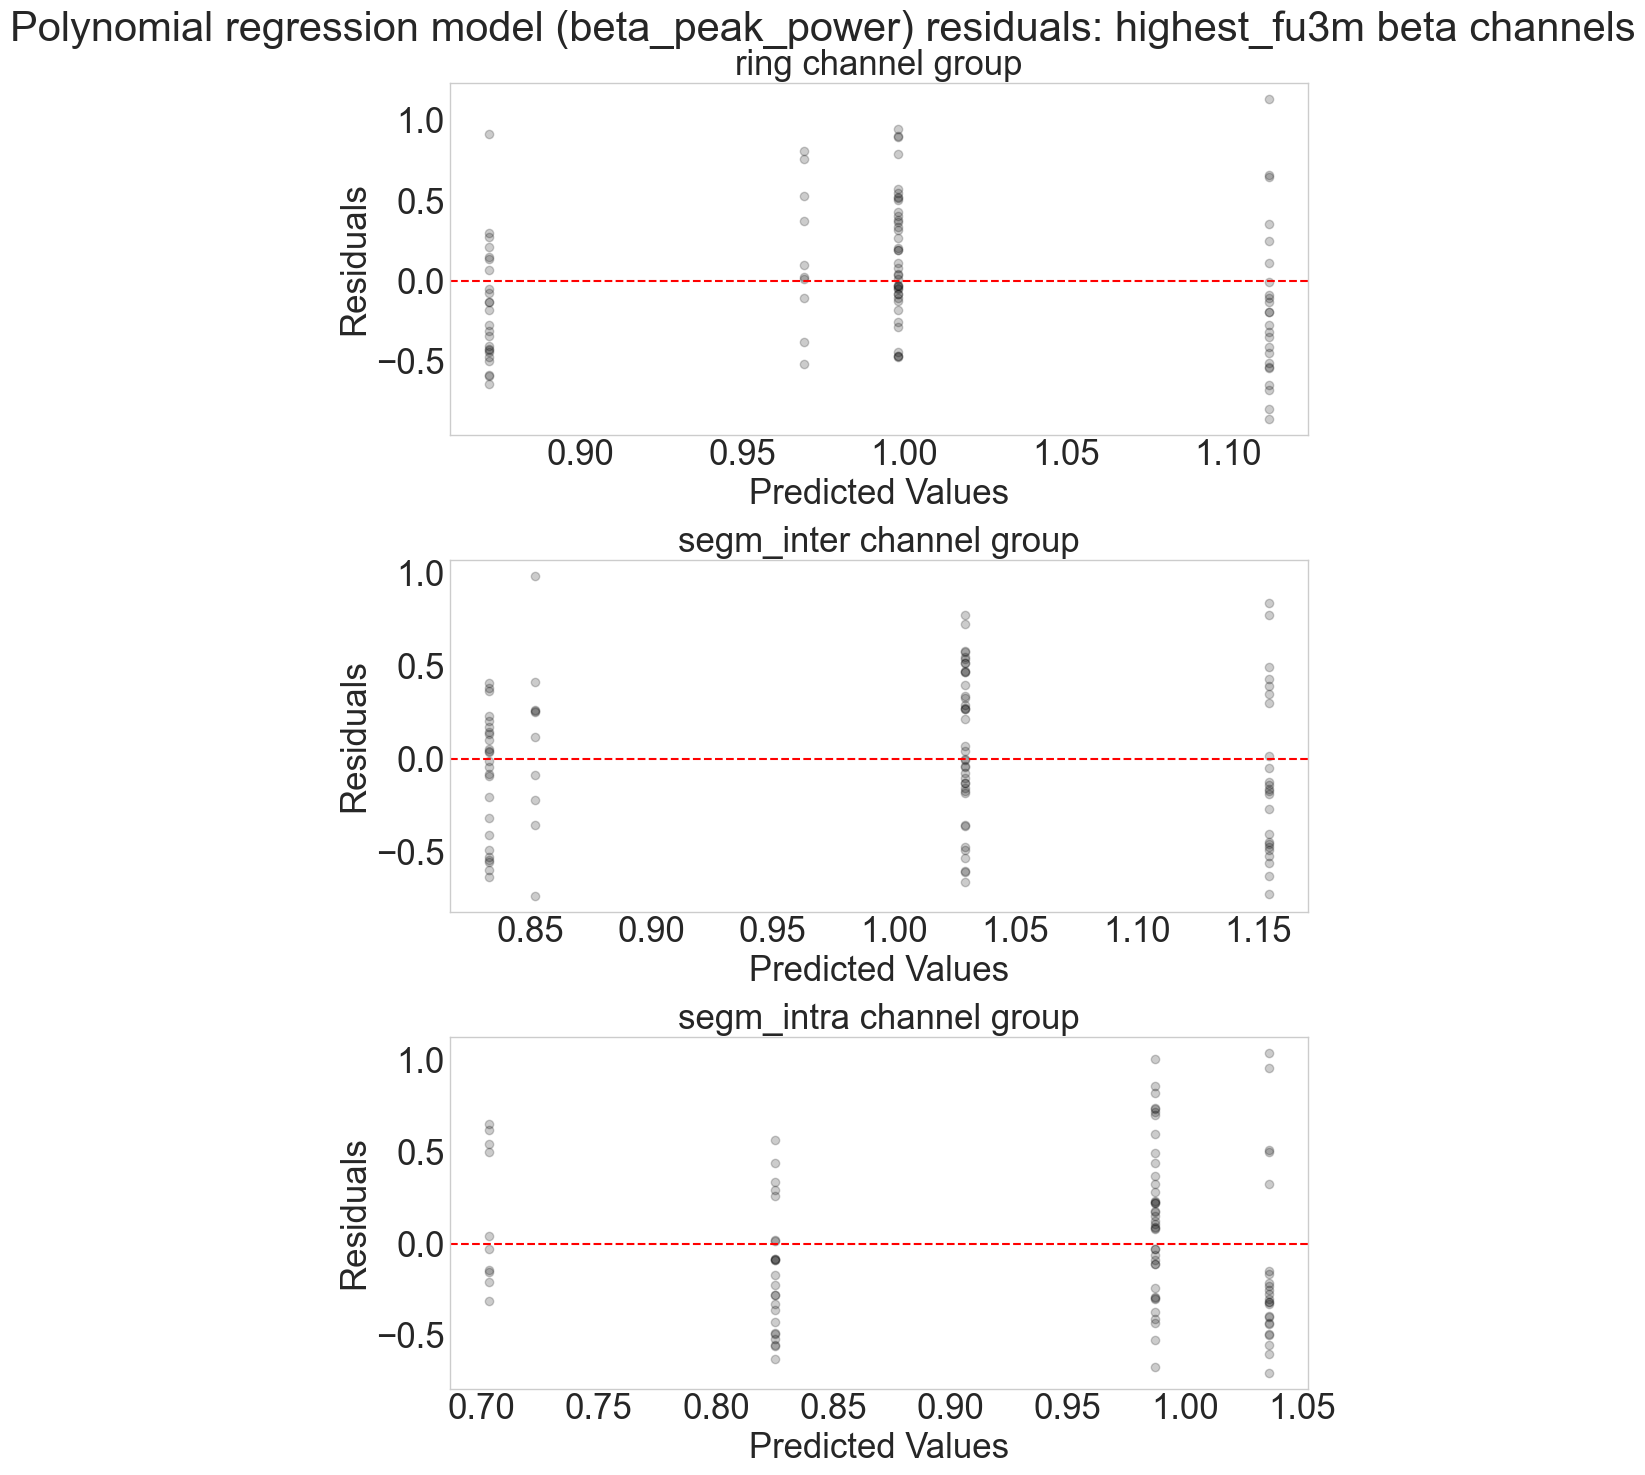

In [45]:
ols_highest_beta_channels = fooof_fit.fooof_ploynomial_regression_model_highest_beta_channels(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_fu3m",
    data_to_fit="beta_peak_power",
    incl_sessions=[0,3,12,18]
)

In [51]:
ols_highest_beta_channels["mdf_result"]["ring"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           beta_average   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.549
Date:                Thu, 01 Jun 2023   Prob (F-statistic):             0.0837
Time:                        09:33:44   Log-Likelihood:                -90.085
No. Observations:                  94   AIC:                             186.2
Df Residuals:                      91   BIC:                             193.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3258      0.114      2.864      0.005       0.100       0.552
x1             0.0933      0.042      2.221      0.029       0.010       0.177
x2            -0.0050      0.002     -2.037      0.045      -0.010      -0.000
==============================================================================
Omnibus:                       52.932   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.606
Skew:                           2.048   Prob(JB):                     7.28e-34
Kurtosis:                       7.710   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
mdf = ols_highest_beta_channels["mdf_result"]["segm_inter"]
x=np.arange(0,19)
x=sm.add_constant(np.column_stack([x, x**2]))
pred = mdf.get_prediction(x)
y_pred = pred.predicted_mean

In [122]:
y_pred

array([0.47126539, 0.61964554, 0.75010696, 0.86264966, 0.95727363,
       1.03397888, 1.09276539, 1.13363319, 1.15658225, 1.16161259,
       1.1487242 , 1.11791709, 1.06919125, 1.00254668, 0.91798339,
       0.81550137, 0.69510062, 0.55678115, 0.40054295])

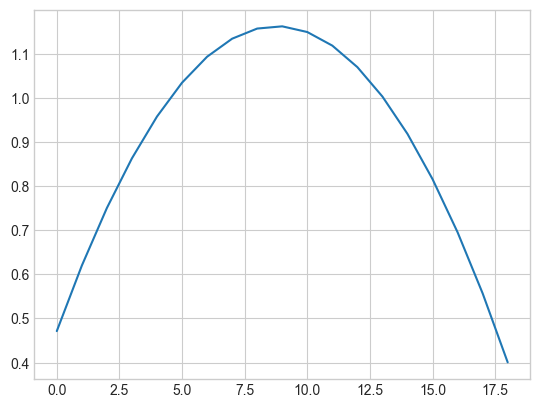

In [123]:
plt.plot(np.arange(0,19), y_pred)

Text(0.5, 1.0, 'Residuals vs. Predicted Values')

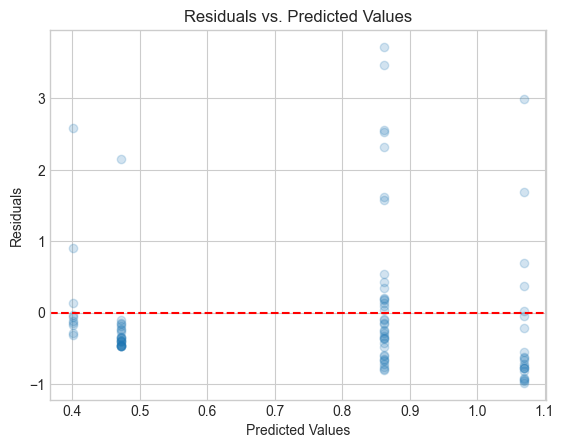

In [136]:
residuals = mdf.resid
predicted_values = mdf.fittedvalues

plt.scatter(predicted_values, residuals, alpha=0.2)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

In [128]:
residuals

0   -0.591668
0   -0.951327
0   -0.765008
0   -0.814440
0   -0.654018
0   -0.741432
0   -0.057862
0    0.131916
0    0.379469
0   -0.029809
0   -0.109845
0   -0.053266
0   -0.141319
2   -0.675343
2   -0.950266
2   -0.112092
2   -0.794616
2   -0.464653
2   -0.915786
2   -0.313858
0    0.178790
0   -0.275467
0    2.997479
0    2.581680
0   -0.351466
0   -0.247864
0   -0.553955
0   -0.287088
0   -0.356161
0   -0.615649
0   -0.806809
0   -0.439418
0   -0.631676
0   -0.714666
0   -0.399296
0   -0.982568
0    0.096448
0   -0.467932
0   -0.719654
0    0.135033
0   -0.612395
0   -0.467451
0   -0.769073
0   -0.282560
1   -0.086364
1   -0.342258
1   -0.928016
1   -0.162486
1   -0.381229
1   -0.772937
2    3.469383
2   -0.346105
2    2.553223
2   -0.358878
1   -0.236665
1   -0.457855
2   -0.488031
2   -0.225742
1   -0.375240
1   -0.775009
1   -0.171930
0    1.615338
0    0.695538
0    0.904356
0    3.723494
0    2.151699
1    2.313336
1   -0.145902
1    2.536659
1    1.687425
2    0.428472
2   -0

In [83]:
pred.predicted_mean

array([0.42311702, 0.41575697, 0.42311702, 0.41575697, 0.42311702,
       0.41575697, 0.05267131, 0.42311702, 0.41575697, 0.05267131,
       0.42311702, 0.41575697, 0.05267131, 0.42311702, 0.41575697,
       0.05267131, 0.42311702, 0.28229878, 0.41575697, 0.05267131,
       0.42311702, 0.28229878, 0.41575697, 0.05267131, 0.42311702,
       0.28229878, 0.41575697, 0.42311702, 0.28229878, 0.41575697,
       0.42311702, 0.28229878, 0.41575697, 0.42311702, 0.28229878,
       0.41575697, 0.42311702, 0.41575697, 0.05267131, 0.42311702,
       0.28229878, 0.41575697, 0.05267131, 0.42311702, 0.28229878,
       0.41575697, 0.42311702, 0.28229878, 0.41575697, 0.42311702,
       0.28229878, 0.42311702, 0.28229878, 0.42311702, 0.42311702,
       0.28229878, 0.42311702, 0.41575697, 0.05267131, 0.42311702,
       0.41575697, 0.05267131, 0.42311702, 0.28229878, 0.42311702,
       0.28229878, 0.42311702, 0.41575697, 0.42311702, 0.41575697,
       0.42311702, 0.41575697, 0.42311702, 0.41575697, 0.42311

In [93]:
mdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           beta_average   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.501
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0876
Time:                        20:17:16   Log-Likelihood:                -68.189
No. Observations:                  94   AIC:                             142.4
Df Residuals:                      91   BIC:                             150.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2823      0.090      3.132      0.002       0.103       0.461
x1             0.0589      0.033      1.770      0.080      -0.007       0.125
x2            -0.0040      0.002     -2.065      0.042      -0.008      -0.000
==============================================================================
Omnibus:                       81.341   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.290
Skew:                           2.917   Prob(JB):                    2.85e-113
Kurtosis:                      12.914   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
ols_highest_beta_channels["x"]

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  18., 324.]])

In [73]:
ols_highest_beta_channels["predictor_polynomial"]

array([[  1.,   3.,   9.],
       [  1.,  12., 144.],
       [  1.,   3.,   9.],
       [  1.,  12., 144.],
       [  1.,   3.,   9.],
       [  1.,  12., 144.],
       [  1.,  18., 324.],
       [  1.,   3.,   9.],
       [  1.,  12., 144.],
       [  1.,  18., 324.],
       [  1.,   3.,   9.],
       [  1.,  12., 144.],
       [  1.,  18., 324.],
       [  1.,   3.,   9.],
       [  1.,  12., 144.],
       [  1.,  18., 324.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,  18., 324.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,  18., 324.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,   3.,   9.],
 

In [64]:
ols_highest_beta_channels["ypredict"]

array([0.28229878, 0.33719772, 0.38413714, 0.42311702, 0.45413736,
       0.47719818, 0.49229946, 0.49944121, 0.49862343, 0.48984611,
       0.47310927, 0.44841289, 0.41575697, 0.37514153, 0.32656655,
       0.27003204, 0.20553799, 0.13308441, 0.05267131])

In [38]:
result = ols_highest_beta_channels["mdf_result"]["segm_intra"]
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           beta_average   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.501
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0876
Time:                        18:26:17   Log-Likelihood:                -68.189
No. Observations:                  94   AIC:                             142.4
Df Residuals:                      91   BIC:                             150.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2823      0.090      3.132      0.002       0.103       0.461
x1             0.0589      0.033      1.770      0.080      -0.007       0.125
x2            -0.0040      0.002     -2.065      0.042      -0.008      -0.000
==============================================================================
Omnibus:                       81.341   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.290
Skew:                           2.917   Prob(JB):                    2.85e-113
Kurtosis:                      12.914   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
table_1 = result.tables[0]
table_1.data

[['Dep. Variable:', 'beta_average', '  R-squared:         ', '   0.053'],
 ['Model:', 'OLS', '  Adj. R-squared:    ', '   0.032'],
 ['Method:', 'Least Squares', '  F-statistic:       ', '   2.549'],
 ['Date:', 'Wed, 31 May 2023', '  Prob (F-statistic):', '0.0837'],
 ['Time:', '17:10:22', '  Log-Likelihood:    ', ' -90.085'],
 ['No. Observations:', '    94', '  AIC:               ', '   186.2'],
 ['Df Residuals:', '    91', '  BIC:               ', '   193.8'],
 ['Df Model:', '     2', '                     ', ' '],
 ['Covariance Type:', 'nonrobust', '                     ', ' ']]

## 5. How many channels have a double Peak in Beta Band?

In [8]:
fooof_group_result = loadResults.load_group_fooof_result()

In [9]:
fooof_group_result.head()

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
0          017_Right    fu3m              03     0.067918    0.984748   
1          017_Right    fu3m              13     0.065586    0.981937   
2          017_Right    fu3m              02     0.103924    0.967577   
3          017_Right    fu3m              12     0.075776    0.975321   
4          017_Right    fu3m              01     0.064701    0.983808   

   fooof_exponent  fooof_offset  \
0        1.604428      1.193436   
1        1.434853      0.962182   
2        1.543910      1.189600   
3        1.304337      0.703128   
4        1.540660      1.072680   

                                fooof_power_spectrum  \
0  [0.1656846022, 0.1649261502, 0.2233027659, 0.3...   
1  [0.0002512699, 0.000170312, 0.0001713231, 0.00...   
2  [0.109167965, 0.1121989401, 0.1548671509, 0.22...   
3  [0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...   
4  [8.3557e-06, 0.0002934975, 0.006412857, 0.0684...   

                   periodic_plus_aperiodic_power_log  \
0  [1.1980212704, 0.724187351, 0.462702893, 0.301...   
1  [0.9621936876, 0.5302699055, 0.277622341, 0.09...   
2  [1.192653192, 0.7339231886, 0.476045302, 0.310...   
3  [0.7031279558, 0.3104833186, 0.0808009297, -0....   
4  [1.0726801321, 0.6089264437, 0.3388765881, 0.1...   

                                 fooof_periodic_flat  fooof_number_peaks  \
0  [0.0045849611, 0.0137320191, 0.0347733216, 0.0...                   4   
1  [1.19052e-05, 2.18158e-05, 3.92643e-05, 6.9409...                   6   
2  [0.0030531773, 0.0090862584, 0.023077348, 0.05...                   2   
3  [0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...                   5   
4  [3.07e-07, 3.13674e-05, 0.0012781983, 0.020770...                   6   

                alpha_peak_CF_power_bandWidth  \
0  [8.0361303964, 0.2920797276, 4.8819935441]   
1                          [None, None, None]   
2  [8.3809412096, 0.2263361467, 5.0237175086]   
3                          [None, None, None]   
4                          [None, None, None]   

              low_beta_peak_CF_power_bandWidth  \
0                           [None, None, None]   
1  [13.6525290415, 0.2751629151, 3.0043817008]   
2                           [None, None, None]   
3                           [None, None, None]   
4                           [None, None, None]   

            high_beta_peak_CF_power_bandWidth  \
0   [28.9598253488, 0.59803925, 7.9884764194]   
1  [29.104897124, 0.9469996839, 2.8278507762]   
2   [29.0972672605, 0.961058298, 9.263451838]   
3  [29.4862293179, 1.095809808, 5.0314064061]   
4           [33.221116688, 0.4390133666, 2.0]   

                 beta_peak_CF_power_bandWidth  \
0   [28.9598253488, 0.59803925, 7.9884764194]   
1  [29.104897124, 0.9469996839, 2.8278507762]   
2   [29.0972672605, 0.961058298, 9.263451838]   
3  [29.4862293179, 1.095809808, 5.0314064061]   
4           [33.221116688, 0.4390133666, 2.0]   

                  gamma_peak_CF_power_bandWidth  
0                            [None, None, None]  
1                            [None, None, None]  
2                            [None, None, None]  
3            [63.6509137649, 0.2746917941, 2.0]  
4  [63.7733341823, 0.1903054916, 10.5563791318]

In [10]:
fooof_group_result.iloc[[3]]

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
3          017_Right    fu3m              12     0.075776    0.975321   

   fooof_exponent  fooof_offset  \
3        1.304337      0.703128   

                                fooof_power_spectrum  \
3  [0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...   

                   periodic_plus_aperiodic_power_log  \
3  [0.7031279558, 0.3104833186, 0.0808009297, -0....   

                                 fooof_periodic_flat  fooof_number_peaks  \
3  [0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...                   5   

  alpha_peak_CF_power_bandWidth low_beta_peak_CF_power_bandWidth  \
3            [None, None, None]               [None, None, None]   

            high_beta_peak_CF_power_bandWidth  \
3  [29.4862293179, 1.095809808, 5.0314064061]   

                 beta_peak_CF_power_bandWidth  \
3  [29.4862293179, 1.095809808, 5.0314064061]   

        gamma_peak_CF_power_bandWidth  
3  [63.6509137649, 0.2746917941, 2.0]

In [11]:
low_beta = []
high_beta = []

for idx, item in enumerate(fooof_group_result.low_beta_peak_CF_power_bandWidth.values):
    if None not in item:
        low_beta.append(idx)

for idx, item in enumerate(fooof_group_result.high_beta_peak_CF_power_bandWidth.values):
    if None not in item:
        high_beta.append(idx)

In [12]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]

session_peak_dict = {}

# list of unique STNs
stn_unique = list(fooof_group_result.subject_hemisphere.unique())

# dataframe with only rows of all channels that contain double peaks
complete_double_peak_df = pd.DataFrame()

for stn in stn_unique:
    # get dataframe of one stn 
    fooof_stn = fooof_group_result.loc[fooof_group_result.subject_hemisphere==stn]

    for ses in sessions:

        # check if session exists for current STN
        if ses not in fooof_stn.session.values:
            continue

        # get the dataframes for each session seperately
        fooof_session = fooof_stn.loc[(fooof_stn["session"]==ses)]
        fooof_session = fooof_session.reset_index()

        # get total number of recordings (per STN all 15 recordings included) per session 
        total_number_of_channels = len(fooof_session) # should always be 15
 
        # new for each stn and session
        low_beta_idx = []
        high_beta_idx = []
        double_peak_df = pd.DataFrame()

        for idx, item in enumerate(fooof_session["low_beta_peak_CF_power_bandWidth"].values):
            # in the column "{freq}_peak_CF_power_bandWidth" each cell contains a list
            # only take rows with a list, if None is not in the list (so only take rows, if there was a Peak)
            if None not in item:
                low_beta_idx.append(idx)
        
        for idx, item in enumerate(fooof_session["high_beta_peak_CF_power_bandWidth"].values):
            # in the column "{freq}_peak_CF_power_bandWidth" each cell contains a list
            # only take rows with a list, if None is not in the list (so only take rows, if there was a Peak)
            if None not in item:
                high_beta_idx.append(idx)
        
        double_peak_idx = list(set(low_beta_idx) & set(high_beta_idx))

        for d_p_idx in double_peak_idx:

            row_by_index = fooof_session.iloc[[d_p_idx]]
            double_peak_df = pd.concat([double_peak_df, row_by_index])
    
        # count how many double Peaks exist
        number_double_peaks =  len(double_peak_df)

        # calculate % of channels with double Peaks in one STN per sesion
        percentage_double_peaks = number_double_peaks / total_number_of_channels

        session_peak_dict[f"{stn}_{ses}"] = [stn, ses, total_number_of_channels, number_double_peaks, percentage_double_peaks]

        # add the double peak rows to the complete double peak dataframe
        complete_double_peak_df = pd.concat([complete_double_peak_df, double_peak_df])
    
# save the results in a dataframe
session_peak_df = pd.DataFrame(session_peak_dict)
session_peak_df.rename(index={
    0: "subject_hemisphere",
    1: "session",
    2: "total_chans_number",
    3: "number_double_peaks",
    4: "percentage_double_peaks",
}, inplace=True)
session_peak_df = session_peak_df.transpose()

In [13]:
session_peak_df.head()

subject_hemisphere session total_chans_number  \
017_Right_fu3m           017_Right    fu3m                 15   
017_Right_fu12m          017_Right   fu12m                 15   
017_Left_fu3m             017_Left    fu3m                 15   
017_Left_fu12m            017_Left   fu12m                 15   
019_Right_fu3m           019_Right    fu3m                 15   

                number_double_peaks percentage_double_peaks  
017_Right_fu3m                    4                0.266667  
017_Right_fu12m                  10                0.666667  
017_Left_fu3m                     5                0.333333  
017_Left_fu12m                   12                     0.8  
019_Right_fu3m                   12                     0.8

In [14]:
complete_double_peak_df.head()

index subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
1      1          017_Right    fu3m              13     0.065586    0.981937   
5      5          017_Right    fu3m              23     0.065806    0.981375   
11    11          017_Right    fu3m            2A2C     0.061880    0.981951   
13    13          017_Right    fu3m            1B2B     0.066098    0.975025   
0     15          017_Right   fu12m              03     0.072174    0.981862   

    fooof_exponent  fooof_offset  \
1         1.434853      0.962182   
5         1.270456      0.586390   
11        1.257017      0.588691   
13        1.140977      0.528676   
0         1.648730      1.341568   

                                 fooof_power_spectrum  \
1   [0.0002512699, 0.000170312, 0.0001713231, 0.00...   
5   [0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...   
11  [6.33e-08, 9.46e-08, 2.001e-07, 4.766e-07, 1.1...   
13  [0.0272617763, 0.0190132646, 0.0179378651, 0.0...   
0   [8.11e-08, 1.067e-07, 2.142e-07, 4.951e-07, 1....   

                    periodic_plus_aperiodic_power_log  \
1   [0.9621936876, 0.5302699055, 0.277622341, 0.09...   
5   [0.5863896016, 0.2039441538, -0.0197720838, -0...   
11  [0.5886913754, 0.2102915919, -0.0110580386, -0...   
13  [0.5321666932, 0.1905650625, -0.0077053177, -0...   
0   [1.3415684745, 0.8452513018, 0.5549243837, 0.3...   

                                  fooof_periodic_flat  fooof_number_peaks  \
1   [1.19052e-05, 2.18158e-05, 3.92643e-05, 6.9409...                   6   
5   [0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...                   6   
11  [7.1e-09, 2.53e-08, 8.92e-08, 3.048e-07, 1.002...                   6   
13  [0.0034907276, 0.0053573729, 0.0080030543, 0.0...                   6   
0   [1.6e-09, 6.6e-09, 2.59e-08, 9.63e-08, 3.392e-...                   6   

   alpha_peak_CF_power_bandWidth  \
1             [None, None, None]   
5             [None, None, None]   
11            [None, None, None]   
13            [None, None, None]   
0             [None, None, None]   

                low_beta_peak_CF_power_bandWidth  \
1    [13.6525290415, 0.2751629151, 3.0043817008]   
5     [13.548237489, 0.5023866959, 3.5204739565]   
11            [18.9683024978, 0.2633963956, 2.0]   
13  [17.3561037974, 0.1399782169, 12.1680970911]   
0    [14.4835302841, 0.4581646048, 2.8711488951]   

              high_beta_peak_CF_power_bandWidth  \
1    [29.104897124, 0.9469996839, 2.8278507762]   
5   [30.7815072507, 1.0756834085, 5.0572149919]   
11  [28.3198990088, 0.9595968109, 8.8782860956]   
13  [31.2598267953, 0.9824960343, 3.8570494366]   
0            [22.0287538811, 0.4461514528, 2.0]   

                   beta_peak_CF_power_bandWidth gamma_peak_CF_power_bandWidth  
1    [29.104897124, 0.9469996839, 2.8278507762]            [None, None, None]  
5   [30.7815072507, 1.0756834085, 5.0572149919]            [None, None, None]  
11  [28.3198990088, 0.9595968109, 8.8782860956]            [None, None, None]  
13  [31.2598267953, 0.9824960343, 3.8570494366]            [None, None, None]  
0   [14.4835302841, 0.4581646048, 2.8711488951]            [None, None, None]

In [15]:
sessions = ["postop","fu3m","fu12m","fu18m"]
description = {}
for ses in sessions:
    ses_df = session_peak_df.loc[session_peak_df.session==ses]

    description[f"{ses}"] = scipy.stats.describe(np.array(ses_df.percentage_double_peaks.values))

ValueError: data type <class 'numpy.object_'> not inexact

In [53]:
description

{}

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:6.558e-04 U_stat=3.135e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.823e-01 U_stat=6.165e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:5.072e-02 U_stat=1.990e+02
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.132e-03 U_stat=2.360e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:3.919e-02 U_stat=2.850e+02
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:5.406e-01 U_stat=1.300e+02


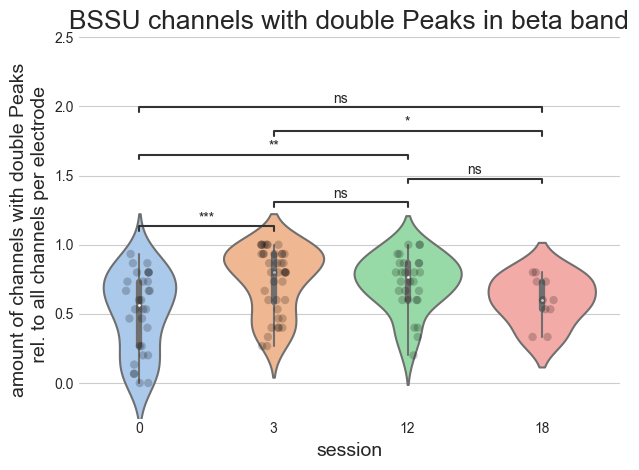

In [16]:

# replace session names by integers because of seaborn plot
session_peak_df = session_peak_df.replace(to_replace="postop", value=0)
session_peak_df = session_peak_df.replace(to_replace="fu3m", value=3)
session_peak_df = session_peak_df.replace(to_replace="fu12m", value=12)
session_peak_df = session_peak_df.replace(to_replace="fu18m", value=18)

fig=plt.figure()
ax=fig.add_subplot()
font = {"size": 14}

sns.violinplot(data=session_peak_df, x="session", y="percentage_double_peaks", palette="pastel", inner="box", ax=ax)

sns.stripplot(
    data=session_peak_df,
    x="session",
    y="percentage_double_peaks",
    ax=ax,
    size=6,
    color="black",
    alpha=0.2, # Transparency of dots
)

sns.despine(left=True, bottom=True) # get rid of figure frame


# statistical test: doesn't work if groups have different sample size
num_sessions = [0, 3, 12, 18]
pairs = list(combinations(num_sessions, 2))

annotator = Annotator(ax, pairs, data=session_peak_df, x='session', y='percentage_double_peaks')
annotator.configure(test='Mann-Whitney', text_format='star') # or ANOVA first to check if there is any difference between all groups
annotator.apply_and_annotate()

plt.title(f"BSSU channels with double Peaks in beta band", fontdict={"size": 19})
plt.ylabel(f"amount of channels with double Peaks \n rel. to all channels per electrode", fontdict=font)
plt.ylim(-0.25, 2.5)
plt.xlabel("session", fontdict=font)

fig.tight_layout()

## 6. Rank channels by highest peak power in beta

In [101]:
fooof_group_result = loadResults.load_group_fooof_result()

In [102]:
fooof_group_result.head()

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
0          017_Right    fu3m              03     0.067918    0.984748   
1          017_Right    fu3m              13     0.065586    0.981937   
2          017_Right    fu3m              02     0.103924    0.967577   
3          017_Right    fu3m              12     0.075776    0.975321   
4          017_Right    fu3m              01     0.064701    0.983808   

   fooof_exponent  fooof_offset  \
0        1.604428      1.193436   
1        1.434853      0.962182   
2        1.543910      1.189600   
3        1.304337      0.703128   
4        1.540660      1.072680   

                                fooof_power_spectrum  \
0  [0.1656846121, 0.1649261572, 0.2233027721, 0.3...   
1  [0.00025127, 0.000170312, 0.0001713231, 0.0002...   
2  [0.109168079, 0.1121990258, 0.1548672324, 0.22...   
3  [0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...   
4  [8.3557e-06, 0.0002934974, 0.0064128567, 0.068...   

                   periodic_plus_aperiodic_power_log  \
0  [1.1980212709, 0.7241873517, 0.4627028941, 0.3...   
1  [0.9621936864, 0.5302699046, 0.2776223402, 0.0...   
2  [1.1926531892, 0.7339231906, 0.4760453097, 0.3...   
3  [0.7031279556, 0.3104833187, 0.08080093, -0.08...   
4  [1.0726801317, 0.6089264433, 0.3388765877, 0.1...   

                                 fooof_periodic_flat  fooof_number_peaks  \
0  [0.0045849614, 0.0137320197, 0.0347733225, 0.0...                   4   
1  [1.19052e-05, 2.18158e-05, 3.92643e-05, 6.9409...                   6   
2  [0.0030531805, 0.0090862654, 0.02307736, 0.050...                   2   
3  [0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...                   5   
4  [3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...                   6   

                alpha_peak_CF_power_bandWidth  \
0  [8.0361304032, 0.2920797265, 4.8819935856]   
1                          [None, None, None]   
2  [8.3809412329, 0.2263361313, 5.0237181784]   
3                          [None, None, None]   
4                          [None, None, None]   

              low_beta_peak_CF_power_bandWidth  \
0                           [None, None, None]   
1  [13.6525290401, 0.2751629141, 3.0043817259]   
2                           [None, None, None]   
3                           [None, None, None]   
4                           [None, None, None]   

             high_beta_peak_CF_power_bandWidth  \
0  [28.9598253493, 0.5980392495, 7.9884764248]   
1  [29.1048971253, 0.9469996841, 2.8278507671]   
2    [29.09726726, 0.9610582984, 9.2634518255]   
3  [29.4862292984, 1.0958098075, 5.0314063169]   
4           [33.2211166882, 0.4390133671, 2.0]   

                  beta_peak_CF_power_bandWidth  \
0  [28.9598253493, 0.5980392495, 7.9884764248]   
1  [29.1048971253, 0.9469996841, 2.8278507671]   
2    [29.09726726, 0.9610582984, 9.2634518255]   
3  [29.4862292984, 1.0958098075, 5.0314063169]   
4           [33.2211166882, 0.4390133671, 2.0]   

                 gamma_peak_CF_power_bandWidth  
0                           [None, None, None]  
1                           [None, None, None]  
2                           [None, None, None]  
3           [63.6509137528, 0.2746917897, 2.0]  
4  [63.7733341896, 0.1903054915, 10.556379168]

In [9]:
# split an array with three peak parameters into three new columns

# define split array function
split_array = lambda x: pd.Series(x)

# column with arrays per cell
beta_peak_arrays = fooof_group_result.beta_peak_CF_power_bandWidth

# new columns with single parameters per cell
fooof_group_result_copy = fooof_group_result.copy()
fooof_group_result_copy[["beta_center_frequency", "beta_peak_power", "beta_band_width"]] = fooof_group_result_copy["beta_peak_CF_power_bandWidth"].apply(split_array)
fooof_group_result_copy = fooof_group_result_copy.drop(columns=["alpha_peak_CF_power_bandWidth", "low_beta_peak_CF_power_bandWidth", "high_beta_peak_CF_power_bandWidth", "gamma_peak_CF_power_bandWidth"])



Write Dataframe with ranks of beta peak power per stn-session-channel_group  

In [55]:
rank_beta_power = fooof_fit.fooof_rank_beta_peak_power()

file:  fooof_rank_beta_power_dataframe.pickle 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [56]:
rank_beta_power = loadResults.load_fooof_rank_beta_peak_power()

In [57]:
rank_beta_power.subject_hemisphere.unique()


array(['017_Right', '017_Left', '019_Right', '019_Left', '021_Right',
       '021_Left', '024_Right', '024_Left', '025_Right', '025_Left',
       '026_Right', '026_Left', '028_Right', '028_Left', '029_Right',
       '029_Left', '030_Right', '030_Left', '031_Right', '031_Left',
       '032_Right', '032_Left', '033_Right', '033_Left', '038_Right',
       '038_Left', '041_Right', '041_Left', '045_Right', '045_Left',
       '047_Right', '047_Left', '050_Right', '050_Left', '059_Right',
       '059_Left', '060_Right', '060_Left', '061_Right', '061_Left',
       '062_Right', '062_Left', '063_Right', '063_Left'], dtype=object)

In [9]:
rank_beta_power.head()

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
3           017_Right    fu3m              12     0.075776    0.975321   
4           017_Right    fu3m              01     0.064701    0.983808   
5           017_Right    fu3m              23     0.065806    0.981375   
18          017_Right   fu12m              12     0.073584    0.982777   
19          017_Right   fu12m              01     0.066650    0.987536   

    fooof_exponent  fooof_offset  \
3         1.304337      0.703128   
4         1.540660      1.072680   
5         1.270456      0.586390   
18        1.530858      1.065401   
19        1.878727      1.613434   

                                 fooof_power_spectrum  \
3   [0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...   
4   [8.3557e-06, 0.0002934974, 0.0064128567, 0.068...   
5   [0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...   
18  [1.4638344481, 2.7473972589, 2.848984725, 0.90...   
19  [0.0, 0.0, 0.0, 0.0, 0.0, 1.5e-09, 1.293e-07, ...   

                    periodic_plus_aperiodic_power_log  \
3   [0.7031279556, 0.3104833187, 0.08080093, -0.08...   
4   [1.0726801317, 0.6089264433, 0.3388765877, 0.1...   
5   [0.5863896015, 0.2039441538, -0.0197720839, -0...   
18  [1.1169079169, 0.8306240608, 0.6999836468, 0.3...   
19  [1.6134335378, 1.0478803019, 0.7170528667, 0.4...   

                                  fooof_periodic_flat  fooof_number_peaks  \
3   [0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...                   5   
4   [3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...                   6   
5   [0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...                   6   
18  [0.0515071389, 0.2260573527, 0.3649875886, 0.2...                   3   
19  [0.0, 0.0, 0.0, 0.0, 0.0, 5e-10, 5.29e-08, 3.2...                   6   

                    beta_peak_CF_power_bandWidth  beta_center_frequency  \
3    [29.4862292984, 1.0958098075, 5.0314063169]              29.486229   
4             [33.2211166882, 0.4390133671, 2.0]              33.221117   
5     [30.781507243, 1.0756834082, 5.0572150049]              30.781507   
18  [28.6375935846, 0.5495840362, 10.4158354341]              28.637594   
19   [28.3105920686, 0.4102618576, 5.5276981195]              28.310592   

    beta_peak_power  beta_band_width  rank_beta_power  
3          1.095810         5.031406              1.0  
4          0.439013         2.000000              3.0  
5          1.075683         5.057215              2.0  
18         0.549584        10.415835              2.0  
19         0.410262         5.527698              3.0

Select only the rank 1 channel in postop and normalize the beta peak power values from all sessions to the highest postop peak power

In [106]:
normalized_peak_power = fooof_fit.fooof_rank1_baseline_beta_peak(session_baseline="postop")

In [107]:
normalized_peak_power.head()

subject_hemisphere  session bipolar_channel  fooof_error  fooof_r_sq  \
244          024_Right        0              01     0.168730    0.901904   
259          024_Right        3              01     0.087865    0.976894   
274          024_Right       12              01     0.078388    0.983705   
289          024_Right       18              01     0.059948    0.988565   
252          024_Right        0            1A2A     0.059484    0.970786   

     fooof_exponent  fooof_offset  \
244        0.812936     -0.341520   
259        1.157287      0.412996   
274        1.708810      1.381138   
289        1.507970      1.020774   
252        0.969138     -0.255236   

                                  fooof_power_spectrum  \
244  [0.011756927, 0.0102954108, 0.011674533, 0.015...   
259  [0.0126042727, 0.0152599415, 0.0236496133, 0.0...   
274  [0.1883771565, 0.5780846679, 1.8247334884, 2.9...   
289  [0.0024574335, 0.0018896077, 0.0027679893, 0.0...   
252  [5.22e-08, 3.69e-07, 2.7334e-06, 1.79384e-05, ...   

                     periodic_plus_aperiodic_power_log  \
244  [-0.3304521005, -0.5693263215, -0.7030158027, ...   
259  [0.4151055369, 0.0702914975, -0.1252453982, -0...   
274  [1.3845264424, 0.8995835023, 0.7407235567, 0.7...   
289  [1.0208754903, 0.5670519857, 0.3018894874, 0.1...   
252  [-0.2552355658, -0.5469747157, -0.7176258533, ...   

                                   fooof_periodic_flat  fooof_number_peaks  \
244  [0.0110675697, 0.0169115197, 0.0263729918, 0.0...                   2   
259  [0.0021098475, 0.005673872, 0.0139250797, 0.03...                   5   
274  [0.0033882788, 0.0328482996, 0.1748947964, 0.3...                   5   
289  [0.0001017282, 0.0002224412, 0.0006002876, 0.0...                   5   
252  [4.08e-08, 5.646e-07, 6.1961e-06, 5.37349e-05,...                   6   

                     beta_peak_CF_power_bandWidth  beta_center_frequency  \
244  [23.2472327802, 0.9412012309, 14.8953221323]              23.247233   
259   [22.7534379906, 1.2013413463, 9.6944967328]              22.753438   
274            [26.8200017184, 0.4285952743, 2.0]              26.820002   
289   [15.8290898317, 0.8605488106, 5.2908542372]              15.829090   
252   [24.5895398631, 0.4062446027, 7.4116852256]              24.589540   

     beta_peak_power  beta_band_width  rank_beta_power  \
244         0.941201        14.895322              1.0   
259         1.201341         9.694497              1.0   
274         0.428595         2.000000              1.0   
289         0.860549         5.290854              1.0   
252         0.406245         7.411685              1.0   

     peak_power_rel_to_postop  peak_cf_rel_to_postop  
244                  0.000000               0.000000  
259                  0.260140              -0.493795  
274                 -0.512606               3.572769  
289                 -0.080652              -7.418143  
252                  0.000000               0.000000

analyze only the channels with highest peak power in postop normalized: peak power / peak power postop

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.011e-02 U_stat=1.000e+02
3 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:4.006e-02 U_stat=1.570e+02
12 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:8.615e-01 U_stat=2.200e+01
0 vs. 12: Mann-Whitney-Wilcoxon test two-sided, P_val:9.534e-01 U_stat=1.180e+02
3 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:5.381e-01 U_stat=4.400e+01
0 vs. 18: Mann-Whitney-Wilcoxon test two-sided, P_val:7.369e-01 U_stat=3.500e+01
figure:  MINUS_fooof_highest_beta_peak_ring_from_postop_power_normalized_no.png 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\figures
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 v

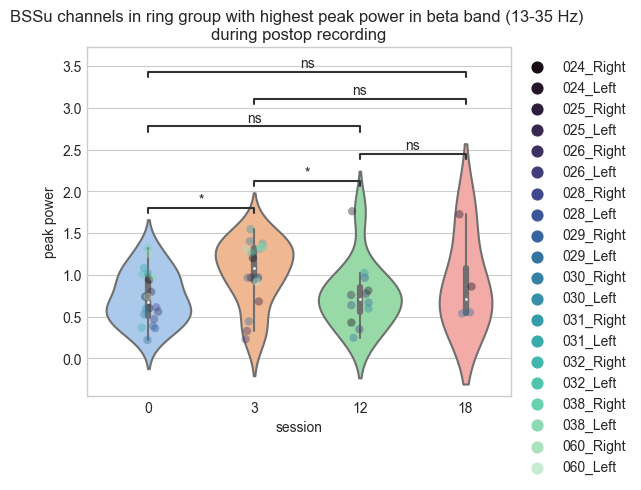

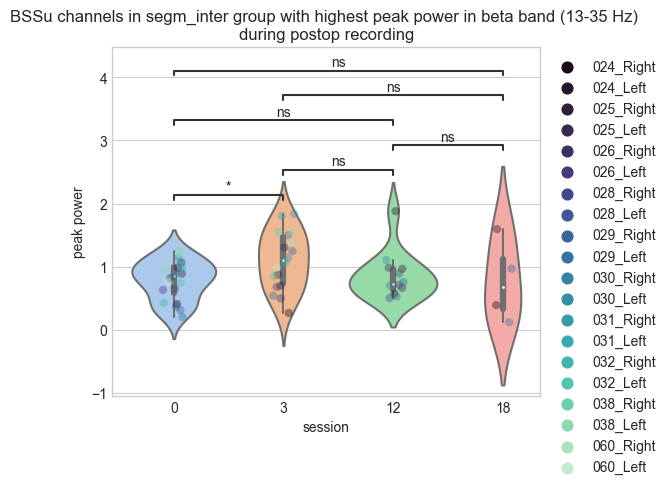

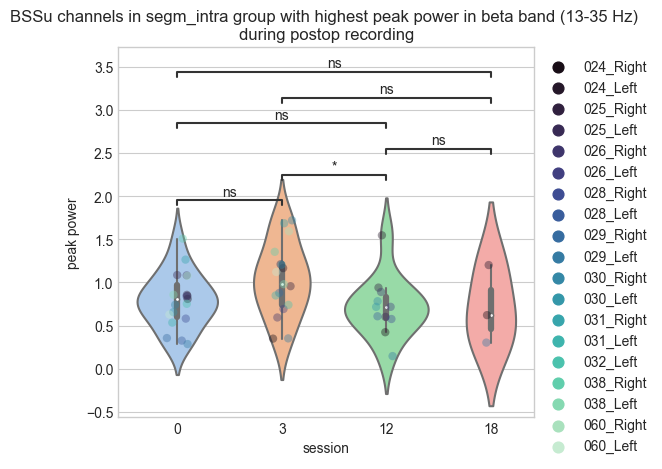

In [110]:
plot_channel_peak_parameters = fooof_fit.fooof_plot_highest_beta_peak_normalized_to_baseline(
    session_baseline="postop",
    peak_parameter="power",
    normalized_to_session_baseline="no"
)

In [59]:
plot_channel_peak_parameters

number_observations                   min_and_max      mean  variance  \
0                   18  (0.2208671613, 0.8591104405)  0.551562  0.031559   
3                   16  (0.4432406578, 1.0951401753)  0.699631  0.037204   
12                  12                    (nan, nan)       NaN       NaN   
18                   4  (0.3278300801, 0.9994923869)  0.589648   0.08297   
0                   18  (0.2223067588, 1.1184569762)  0.626214  0.077483   
3                   16  (0.1435907271, 1.3310822649)   0.75329  0.134099   
12                  12                    (nan, nan)       NaN       NaN   
18                   4                    (nan, nan)       NaN       NaN   
0                   17  (0.2243233755, 1.1335642412)  0.638021  0.055607   
3                   15   (0.311896784, 1.4130416511)  0.691325  0.102966   
12                  12  (0.1507155422, 0.9671267305)  0.482659  0.055673   
18                   4                    (nan, nan)       NaN       NaN   

    skewness  kurtosis channel_group  
0   0.005026 -0.761632          ring  
3   0.441153 -0.888703          ring  
12       NaN       NaN          ring  
18  0.801491 -0.868068          ring  
0   0.178997  -1.22012    segm_inter  
3  -0.217537 -1.058425    segm_inter  
12       NaN       NaN    segm_inter  
18       NaN       NaN    segm_inter  
0   0.401338 -0.147053    segm_intra  
3   0.724532 -0.278365    segm_intra  
12  0.343417 -0.346597    segm_intra  
18       NaN       NaN    segm_intra

quantify how often the channel with highest peak in beta in postop stays the highest peak or 1st or 2nd highest peak

In [28]:
count_rank_1 = fooof_fit.fooof_count_rank1_or_2(
    session_baseline="postop"
)

no peak in: 032_Right, segm_intra


In [29]:
count_rank_1

session channel_group total_count_of_channels count_rank_1  \
0_ring              0          ring                      30           30   
0_segm_inter        0    segm_inter                      30           30   
0_segm_intra        0    segm_intra                      29           29   
3_ring              3          ring                      26           14   
3_segm_inter        3    segm_inter                      26           20   
3_segm_intra        3    segm_intra                      25           11   
12_ring            12          ring                      14            7   
12_segm_inter      12    segm_inter                      14            9   
12_segm_intra      12    segm_intra                      13            4   
18_ring            18          ring                       4            3   
18_segm_inter      18    segm_inter                       4            1   
18_segm_intra      18    segm_intra                       3            1   

              count_rank_2 percentage_rank_1 percentage_rank_1_or_2  \
0_ring                   0               1.0                    1.0   
0_segm_inter             0               1.0                    1.0   
0_segm_intra             0               1.0                    1.0   
3_ring                   5          0.538462               0.730769   
3_segm_inter             5          0.769231               0.961538   
3_segm_intra             5              0.44                   0.64   
12_ring                  4               0.5               0.785714   
12_segm_inter            4          0.642857               0.928571   
12_segm_intra            4          0.307692               0.615385   
18_ring                  1              0.75                    1.0   
18_segm_inter            1              0.25                    0.5   
18_segm_intra            0          0.333333               0.333333   

              proportion_staying_rank_1 proportion_staying_rank_1_or_2  
0_ring                          30 / 30                      (30) / 30  
0_segm_inter                    30 / 30                      (30) / 30  
0_segm_intra                    29 / 29                      (29) / 29  
3_ring                          14 / 26                      (19) / 26  
3_segm_inter                    20 / 26                      (25) / 26  
3_segm_intra                    11 / 25                      (16) / 25  
12_ring                          7 / 14                      (11) / 14  
12_segm_inter                    9 / 14                      (13) / 14  
12_segm_intra                    4 / 13                       (8) / 13  
18_ring                           3 / 4                        (4) / 4  
18_segm_inter                     1 / 4                        (2) / 4  
18_segm_intra                     1 / 3                        (1) / 3

## 7. Linear mixed effects: how does the beta peak power at the same channel relate to different time points after DBS surgery?

In [111]:
#normalized_peak_power = fooof_fit.fooof_rank1_baseline_beta_peak(session_baseline="postop")

In [49]:
highest_beta_channels = fooof_fit.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum",
    highest_beta_session="highest_postop"
)

In [157]:
highest_beta_channels.head()

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
1          024_Right  postop              01     0.168730    0.901904   
0          024_Right  postop            1A2A     0.059484    0.970786   
0          024_Right  postop            1A1B     0.081016    0.946834   
1          024_Right    fu3m              01     0.087865    0.976894   
0          024_Right    fu3m            1A2A     0.066267    0.974927   

   fooof_exponent  fooof_offset  \
1        0.812936     -0.341520   
0        0.969138     -0.255236   
0        0.804433     -0.612344   
1        1.157287      0.412996   
0        1.212212      0.545423   

                                fooof_power_spectrum  \
1  [0.011756927, 0.0102954108, 0.011674533, 0.015...   
0  [5.22e-08, 3.69e-07, 2.7334e-06, 1.79384e-05, ...   
0  [7.29193e-05, 9.87683e-05, 0.0001806493, 0.000...   
1  [0.0126042727, 0.0152599415, 0.0236496133, 0.0...   
0  [0.0534500055, 0.0665049247, 0.1004241778, 0.1...   

                   periodic_plus_aperiodic_power_log  \
1  [-0.3304521005, -0.5693263215, -0.7030158027, ...   
0  [-0.2552355658, -0.5469747157, -0.7176258533, ...   
0  [-0.6122140321, -0.8541953293, -0.995378659, -...   
1  [0.4151055369, 0.0702914975, -0.1252453982, -0...   
0  [0.5519849075, 0.1991647042, 0.011723842, -0.0...   

                                 fooof_periodic_flat  fooof_number_peaks  \
1  [0.0110675697, 0.0169115197, 0.0263729918, 0.0...                   2   
0  [4.08e-08, 5.646e-07, 6.1961e-06, 5.37349e-05,...                   6   
0  [0.0001296897, 0.0003067259, 0.0007769405, 0.0...                   6   
1  [0.0021098475, 0.005673872, 0.0139250797, 0.03...                   5   
0  [0.0065618143, 0.018653783, 0.0446728575, 0.09...                   6   

                 alpha_peak_CF_power_bandWidth  \
1                           [None, None, None]   
0                           [None, None, None]   
0  [11.2161231056, 0.7099802801, 2.1627376247]   
1                           [None, None, None]   
0                           [None, None, None]   

             low_beta_peak_CF_power_bandWidth  \
1                          [None, None, None]   
0                          [None, None, None]   
0  [14.8623061994, 0.5025864074, 6.442008565]   
1                          [None, None, None]   
0          [14.3218347064, 0.2535953669, 2.0]   

              high_beta_peak_CF_power_bandWidth  \
1  [23.2472327802, 0.9412012309, 14.8953221323]   
0   [24.5895398631, 0.4062446027, 7.4116852256]   
0   [25.5841878005, 0.8094149593, 3.4424555486]   
1   [22.7534379906, 1.2013413463, 9.6944967328]   
0   [31.7616710215, 0.2638815118, 2.2380096576]   

                   beta_peak_CF_power_bandWidth  \
1  [23.2472327802, 0.9412012309, 14.8953221323]   
0   [24.5895398631, 0.4062446027, 7.4116852256]   
0   [25.5841878005, 0.8094149593, 3.4424555486]   
1   [22.7534379906, 1.2013413463, 9.6944967328]   
0   [31.7616710215, 0.2638815118, 2.2380096576]   

                 gamma_peak_CF_power_bandWidth  beta_average  beta_rank  
1                           [None, None, None]      0.216209        1.0  
0  [69.0359056791, 0.2428829695, 5.9775500956]      0.020864        1.0  
0                           [None, None, None]      0.038635        1.0  
1                           [None, None, None]      0.620562        1.0  
0                           [None, None, None]      0.041061        2.0

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# define split array function
split_array = lambda x: pd.Series(x)

channel_group = ["ring", "segm_inter", "segm_intra"]

ring = ['01', '12', '23']
segm_inter = ["1A2A", "1B2B", "1C2C"]
segm_intra = ['1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C']

group_dict = {}

for group in channel_group:

    if group == "ring":
        group_df = highest_beta_channels.loc[highest_beta_channels.bipolar_channel.isin(ring)]

    elif group == "segm_inter":
        group_df = highest_beta_channels.loc[highest_beta_channels.bipolar_channel.isin(segm_inter)]

    elif group == "segm_intra":
        group_df = highest_beta_channels.loc[highest_beta_channels.bipolar_channel.isin(segm_intra)]
    
    # session values have to be integers, add column group for each STN electrode 
    group_df_copy = group_df.copy()
    group_df_copy["group"] = le.fit_transform(group_df_copy["subject_hemisphere"])
    group_df_copy = group_df_copy.drop(columns=["level_0"])
    group_df_copy["session"] = group_df_copy.session.replace(to_replace=["postop", "fu3m", "fu12m", "fu18m"], value=[0,3,12,18])

    # split beta peak column into three columns
    group_df_copy[["beta_center_frequency", "beta_peak_power", "beta_band_width"]] = group_df_copy["beta_peak_CF_power_bandWidth"].apply(split_array)
    group_df_copy = group_df_copy.drop(columns=["alpha_peak_CF_power_bandWidth", "gamma_peak_CF_power_bandWidth"])
    group_df_copy = group_df_copy.dropna()


    group_dict[f"{group}"] = group_df_copy
        

In [67]:
group_dict["segm_inter"].head()

index subject_hemisphere  session bipolar_channel  fooof_error  fooof_r_sq  \
0    12          017_Right        3            1A2A     0.075245    0.974186   
0    27          017_Right       12            1A2A     0.056268    0.987753   
0    42           017_Left        3            1A2A     0.064126    0.976721   
0    57           017_Left       12            1A2A     0.078880    0.971954   
0    72          019_Right        3            1A2A     0.107039    0.963082   

   fooof_exponent  fooof_offset  \
0        1.432761      1.125251   
0        1.550723      1.246667   
0        1.329665      0.937613   
0        1.319583      0.998269   
0        1.422972      0.839447   

                                fooof_power_spectrum  \
0  [0.0, 0.0, 0.0, 1e-10, 3e-10, 1.5e-09, 6.4e-09...   
0  [0.016995994, 0.0095950285, 0.0083051429, 0.00...   
0  [0.0203162865, 0.0135882691, 0.012960794, 0.01...   
0  [1.31635e-05, 3.86642e-05, 0.0001416404, 0.000...   
0  [0.0200114156, 0.0119365028, 0.0111947428, 0.0...   

                   periodic_plus_aperiodic_power_log  ... fooof_number_peaks  \
0  [1.1252509681, 0.6939470111, 0.4416503698, 0.2...  ...                  5   
0  [1.2470848335, 0.7805438056, 0.5079052275, 0.3...  ...                  5   
0  [0.9386299987, 0.5390525706, 0.3059925458, 0.1...  ...                  6   
0  [0.9982699084, 0.6010395529, 0.3686946775, 0.2...  ...                  6   
0  [0.8407026799, 0.4130966536, 0.163863329, -0.0...  ...                  4   

              low_beta_peak_CF_power_bandWidth  \
0                           [None, None, None]   
0                           [None, None, None]   
0                           [None, None, None]   
0           [17.8923882121, 0.4599773799, 2.0]   
0  [15.3063375632, 0.5383392316, 5.3571785376]   

              high_beta_peak_CF_power_bandWidth  \
0     [30.9240579785, 1.0263474649, 7.65470379]   
0  [28.0574589266, 0.4277901943, 14.5348877876]   
0   [30.7209996145, 0.3672826873, 9.5072106445]   
0   [28.7956284015, 0.8841448249, 3.8520990435]   
0  [27.5779522162, 0.6684580307, 14.9999999999]   

                   beta_peak_CF_power_bandWidth beta_average  beta_rank  \
0     [30.9240579785, 1.0263474649, 7.65470379]     0.270982        1.0   
0  [28.0574589266, 0.4277901943, 14.5348877876]     0.117865        1.0   
0   [30.7209996145, 0.3672826873, 9.5072106445]     0.097641        1.0   
0   [28.7956284015, 0.8841448249, 3.8520990435]     0.254751        2.0   
0  [27.5779522162, 0.6684580307, 14.9999999999]     0.208632        1.0   

   group  beta_center_frequency  beta_peak_power  beta_band_width  
0      1              30.924058         1.026347         7.654704  
0      1              28.057459         0.427790        14.534888  
0      0              30.721000         0.367283         9.507211  
0      0              28.795628         0.884145         3.852099  
0      3              27.577952         0.668458        15.000000  

[5 rows x 21 columns]

In [68]:
data_analysis = group_dict["segm_inter"]

In [79]:
# what does re_formula mean

md = smf.mixedlm("session ~ beta_center_frequency", data=data_analysis, groups="group")
mdf = md.fit()
                

print(mdf.summary())


yp = mdf.fittedvalues
data_analysis["predictions"] = yp


             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    session  
No. Observations:    95         Method:                REML     
No. Groups:          38         Scale:                 37.3382  
Min. group size:     1          Log-Likelihood:        -306.5467
Max. group size:     4          Converged:             Yes      
Mean group size:     2.5                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              5.951    2.918  2.040 0.041  0.233 11.669
beta_center_frequency -0.003    0.121 -0.027 0.979 -0.240  0.233
group Var              0.000    0.847                           



c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\jebe12\anaconda3\envs\bssu\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Text(0.5, 0, 'beta_center_frequency')

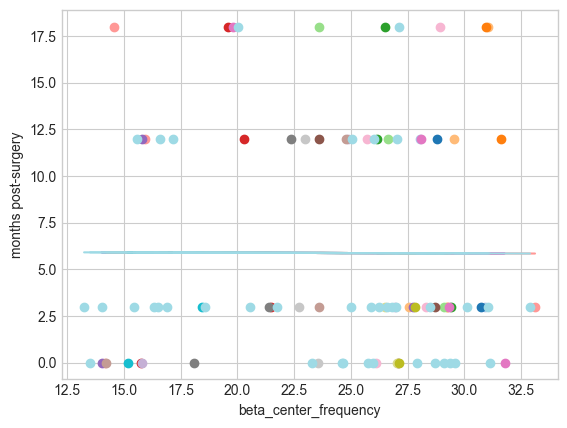

In [83]:
fig = plt.figure()

for group in data_analysis.group.unique():
    sub_data = data_analysis[data_analysis.group==group]

    plt.scatter(sub_data["beta_center_frequency"], sub_data["session"] ,color=plt.cm.tab20(group))
    plt.plot(sub_data["beta_center_frequency"], sub_data["predictions"], color=plt.cm.tab20(group))

plt.ylabel("months post-surgery")
plt.xlabel("beta_center_frequency")

In [27]:
beta_peaks = loadResults.load_fooof_rank_beta_peak_power()
beta_peaks.head()

subject_hemisphere session bipolar_channel  fooof_error  fooof_r_sq  \
3           017_Right    fu3m              12     0.075776    0.975321   
4           017_Right    fu3m              01     0.064701    0.983808   
5           017_Right    fu3m              23     0.065806    0.981375   
18          017_Right   fu12m              12     0.073584    0.982777   
19          017_Right   fu12m              01     0.066650    0.987536   

    fooof_exponent  fooof_offset  \
3         1.304337      0.703128   
4         1.540660      1.072680   
5         1.270456      0.586390   
18        1.530858      1.065401   
19        1.878727      1.613434   

                                 fooof_power_spectrum  \
3   [0.0, 0.0, 0.0, 1e-10, 2e-10, 7e-10, 1.8e-09, ...   
4   [8.3557e-06, 0.0002934974, 0.0064128567, 0.068...   
5   [0.0, 9e-10, 1.81e-08, 3.225e-07, 4.5041e-06, ...   
18  [1.4638344481, 2.7473972589, 2.848984725, 0.90...   
19  [0.0, 0.0, 0.0, 0.0, 0.0, 1.5e-09, 1.293e-07, ...   

                    periodic_plus_aperiodic_power_log  \
3   [0.7031279556, 0.3104833187, 0.08080093, -0.08...   
4   [1.0726801317, 0.6089264433, 0.3388765877, 0.1...   
5   [0.5863896015, 0.2039441538, -0.0197720839, -0...   
18  [1.1169079169, 0.8306240608, 0.6999836468, 0.3...   
19  [1.6134335378, 1.0478803019, 0.7170528667, 0.4...   

                                  fooof_periodic_flat  fooof_number_peaks  \
3   [0.0, 0.0, 0.0, 0.0, 2e-10, 6e-10, 2e-09, 6.7e...                   5   
4   [3.07e-07, 3.13674e-05, 0.0012781982, 0.020770...                   6   
5   [0.0, 2e-10, 8.2e-09, 2.112e-07, 3.9175e-06, 5...                   6   
18  [0.0515071389, 0.2260573527, 0.3649875886, 0.2...                   3   
19  [0.0, 0.0, 0.0, 0.0, 0.0, 5e-10, 5.29e-08, 3.2...                   6   

                    beta_peak_CF_power_bandWidth  beta_center_frequency  \
3    [29.4862292984, 1.0958098075, 5.0314063169]              29.486229   
4             [33.2211166882, 0.4390133671, 2.0]              33.221117   
5     [30.781507243, 1.0756834082, 5.0572150049]              30.781507   
18  [28.6375935846, 0.5495840362, 10.4158354341]              28.637594   
19   [28.3105920686, 0.4102618576, 5.5276981195]              28.310592   

    beta_peak_power  beta_band_width  rank_beta_power  
3          1.095810         5.031406              1.0  
4          0.439013         2.000000              3.0  
5          1.075683         5.057215              2.0  
18         0.549584        10.415835              2.0  
19         0.410262         5.527698              3.0

In [28]:
sessions = ["postop", "fu3m", "fu12m", "fu18m"]
channel_group = ["ring", "segm_inter", "segm_intra"]

ring = ['01', '12', '23']
segm_inter = ["1A2A", "1B2B", "1C2C"]
segm_intra = ['1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C']

for group in channel_group:

    if group == "ring":
        ring_df = beta_peaks.loc[beta_peaks.bipolar_channel.isin(ring)]

    elif group == "segm_inter":
        segm_inter_df = beta_peaks.loc[beta_peaks.bipolar_channel.isin(segm_inter)]

    elif group == "segm_intra":
        segm_intra_df = beta_peaks.loc[beta_peaks.bipolar_channel.isin(segm_intra)]

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

segm_intra_df_copy = segm_intra_df.copy()
segm_intra_df_copy["group"] = le.fit_transform(segm_intra_df_copy["subject_hemisphere"])
segm_intra_df_copy = segm_intra_df_copy.dropna()
segm_intra_df_copy["session"] = segm_intra_df_copy.session.replace(to_replace=["postop", "fu3m", "fu12m", "fu18m"], value=[0,3,12,18])

In [14]:
independent_variable = segm_intra_df["beta_center_frequency"]
dependent_variable = segm_intra_df["session"]

random_effect = segm_intra_df["subject_hemisphere"]

In [33]:
md = smf.mixedlm("session ~ beta_center_frequency", data=segm_intra_df_copy, groups="group")
mdf = md.fit()
                

print(mdf.summary())


yp = mdf.fittedvalues
segm_intra_df_copy["predictions"] = yp


             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   session   
No. Observations:     460       Method:               REML      
No. Groups:           30        Scale:                30.6019   
Min. group size:      6         Log-Likelihood:       -1465.8767
Max. group size:      24        Converged:            Yes       
Mean group size:      15.3                                      
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              6.385    1.440  4.434 0.000  3.563  9.207
beta_center_frequency -0.001    0.057 -0.021 0.983 -0.113  0.110
group Var              9.471    0.575                           



In [35]:
segm_intra_df_copy.head()

subject_hemisphere  session bipolar_channel  fooof_error  fooof_r_sq  \
6           017_Right        3            1A1B     0.061170    0.971942   
7           017_Right        3            1B1C     0.069114    0.969533   
8           017_Right        3            1A1C     0.066199    0.963346   
9           017_Right        3            2A2B     0.065385    0.970130   
10          017_Right        3            2B2C     0.064250    0.975180   

    fooof_exponent  fooof_offset  \
6         1.166858      0.443513   
7         1.188483      0.547959   
8         1.100582      0.403157   
9         1.211364      0.448752   
10        1.206573      0.461622   

                                 fooof_power_spectrum  \
6   [1.78187e-05, 1.50721e-05, 2.10546e-05, 0.0001...   
7   [6.9187e-06, 6.4691e-06, 8.3187e-06, 1.20218e-...   
8   [3.497e-07, 4.62e-07, 8.088e-07, 1.5562e-06, 3...   
9   [2.706e-07, 3.939e-07, 7.763e-07, 1.7221e-06, ...   
10  [0.0109738674, 0.0072278657, 0.0066202639, 0.0...   

                    periodic_plus_aperiodic_power_log  \
6   [0.4435160509, 0.0922593119, -0.1132076002, -0...   
7   [0.5479601583, 0.1901919454, -0.019087644, -0....   
8   [0.4031568259, 0.0718488462, -0.1219536674, -0...   
9   [0.4487517602, 0.0840949096, -0.1292154187, -0...   
10  [0.463265225, 0.1009027437, -0.1103369029, -0....   

                                  fooof_periodic_flat  fooof_number_peaks  \
6   [2.7871e-06, 5.293e-06, 1.18671e-05, 0.0001233...                   5   
7   [8.508e-07, 1.8132e-06, 3.7751e-06, 7.6794e-06...                   6   
8   [6e-08, 1.701e-07, 4.651e-07, 1.2283e-06, 3.13...                   6   
9   [4.18e-08, 1.409e-07, 4.54e-07, 1.4269e-06, 9....                   5   
10  [0.0016432368, 0.0024953918, 0.0037226871, 0.0...                   6   

                   beta_peak_CF_power_bandWidth  beta_center_frequency  \
6            [29.2344251001, 0.4834442273, 2.0]              29.234425   
7   [27.6985526641, 0.5786914586, 6.4909643736]              27.698553   
8            [28.0061209325, 0.6667053619, 2.0]              28.006121   
9   [28.2613757014, 0.8861693939, 9.3864257659]              28.261376   
10   [29.792500258, 0.8118766471, 3.6365587315]              29.792500   

    beta_peak_power  beta_band_width  rank_beta_power  group  predictions  
6          0.483444         2.000000              6.0      1     7.253133  
7          0.578691         6.490964              5.0      1     7.254977  
8          0.666705         2.000000              4.0      1     7.254608  
9          0.886169         9.386426              2.0      1     7.254301  
10         0.811877         3.636559              3.0      1     7.252463

Text(0, 0.5, 'beta peak center frequency')

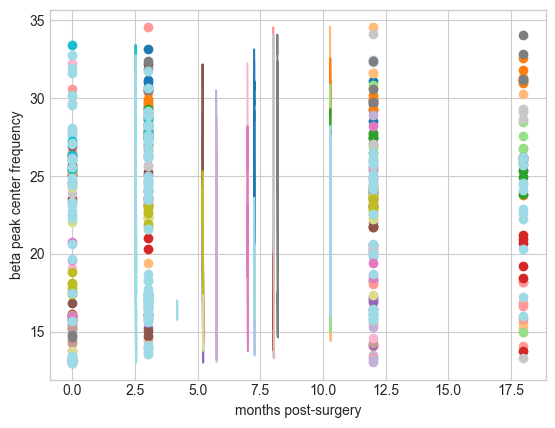

In [39]:
fig = plt.figure()

for group in segm_intra_df_copy.group.unique():
    sub_data = segm_intra_df_copy[segm_intra_df_copy.group==group]

    plt.scatter(sub_data["session"],sub_data["beta_center_frequency"],color=plt.cm.tab20(group), label="_nolegend_")
    plt.plot(sub_data["predictions"],sub_data["beta_center_frequency"],color=plt.cm.tab20(group))

plt.xlabel("months post-surgery")
plt.ylabel("beta peak center frequency")